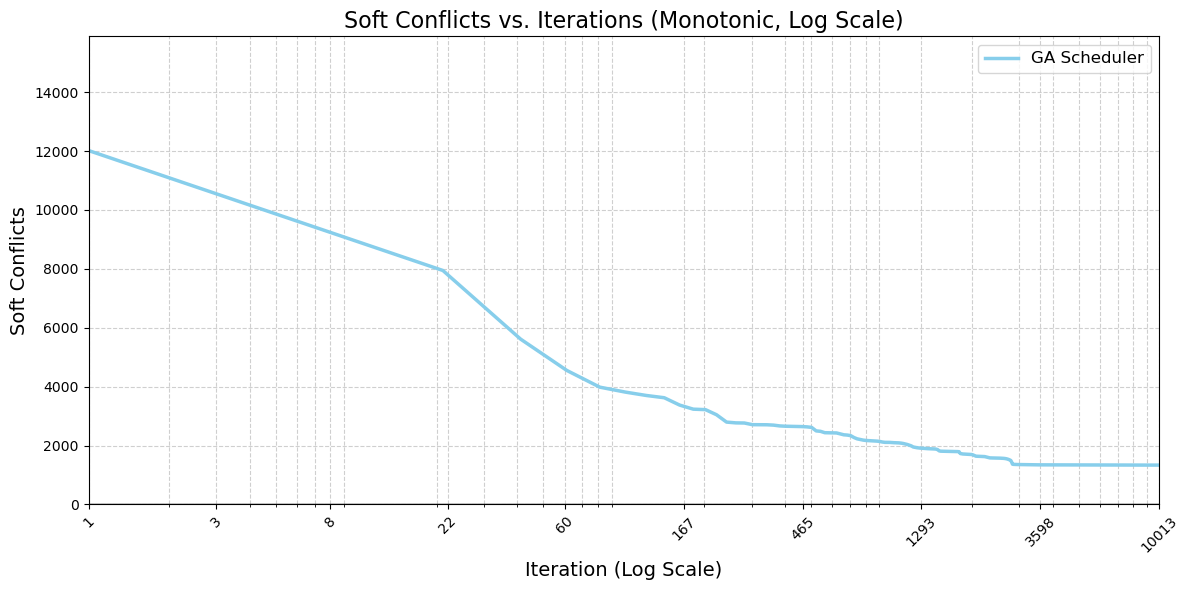

<svg width='800' height='400'><text x='400.0' y='25.0' text-anchor='middle' font-size='18'>Soft Conflicts vs. Iterations (Monotonic, Log Scale)</text><text x='400.0' y='387.5' text-anchor='middle' font-size='14'>Iteration (Log Scale)</text><text x='12.5' y='200.0' text-anchor='middle' font-size='14' transform='rotate(-90 12.5 200.0)'>Soft Conflicts</text><path d='M 50.0,100.53636929891343 L 281.58744448624,185.06917476035136 L 332.43471385833834,233.47952059191945 L 362.627943839071,255.54069592025772 L 384.1780445883858,267.3167435592623 L 400.9476351469073,270.81518228465643 L 414.67729546222114,273.19346194013826 L 426.3018454474737,274.7768417047114 L 436.38182123278574,279.9576921354976 L 445.2799551306075,282.8292862531128 L 453.24452468321647,283.1669808336467 L 460.45295512166877,286.7445201299657 L 467.0364522660047,291.9439869693993 L 473.0947812855365,292.49506245194044 L 478.70557330280695,292.5952925244151 L 483.9304245018342,293.7598036085295 L 488.8190291685382,293.81878

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import PchipInterpolator

# Input Data
iterationsGA = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 64, 65, 67, 70, 71, 73, 75, 77, 79, 81, 84, 89, 91, 95, 97, 103, 105, 110, 113, 115, 124, 128, 133, 143, 145, 149, 155, 163, 164, 166, 168, 169, 180, 194, 202, 206, 208, 217, 218, 219, 221, 222, 237, 240, 245, 263, 299, 300, 301, 358, 367, 510, 516, 542, 543, 544, 547, 638, 646, 690, 719, 722, 751, 775, 786, 926, 927, 997, 1006, 1053, 1187, 1200, 1332, 1474, 1516, 1677, 1788, 1790, 1825, 1841, 1944, 2000, 2019, 2033, 2050, 2052, 2192, 2344, 2423, 2611, 2792, 2835, 3064, 3179, 10013]
soft_conflictsGA = [12015, 12093, 10426, 9947, 14449, 9778, 9698, 9556, 10434, 9551, 9779, 9273, 9148, 9043, 8893, 8281, 8041, 8753, 8101, 7951, 7861, 7999, 7899, 7839, 7791, 7746, 7559, 7401, 7287, 7192, 7056, 6930, 6537, 6201, 5915, 5789, 5623, 5557, 5443, 5374, 5194, 5144, 5135, 5134, 4955, 4945, 4845, 4820, 4718, 4641, 4622, 4567, 4556, 4501, 4449, 4413, 4311, 4263, 4185, 4137, 4095, 4083, 4023, 3987, 3933, 3878, 3848, 3836, 3826, 3808, 3796, 3789, 3756, 3732, 3690, 3678, 3667, 3606, 3535, 3392, 3387, 3365, 3309, 3287, 3251, 3246, 3236, 3230, 3218, 3194, 3184, 3139, 3137, 3092, 3054, 3044, 2938, 2807, 2787, 2769, 2757, 2721, 2709, 2703, 2679, 2607, 2504, 2486, 2480, 2462, 2444, 2420, 2380, 2350, 2302, 2278, 2218, 2194, 2182, 2117, 2111, 2105, 2099, 2093, 1985, 1955, 1900, 1876, 1810, 1800, 1790, 1753, 1720, 1714, 1703, 1692, 1676, 1666, 1648, 1640, 1634, 1579, 1577, 1566, 1489, 1363, 1352, 1346, 1336]


def process_and_plot(iterations, soft_conflicts, color, label, ax): # added label
    """Processes and plots the data, ensuring monotonicity."""

    # Sort the data (critical for PchipInterpolator)
    sorted_data = sorted(zip(iterations, soft_conflicts))
    iterations, soft_conflicts = zip(*sorted_data)
    iterations = np.array(iterations)
    soft_conflicts = np.array(soft_conflicts)

    # Use PchipInterpolator for smooth, monotonic interpolation
    pchip = PchipInterpolator(iterations, soft_conflicts)
    xnew = np.linspace(iterations.min(), iterations.max(), 500)  # More points
    y_smooth = pchip(xnew)

    # Enforce monotonicity (curve never increases) and non-negativity
    for i in range(1, len(y_smooth)):
        y_smooth[i] = min(y_smooth[i - 1], y_smooth[i])
        y_smooth[i] = max(0, y_smooth[i])  # Keep y >= 0

    ax.plot(xnew, y_smooth, color=color, linewidth=2.5, label=label)  # Added label


def integer_log_ticks(min_val, max_val, num_ticks=10):
    """Generates integer tick positions for a log scale."""
    log_min = np.log10(min_val)
    log_max = np.log10(max_val)
    log_ticks = np.logspace(log_min, log_max, num_ticks)
    int_ticks = np.unique(np.round(log_ticks).astype(int))
    int_ticks = int_ticks[(int_ticks >= min_val) & (int_ticks <= max_val)]
    return int_ticks


# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data, WITH A LABEL
process_and_plot(iterationsGA, soft_conflictsGA, 'skyblue', "GA Scheduler", ax)

# Horizontal Line at Zero (from the first x-value where y is zero)
first_zero_index = next((i for i, val in enumerate(soft_conflictsGA) if val == 0), None)
if first_zero_index is not None:
    first_zero_x = iterationsGA[first_zero_index]
    ax.axhline(y=0, xmin=(first_zero_x - min(iterationsGA)) / (max(iterationsGA) - min(iterationsGA)), xmax=1, color='black', linewidth=1)
else:
    ax.axhline(y=0, xmin=0, xmax=1, color='black', linewidth=1)  # If no zero, draw across whole plot


# Logarithmic X-Axis, Integer Ticks, and set X-Axis Limits
ax.set_xscale('log')
tick_positions = integer_log_ticks(1, max(iterationsGA))
ax.set_xticks(tick_positions)
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.tick_params(axis='x', rotation=45)
ax.set_xlim(1, max(iterationsGA))

# General Plot Styling
ax.set_title('Soft Conflicts vs. Iterations (Monotonic, Log Scale)', fontsize=16)
ax.set_xlabel('Iteration (Log Scale)', fontsize=14)
ax.set_ylabel('Soft Conflicts', fontsize=14)
ax.grid(True, which="both", ls="--", alpha=0.6)
ax.set_ylim(0, max(soft_conflictsGA) * 1.1)  # Start y-axis at 0
ax.legend(fontsize=12) # Keep the legend this time

plt.tight_layout()
plt.savefig('soft_conflicts_plot.png', bbox_inches='tight')  # Save as PNG
plt.show()



def generate_svg(iterations, soft_conflicts, width=800, height=400, padding=50):
    """Generates an SVG plot of the data."""

    try:
        import numpy as np
        from scipy.interpolate import PchipInterpolator

        def process_data(iterations, soft_conflicts):
            """Processes data for SVG, ensuring monotonicity."""
            if not iterations or not soft_conflicts or len(iterations) != len(soft_conflicts) or len(iterations) < 2:
                return None, None

            sorted_data = sorted(zip(iterations, soft_conflicts))
            iterations, soft_conflicts = zip(*sorted_data)
            iterations = np.array(iterations)
            soft_conflicts = np.array(soft_conflicts)

            pchip = PchipInterpolator(iterations, soft_conflicts)
            xnew = np.linspace(iterations.min(), iterations.max(), 500)
            y_smooth = pchip(xnew)

            for i in range(1, len(y_smooth)):
                y_smooth[i] = min(y_smooth[i - 1], y_smooth[i])
                y_smooth[i] = max(0, y_smooth[i])

            return xnew, y_smooth

        xnew, y_smooth = process_data(iterations, soft_conflicts)

        if xnew is None:
            return "<text x='50' y='50' fill='red'>Error: Invalid input data.</text>"
        # --- Determine Max Values for Scaling ---
        max_iteration = max(iterations)
        max_conflict = max(soft_conflicts)

        # --- Start Building SVG ---
        svg_elements = []

        # Title and Axis Labels
        svg_elements.append(f"<text x='{width/2}' y='{padding/2}' text-anchor='middle' font-size='18'>Soft Conflicts vs. Iterations (Monotonic, Log Scale)</text>")
        svg_elements.append(f"<text x='{width/2}' y='{height - padding/4}' text-anchor='middle' font-size='14'>Iteration (Log Scale)</text>")
        svg_elements.append(f"<text x='{padding/4}' y='{height/2}' text-anchor='middle' font-size='14' transform='rotate(-90 {padding/4} {height/2})'>Soft Conflicts</text>")

        # --- Logarithmic X-Scale Conversion ---
        def log_scale(x):
            return np.log(max(x, 1e-10))

        min_log_x = log_scale(1)
        max_log_x = log_scale(max_iteration)

        def get_x_coord(iteration):
            log_x = log_scale(iteration)
            x_scale = (width - 2 * padding) / (max_log_x - min_log_x)
            return padding + (log_x - min_log_x) * x_scale

        # --- Y-Scale ---
        y_scale = (height - 2 * padding) / max_conflict if max_conflict > 0 else 0

        # --- Plot Data (SVG Path) ---
        path_d = "M "
        for i in range(len(xnew)):
            if xnew[i] >= 1:
                x_coord = get_x_coord(xnew[i])
                y_coord = height - padding - y_smooth[i] * y_scale
                path_d += f"{x_coord},{y_coord} "
                if i < len(xnew) - 1:
                  path_d += "L "
        svg_elements.append(f"<path d='{path_d.strip()}' stroke='skyblue' stroke-width='2' fill='none'/>")

        # --- Add Legend in SVG ---
        svg_elements.append(f"<rect x='{width - padding - 100}' y='{padding}' width='10' height='10' fill='skyblue'/>")  # Legend color box
        svg_elements.append(f"<text x='{width - padding - 85}' y='{padding + 10}' font-size='12'>GA Scheduler</text>") # Legend text

        # Horizontal Line at Zero
        first_zero_index = next((i for i, val in enumerate(soft_conflicts) if val == 0), None)
        if first_zero_index is not None:
          x1_zero = get_x_coord(iterations[first_zero_index])
        else:
          x1_zero = get_x_coord(1)
        x2_zero = get_x_coord(max_iteration)
        y_zero = height - padding
        svg_elements.append(f"<line x1='{x1_zero}' y1='{y_zero}' x2='{x2_zero}' y2='{y_zero}' stroke='black' stroke-width='1'/>")

        # --- Axes ---
        svg_elements.append(f"<line x1='{padding}' y1='{height - padding}' x2='{width - padding}' y2='{height - padding}' stroke='black'/>")
        svg_elements.append(f"<line x1='{padding}' y1='{height - padding}' x2='{padding}' y2='{padding}' stroke='black'/>")

        # --- Logarithmic X-axis Ticks (Integer) ---
        tick_positions = integer_log_ticks(1, max_iteration)
        for tick in tick_positions:
            x = get_x_coord(tick)
            y = height - padding
            svg_elements.append(f"<line x1='{x}' y1='{y}' x2='{x}' y2='{y + 5}' stroke='black'/>")
            svg_elements.append(f"<text x='{x}' y='{y + 20}' text-anchor='middle' font-size='10' transform='rotate(-45 {x} {y + 20})'>{tick}</text>")

        # --- Linear Y-axis Ticks ---
        num_y_ticks = 5
        if max_conflict > 0:
          y_tick_interval_val = max_conflict / num_y_ticks
          y_tick_interval_coord = (height - 2 * padding) / num_y_ticks
          for i in range(num_y_ticks + 1):
                x = padding
                y = height - padding - i * y_tick_interval_coord
                svg_elements.append(f"<line x1='{x}' y1='{y}' x2='{x - 5}' y2='{y}' stroke='black'/>")
                label = f"{int(i * y_tick_interval_val)}"
                svg_elements.append(f"<text x='{x - 10}' y='{y + 4}' text-anchor='end' font-size='10'>{label}</text>")

        # --- Combine SVG Elements ---
        full_svg = f"<svg width='{width}' height='{height}'>{ ''.join(svg_elements) }</svg>"
        return full_svg

    except ImportError as e:
        return f"<text x='50' y='50' fill='red'>Error: Missing library: {e}.</text>"
    except Exception as e:
        return f"<text x='50' y='50' fill='red'>Error: {e}</text>"

# Generate and print the SVG
svg_output = generate_svg(iterationsGA, soft_conflictsGA)
print(svg_output)

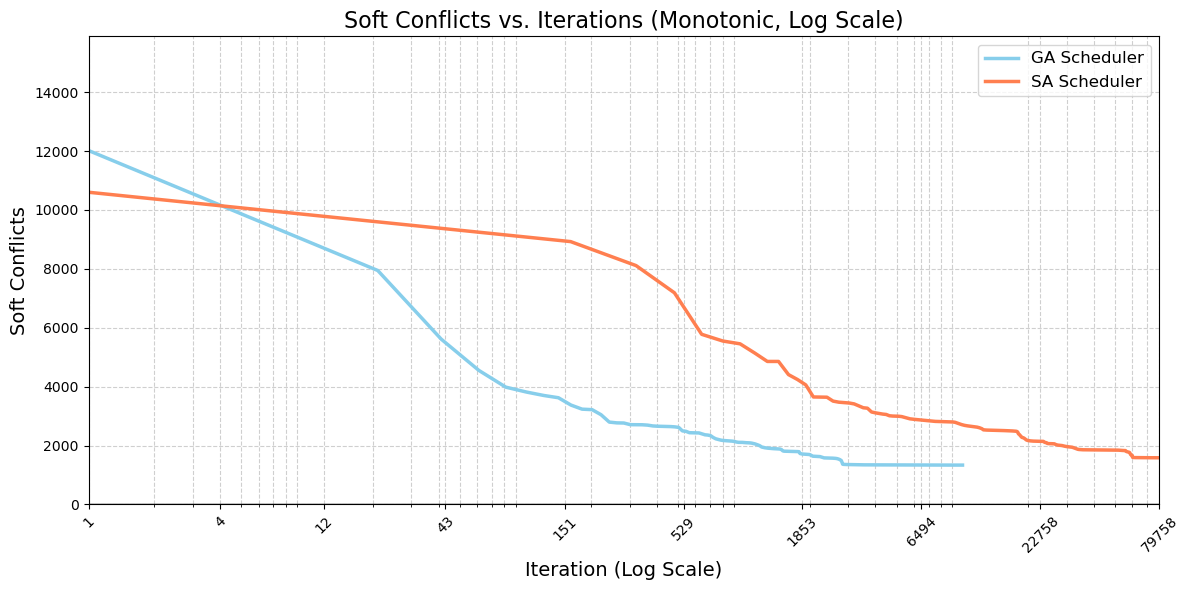

<svg width='800' height='400'><text x='400.0' y='25.0' text-anchor='middle' font-size='18'>Soft Conflicts vs. Iterations (Monotonic, Log Scale)</text><text x='400.0' y='387.5' text-anchor='middle' font-size='14'>Iteration (Log Scale)</text><text x='12.5' y='200.0' text-anchor='middle' font-size='14' transform='rotate(-90 12.5 200.0)'>Soft Conflicts</text><path d='M 50.0,100.53636929891343 L 239.00920260746207,185.06917476035136 L 280.50800605126517,233.47952059191945 L 305.15009463884866,255.54069592025772 L 322.7381265279456,267.3167435592623 L 336.4245634008569,270.81518228465643 L 347.62997289110655,273.19346194013826 L 357.11730467741035,274.7768417047114 L 365.3440381676949,279.9576921354976 L 372.6062159444424,282.8292862531128 L 379.10646876941684,283.1669808336467 L 384.9896015629314,286.7445201299657 L 390.36269745066363,291.9439869693993 L 395.3071793920557,292.49506245194044 L 399.88640572936094,292.5952925244151 L 404.1506479513932,293.7598036085295 L 408.14046385858387,293

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import PchipInterpolator

# --- Data Set 1 (GA) ---
iterationsGA = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 64, 65, 67, 70, 71, 73, 75, 77, 79, 81, 84, 89, 91, 95, 97, 103, 105, 110, 113, 115, 124, 128, 133, 143, 145, 149, 155, 163, 164, 166, 168, 169, 180, 194, 202, 206, 208, 217, 218, 219, 221, 222, 237, 240, 245, 263, 299, 300, 301, 358, 367, 510, 516, 542, 543, 544, 547, 638, 646, 690, 719, 722, 751, 775, 786, 926, 927, 997, 1006, 1053, 1187, 1200, 1332, 1474, 1516, 1677, 1788, 1790, 1825, 1841, 1944, 2000, 2019, 2033, 2050, 2052, 2192, 2344, 2423, 2611, 2792, 2835, 3064, 3179, 10013]
soft_conflictsGA = [12015, 12093, 10426, 9947, 14449, 9778, 9698, 9556, 10434, 9551, 9779, 9273, 9148, 9043, 8893, 8281, 8041, 8753, 8101, 7951, 7861, 7999, 7899, 7839, 7791, 7746, 7559, 7401, 7287, 7192, 7056, 6930, 6537, 6201, 5915, 5789, 5623, 5557, 5443, 5374, 5194, 5144, 5135, 5134, 4955, 4945, 4845, 4820, 4718, 4641, 4622, 4567, 4556, 4501, 4449, 4413, 4311, 4263, 4185, 4137, 4095, 4083, 4023, 3987, 3933, 3878, 3848, 3836, 3826, 3808, 3796, 3789, 3756, 3732, 3690, 3678, 3667, 3606, 3535, 3392, 3387, 3365, 3309, 3287, 3251, 3246, 3236, 3230, 3218, 3194, 3184, 3139, 3137, 3092, 3054, 3044, 2938, 2807, 2787, 2769, 2757, 2721, 2709, 2703, 2679, 2607, 2504, 2486, 2480, 2462, 2444, 2420, 2380, 2350, 2302, 2278, 2218, 2194, 2182, 2117, 2111, 2105, 2099, 2093, 1985, 1955, 1900, 1876, 1810, 1800, 1790, 1753, 1720, 1714, 1703, 1692, 1676, 1666, 1648, 1640, 1634, 1579, 1577, 1566, 1489, 1363, 1352, 1346, 1336]

# --- Data Set 2 (SA) ---
iterationsSA = [1, 4, 6, 7, 9, 14, 18, 24, 27, 39, 43, 47, 65, 66, 74, 80, 89, 90, 93, 102, 110, 112, 113, 126, 134, 152, 169, 178, 180, 182, 190, 195, 217, 231, 236, 262, 270, 274, 296, 301, 304, 318, 336, 347, 362, 372, 378, 383, 384, 395, 405, 416, 423, 432, 454, 455, 456, 459, 464, 469, 477, 483, 526, 530, 532, 552, 553, 555, 561, 581, 582, 590, 596, 611, 644, 682, 698, 716, 810, 830, 887, 959, 983, 1032, 1047, 1052, 1110, 1126, 1131, 1132, 1199, 1225, 1282, 1322, 1328, 1375, 1382, 1440, 1470, 1486, 1503, 1507, 1633, 1663, 1719, 1764, 1779, 1847, 2068, 2427, 2466, 2568, 2580, 2719, 3112, 3614, 3730, 3766, 3805, 3878, 3985, 4356, 4493, 4564, 4669, 4932, 5155, 5471, 5505, 5794, 6105, 6530, 7467, 9119, 9811, 10060, 10136, 10221, 12337, 12412, 13817, 14660, 17250, 17886, 17916, 17927, 18130, 18595, 18658, 18787, 19321, 19396, 20332, 21119, 22409, 23481, 23804, 24333, 24391, 24654, 26479, 26482, 28745, 29990, 31285, 34168, 35851, 45831, 51476, 55001, 55812, 56063, 58251, 58530, 58645, 58762, 58859, 58905, 59381, 60015, 60031, 61707, 79758]
soft_conflictsSA = [10600, 10486, 10474, 10516, 10751, 10649, 10571, 10501, 10406, 10021, 9978, 9893, 9898, 9997, 9889, 10082, 9621, 9586, 9349, 9325, 9163, 9188, 9163, 9138, 8927, 8922, 8927, 8380, 8378, 8237, 8135, 8063, 8069, 8003, 8361, 8337, 8295, 8223, 8217, 8205, 8133, 8115, 8055, 7947, 7887, 7870, 7762, 7864, 8045, 7973, 7943, 7915, 8239, 8206, 8042, 8032, 7581, 7245, 7311, 7289, 7253, 7145, 7031, 6943, 6895, 6681, 6586, 6506, 6195, 6189, 6134, 6074, 5920, 5854, 5774, 5766, 5754, 5634, 5538, 5508, 5478, 5454, 5418, 5370, 5330, 5320, 5212, 5068, 4969, 4947, 4915, 4867, 4855, 4849, 4738, 4726, 4660, 4998, 4974, 4681, 4675, 4433, 4402, 4391, 4356, 4235, 4229, 4211, 3650, 3639, 3597, 3498, 3483, 3472, 3434, 3268, 3267, 3179, 3157, 3124, 3112, 3064, 3053, 3023, 3008, 2997, 2993, 2953, 2947, 2903, 2885, 2863, 2821, 2797, 2722, 2698, 2692, 2686, 2565, 2535, 2519, 2513, 2491, 2469, 2447, 2414, 2391, 2294, 2282, 2276, 2231, 2209, 2161, 2150, 2144, 2142, 2109, 2092, 2078, 2067, 2056, 2051, 1996, 1965, 1954, 1866, 1856, 1850, 1844, 1830, 1829, 1807, 1763, 1737, 1722, 1710, 1704, 1692, 1680, 1656, 1602, 1591, 1585]

def process_and_plot(iterations, soft_conflicts, color, label, ax):
    """Processes and plots the data, ensuring monotonicity."""

    # Sort the data
    sorted_data = sorted(zip(iterations, soft_conflicts))
    iterations, soft_conflicts = zip(*sorted_data)
    iterations = np.array(iterations)
    soft_conflicts = np.array(soft_conflicts)

    # Use PchipInterpolator for smooth, monotonic interpolation
    pchip = PchipInterpolator(iterations, soft_conflicts)
    xnew = np.linspace(iterations.min(), iterations.max(), 500)
    y_smooth = pchip(xnew)

    # Enforce monotonicity and non-negativity
    for i in range(1, len(y_smooth)):
        y_smooth[i] = min(y_smooth[i - 1], y_smooth[i])
        y_smooth[i] = max(0, y_smooth[i])

    ax.plot(xnew, y_smooth, color=color, linewidth=2.5, label=label)


def integer_log_ticks(min_val, max_val, num_ticks=10):
    """Generates integer tick positions for a log scale."""
    log_min = np.log10(min_val)
    log_max = np.log10(max_val)
    log_ticks = np.logspace(log_min, log_max, num_ticks)
    int_ticks = np.unique(np.round(log_ticks).astype(int))
    int_ticks = int_ticks[(int_ticks >= min_val) & (int_ticks <= max_val)]
    return int_ticks


# --- Create the plot ---
fig, ax = plt.subplots(figsize=(12, 6))

# --- Plot both datasets ---
process_and_plot(iterationsGA, soft_conflictsGA, 'skyblue', "GA Scheduler", ax)
process_and_plot(iterationsSA, soft_conflictsSA, 'coral', "SA Scheduler", ax)

# --- Horizontal Line at Zero ---
# Find first zero for GA
first_zero_index_ga = next((i for i, val in enumerate(soft_conflictsGA) if val == 0), None)
if first_zero_index_ga is not None:
    first_zero_x_ga = iterationsGA[first_zero_index_ga]
else:
    first_zero_x_ga = min(iterationsGA) # Default to min if no zero found

# Find first zero for SA
first_zero_index_sa = next((i for i, val in enumerate(soft_conflictsSA) if val == 0), None)
if first_zero_index_sa is not None:
    first_zero_x_sa = iterationsSA[first_zero_index_sa]
else:
    first_zero_x_sa = min(iterationsSA)  # Default to min if no zero

# Use the earlier of the two "first zero" x-values
first_zero_x = min(first_zero_x_ga, first_zero_x_sa)

# Find overall max iteration
max_iteration = max(max(iterationsGA), max(iterationsSA))

ax.axhline(y=0, xmin=(first_zero_x - 1) / (max_iteration - 1), xmax=1, color='black', linewidth=1)


# --- Logarithmic X-Axis, Integer Ticks, and set X-Axis Limits ---
ax.set_xscale('log')
tick_positions = integer_log_ticks(1, max_iteration)
ax.set_xticks(tick_positions)
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.tick_params(axis='x', rotation=45)
ax.set_xlim(1, max_iteration)

# --- General Plot Styling ---
ax.set_title('Soft Conflicts vs. Iterations (Monotonic, Log Scale)', fontsize=16)
ax.set_xlabel('Iteration (Log Scale)', fontsize=14)
ax.set_ylabel('Soft Conflicts', fontsize=14)
ax.grid(True, which="both", ls="--", alpha=0.6)
max_y_value = max(max(soft_conflictsGA),max(soft_conflictsSA))
ax.set_ylim(0, max_y_value * 1.1)
ax.legend(fontsize=12)

plt.tight_layout()
plt.savefig('soft_conflicts_combined_plot.png', bbox_inches='tight')
plt.show()



def generate_combined_svg(iterations1, soft_conflicts1, iterations2, soft_conflicts2, width=800, height=400, padding=50):
    """Generates an SVG plot of the combined data."""
    try:
        import numpy as np
        from scipy.interpolate import PchipInterpolator

        def process_data(iterations, soft_conflicts):
            """Processes data for SVG plotting, ensuring monotonicity."""
            if not iterations or not soft_conflicts or len(iterations) != len(soft_conflicts) or len(iterations) < 2:
                return None, None

            sorted_data = sorted(zip(iterations, soft_conflicts))
            iterations, soft_conflicts = zip(*sorted_data)
            iterations = np.array(iterations)
            soft_conflicts = np.array(soft_conflicts)

            pchip = PchipInterpolator(iterations, soft_conflicts)
            xnew = np.linspace(iterations.min(), iterations.max(), 500)
            y_smooth = pchip(xnew)

            for i in range(1, len(y_smooth)):
                y_smooth[i] = min(y_smooth[i - 1], y_smooth[i])
                y_smooth[i] = max(0, y_smooth[i])

            return xnew, y_smooth

        # --- Process Data ---
        xnew1, y_smooth1 = process_data(iterations1, soft_conflicts1)
        xnew2, y_smooth2 = process_data(iterations2, soft_conflicts2)


        if xnew1 is None or xnew2 is None:  # Handle invalid data cases
           return "<text x='50' y='50' fill='red'>Error: Invalid input data.</text>"

        # Determine overall maximum iteration and maximum conflict for scaling
        max_iteration = max(max(iterations1), max(iterations2))
        max_conflict = max(max(soft_conflicts1), max(soft_conflicts2))

        # --- Start Building SVG ---
        svg_elements = []

        # Add Title and Axis Labels
        svg_elements.append(f"<text x='{width/2}' y='{padding/2}' text-anchor='middle' font-size='18'>Soft Conflicts vs. Iterations (Monotonic, Log Scale)</text>")
        svg_elements.append(f"<text x='{width/2}' y='{height - padding/4}' text-anchor='middle' font-size='14'>Iteration (Log Scale)</text>")
        svg_elements.append(f"<text x='{padding/4}' y='{height/2}' text-anchor='middle' font-size='14' transform='rotate(-90 {padding/4} {height/2})'>Soft Conflicts</text>")

        # --- Logarithmic X-Scale Conversion ---
        def log_scale(x):
            return np.log(max(x, 1e-10))  # Avoid log(0)

        min_log_x = log_scale(1)
        max_log_x = log_scale(max_iteration)

        def get_x_coord(iteration):
            """Converts iteration to x-coordinate on log scale."""
            log_x = log_scale(iteration)
            x_scale = (width - 2 * padding) / (max_log_x - min_log_x)
            return padding + (log_x - min_log_x) * x_scale
        # --- Y-Scale ---
        y_scale = (height - 2 * padding) / max_conflict if max_conflict > 0 else 0

        # --- Plot Data Set 1 (SVG Path) ---
        path_d1 = "M "
        for i in range(len(xnew1)):
            if xnew1[i] >= 1:  # Ensure valid log scaling
                x_coord = get_x_coord(xnew1[i])
                y_coord = height - padding - y_smooth1[i] * y_scale
                path_d1 += f"{x_coord},{y_coord} "  # Use comma as separator
                if i < len(xnew1) - 1:
                    path_d1 += "L "
        svg_elements.append(f"<path d='{path_d1.strip()}' stroke='skyblue' stroke-width='2' fill='none'/>")

        # --- Plot Data Set 2 (SVG Path) ---
        path_d2 = "M "
        for i in range(len(xnew2)):
            if xnew2[i] >= 1:  # Ensure valid log scaling
                x_coord = get_x_coord(xnew2[i])
                y_coord = height - padding - y_smooth2[i] * y_scale
                path_d2 += f"{x_coord},{y_coord} "
                if i < len(xnew2) - 1:
                    path_d2 += "L "

        svg_elements.append(f"<path d='{path_d2.strip()}' stroke='coral' stroke-width='2' fill='none'/>")


        # --- Legend ---
        legend_x = width - padding - 120
        legend_y = padding
        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y}' width='10' height='10' fill='skyblue'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 10}' font-size='12'>GA Scheduler</text>")
        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y + 20}' width='10' height='10' fill='coral'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 30}' font-size='12'>SA Scheduler</text>")


        # --- Horizontal Line at Zero ---
        first_zero_index1 = next((i for i, val in enumerate(soft_conflicts1) if val == 0), None)
        first_zero_index2 = next((i for i, val in enumerate(soft_conflicts2) if val == 0), None)

        if first_zero_index1 is not None:
            x1_zero_1 = get_x_coord(iterations1[first_zero_index1])
        else:
            x1_zero_1 = get_x_coord(1)

        if first_zero_index2 is not None:
          x1_zero_2 = get_x_coord(iterations2[first_zero_index2])
        else:
          x1_zero_2 = get_x_coord(1)


        x1_zero = min(x1_zero_1, x1_zero_2)
        x2_zero = get_x_coord(max_iteration)
        y_zero = height - padding
        svg_elements.append(f"<line x1='{x1_zero}' y1='{y_zero}' x2='{x2_zero}' y2='{y_zero}' stroke='black' stroke-width='1'/>")


        # --- Axes ---
        svg_elements.append(f"<line x1='{padding}' y1='{height - padding}' x2='{width - padding}' y2='{height - padding}' stroke='black'/>")  # X-axis
        svg_elements.append(f"<line x1='{padding}' y1='{height - padding}' x2='{padding}' y2='{padding}' stroke='black'/>")  # Y-axis

        # --- Logarithmic X-axis Ticks (Integer) ---
        tick_positions = integer_log_ticks(1, max_iteration)
        for tick in tick_positions:
            x = get_x_coord(tick)
            y = height - padding
            svg_elements.append(f"<line x1='{x}' y1='{y}' x2='{x}' y2='{y + 5}' stroke='black'/>")  # Tick mark
            svg_elements.append(f"<text x='{x}' y='{y + 20}' text-anchor='middle' font-size='10' transform='rotate(-45 {x} {y+20})'>{tick}</text>")  # Tick label

        # --- Linear Y-axis Ticks ---
        num_y_ticks = 5
        if max_conflict > 0:
          y_tick_interval_val = max_conflict / num_y_ticks
          y_tick_interval_coord = (height - 2 * padding) / num_y_ticks

          for i in range(num_y_ticks + 1):
                x = padding
                y = height - padding - i * y_tick_interval_coord
                svg_elements.append(f"<line x1='{x}' y1='{y}' x2='{x - 5}' y2='{y}' stroke='black'/>")  # Tick mark
                label = f"{int(i * y_tick_interval_val)}"  # Format as integer
                svg_elements.append(f"<text x='{x - 10}' y='{y + 4}' text-anchor='end' font-size='10'>{label}</text>") # Tick Label

        # --- Combine SVG Elements ---
        full_svg = f"<svg width='{width}' height='{height}'>{ ''.join(svg_elements) }</svg>"
        return full_svg

    except ImportError as e:
        return f"<text x='50' y='50' fill='red'>Error: Missing library: {e}.</text>"
    except Exception as e:
        return f"<text x='50' y='50' fill='red'>Error: {e}</text>"
# --- Generate SVG Output ---
svg_output = generate_combined_svg(iterationsGA, soft_conflictsGA, iterationsSA, soft_conflictsSA)
print(svg_output)

In [ ]:
soft_conflictsTS = [11442, 11718, 11742, 11658, 11504, 11414, 11117, 10853, 10583, 10553, 10410, 10128, 9222, 9207, 8998, 8712, 8632, 8437, 8335, 8455, 8371, 8406, 8311, 8306, 8276, 8100, 8050, 7027, 6950, 6614, 6559, 6537, 6522, 6276, 6270, 6156, 5714, 5664, 5604, 5428, 5374, 5354, 5319, 5215, 5180, 4990, 4946, 4934, 4912, 4822, 4742, 4736, 4664, 4654, 4610, 4596, 4576, 4564, 4600, 4594, 4504, 4456, 4445, 4409, 4348, 4310, 4267, 4201, 4135, 4110, 4104, 4050, 4040, 3974, 3956, 3931, 3920, 3881, 3876, 3842, 3672, 3612, 3608, 3602, 3584, 3505, 3439, 3368, 3345, 3335, 3385, 3373, 3325, 3312, 3262, 3226, 3196, 3112, 3094, 3081, 3059, 3053, 3048, 3026, 3020, 2966, 2954, 2943, 2918, 2900, 2894, 2870, 2716, 2710, 2700, 2645, 2590, 2562, 2514, 2503, 2498, 2492, 2468, 2474, 2468, 2446, 2381, 2336, 2296, 2286, 2232, 2178, 2167, 2163, 2152, 2212, 2266, 2311, 2291, 2256, 2268, 2226, 2221, 2254, 2249, 2231, 2201, 2168, 2162, 2114, 2134, 2128, 2188, 2183, 2167, 2155, 2161, 2155, 2137, 2147, 2070, 2060, 2054, 2034, 2076, 2148, 2076, 2040, 2030, 2095, 2092, 2110, 2048, 2030, 2046, 2030, 2024, 2145, 2084, 2024, 2039, 2450, 2435, 2450, 2291, 2237, 2225, 2210, 2205, 2193, 2163, 2085, 2075, 2153, 2075, 2045, 2095, 2045, 2034, 2012, 2037, 2034, 2012, 2062, 2057, 2012, 2052, 2037, 2012, 1997, 2045, 2051, 2003, 1997, 2047, 2027, 2122, 2102, 2082, 2067, 2037, 1983, 1969, 1959, 1949, 1944, 1956, 1910, 1904, 2168, 2058, 1904, 1988, 1982, 2012, 1982, 1898,


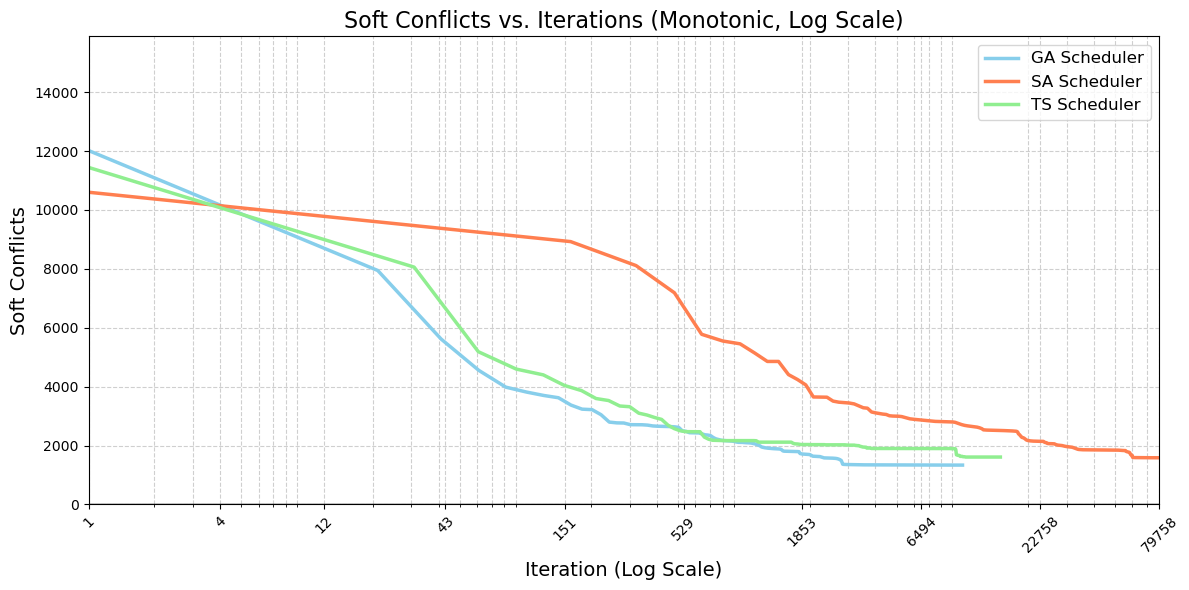

<svg width='800' height='400'><text x='400.0' y='25.0' text-anchor='middle' font-size='18'>Soft Conflicts vs. Iterations (Monotonic, Log Scale)</text><text x='400.0' y='387.5' text-anchor='middle' font-size='14'>Iteration (Log Scale)</text><text x='12.5' y='200.0' text-anchor='middle' font-size='14' transform='rotate(-90 12.5 200.0)'>Soft Conflicts</text><path d='M 50.0,100.53636929891343 L 239.00920260746207,185.06917476035136 L 280.50800605126517,233.47952059191945 L 305.15009463884866,255.54069592025772 L 322.7381265279456,267.3167435592623 L 336.4245634008569,270.81518228465643 L 347.62997289110655,273.19346194013826 L 357.11730467741035,274.7768417047114 L 365.3440381676949,279.9576921354976 L 372.6062159444424,282.8292862531128 L 379.10646876941684,283.1669808336467 L 384.9896015629314,286.7445201299657 L 390.36269745066363,291.9439869693993 L 395.3071793920557,292.49506245194044 L 399.88640572936094,292.5952925244151 L 404.1506479513932,293.7598036085295 L 408.14046385858387,293

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import PchipInterpolator

# --- Data Set 1 (GA) ---
iterationsGA = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 64, 65, 67, 70, 71, 73, 75, 77, 79, 81, 84, 89, 91, 95, 97, 103, 105, 110, 113, 115, 124, 128, 133, 143, 145, 149, 155, 163, 164, 166, 168, 169, 180, 194, 202, 206, 208, 217, 218, 219, 221, 222, 237, 240, 245, 263, 299, 300, 301, 358, 367, 510, 516, 542, 543, 544, 547, 638, 646, 690, 719, 722, 751, 775, 786, 926, 927, 997, 1006, 1053, 1187, 1200, 1332, 1474, 1516, 1677, 1788, 1790, 1825, 1841, 1944, 2000, 2019, 2033, 2050, 2052, 2192, 2344, 2423, 2611, 2792, 2835, 3064, 3179, 10013]
soft_conflictsGA = [12015, 12093, 10426, 9947, 14449, 9778, 9698, 9556, 10434, 9551, 9779, 9273, 9148, 9043, 8893, 8281, 8041, 8753, 8101, 7951, 7861, 7999, 7899, 7839, 7791, 7746, 7559, 7401, 7287, 7192, 7056, 6930, 6537, 6201, 5915, 5789, 5623, 5557, 5443, 5374, 5194, 5144, 5135, 5134, 4955, 4945, 4845, 4820, 4718, 4641, 4622, 4567, 4556, 4501, 4449, 4413, 4311, 4263, 4185, 4137, 4095, 4083, 4023, 3987, 3933, 3878, 3848, 3836, 3826, 3808, 3796, 3789, 3756, 3732, 3690, 3678, 3667, 3606, 3535, 3392, 3387, 3365, 3309, 3287, 3251, 3246, 3236, 3230, 3218, 3194, 3184, 3139, 3137, 3092, 3054, 3044, 2938, 2807, 2787, 2769, 2757, 2721, 2709, 2703, 2679, 2607, 2504, 2486, 2480, 2462, 2444, 2420, 2380, 2350, 2302, 2278, 2218, 2194, 2182, 2117, 2111, 2105, 2099, 2093, 1985, 1955, 1900, 1876, 1810, 1800, 1790, 1753, 1720, 1714, 1703, 1692, 1676, 1666, 1648, 1640, 1634, 1579, 1577, 1566, 1489, 1363, 1352, 1346, 1336]

# --- Data Set 2 (SA) ---
iterationsSA = [1, 4, 6, 7, 9, 14, 18, 24, 27, 39, 43, 47, 65, 66, 74, 80, 89, 90, 93, 102, 110, 112, 113, 126, 134, 152, 169, 178, 180, 182, 190, 195, 217, 231, 236, 262, 270, 274, 296, 301, 304, 318, 336, 347, 362, 372, 378, 383, 384, 395, 405, 416, 423, 432, 454, 455, 456, 459, 464, 469, 477, 483, 526, 530, 532, 552, 553, 555, 561, 581, 582, 590, 596, 611, 644, 682, 698, 716, 810, 830, 887, 959, 983, 1032, 1047, 1052, 1110, 1126, 1131, 1132, 1199, 1225, 1282, 1322, 1328, 1375, 1382, 1440, 1470, 1486, 1503, 1507, 1633, 1663, 1719, 1764, 1779, 1847, 2068, 2427, 2466, 2568, 2580, 2719, 3112, 3614, 3730, 3766, 3805, 3878, 3985, 4356, 4493, 4564, 4669, 4932, 5155, 5471, 5505, 5794, 6105, 6530, 7467, 9119, 9811, 10060, 10136, 10221, 12337, 12412, 13817, 14660, 17250, 17886, 17916, 17927, 18130, 18595, 18658, 18787, 19321, 19396, 20332, 21119, 22409, 23481, 23804, 24333, 24391, 24654, 26479, 26482, 28745, 29990, 31285, 34168, 35851, 45831, 51476, 55001, 55812, 56063, 58251, 58530, 58645, 58762, 58859, 58905, 59381, 60015, 60031, 61707, 79758]
soft_conflictsSA = [10600, 10486, 10474, 10516, 10751, 10649, 10571, 10501, 10406, 10021, 9978, 9893, 9898, 9997, 9889, 10082, 9621, 9586, 9349, 9325, 9163, 9188, 9163, 9138, 8927, 8922, 8927, 8380, 8378, 8237, 8135, 8063, 8069, 8003, 8361, 8337, 8295, 8223, 8217, 8205, 8133, 8115, 8055, 7947, 7887, 7870, 7762, 7864, 8045, 7973, 7943, 7915, 8239, 8206, 8042, 8032, 7581, 7245, 7311, 7289, 7253, 7145, 7031, 6943, 6895, 6681, 6586, 6506, 6195, 6189, 6134, 6074, 5920, 5854, 5774, 5766, 5754, 5634, 5538, 5508, 5478, 5454, 5418, 5370, 5330, 5320, 5212, 5068, 4969, 4947, 4915, 4867, 4855, 4849, 4738, 4726, 4660, 4998, 4974, 4681, 4675, 4433, 4402, 4391, 4356, 4235, 4229, 4211, 3650, 3639, 3597, 3498, 3483, 3472, 3434, 3268, 3267, 3179, 3157, 3124, 3112, 3064, 3053, 3023, 3008, 2997, 2993, 2953, 2947, 2903, 2885, 2863, 2821, 2797, 2722, 2698, 2692, 2686, 2565, 2535, 2519, 2513, 2491, 2469, 2447, 2414, 2391, 2294, 2282, 2276, 2231, 2209, 2161, 2150, 2144, 2142, 2109, 2092, 2078, 2067, 2056, 2051, 1996, 1965, 1954, 1866, 1856, 1850, 1844, 1830, 1829, 1807, 1763, 1737, 1722, 1710, 1704, 1692, 1680, 1656, 1602, 1591, 1585]

# --- Data Set 3 (TS) ---
iterationsTS = [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 36, 38, 39, 40, 41, 42, 46, 48, 49, 51, 52, 54, 55, 56, 59, 61, 62, 64, 65, 66, 67, 69, 73, 75, 77, 82, 85, 86, 87, 89, 91, 92, 93, 101, 119, 125, 127, 128, 130, 132, 135, 144, 146, 151, 152, 155, 159, 161, 163, 173, 186, 189, 192, 196, 201, 229, 244, 257, 258, 268, 280, 285, 294, 295, 306, 309, 311, 312, 315, 337, 344, 345, 351, 352, 372, 377, 384, 389, 397, 408, 417, 418, 423, 425, 441, 445, 459, 462, 500, 506, 510, 517, 519, 554, 607, 632, 633, 637, 649, 657, 659, 679, 722, 809, 817, 833, 838, 847, 919, 921, 935, 951, 957, 966, 1027, 1089, 1100, 1102, 1118, 1140, 1156, 1250, 1260, 1379, 1442, 1465, 1469, 1482, 1492, 1516, 1646, 1682, 1701, 1753, 1835, 1890, 1910, 1945, 1954, 2028, 2058, 2059, 2074, 2076, 2175, 2340, 2342, 2375, 2500, 2505, 2524, 2528, 2549, 2589, 2597, 2608, 2611, 2614, 2616, 2618, 2620, 2624, 2660, 2693, 2747, 2751, 2765, 2874, 2901, 2922, 2939, 2948, 2957, 2982, 3064, 3080, 3084, 3192, 3197, 3207, 3223, 3248, 3258, 3260, 3299, 3309, 3324, 3326, 3327, 3328, 3345, 3378, 3380, 3433, 3463, 3504, 3591, 3612, 3655, 3669, 3689, 3696, 3713, 3736, 3764, 3791, 3806, 3812, 3956, 3968, 3977, 4008, 4050, 4160, 4207, 4217, 4267, 4280, 4283, 4369, 4436, 4442, 4444, 4449, 4472, 4495, 4515, 4743, 4747, 4752, 4794, 4902, 4920, 5110, 5230, 5288, 5347, 5348, 5386, 5709, 5828, 5831, 5848, 5854, 6033, 6073, 6080, 6083, 6099, 6106, 6123, 6132, 6140, 6154, 6165, 6206, 6297, 6396, 6413, 6522, 6538, 6550, 6553, 6559, 6651, 6656, 6722, 6787, 6805, 6933, 6941, 6942, 6960, 7187, 7188, 7194, 7195, 7201, 7204, 7206, 7219, 7300, 7312, 7401, 7437, 7453, 7463, 7469, 7492, 7497, 7499, 7506, 7513, 7516, 7545, 7554, 7592, 7622, 7625, 7627, 7663, 7708, 7715, 7890, 8008, 8020, 8277, 8306, 8331, 8340, 8361, 8372, 8374, 8389, 8425, 8449, 8491, 8498, 8501, 8511, 8521, 8525, 8540, 8547, 8548, 8577, 8653, 8675, 8701, 8703, 8727, 8730, 8761, 8807, 8814, 8832, 8863, 8869, 8883, 8992, 9001, 9089, 9105, 9179, 9268, 9301, 9320, 9330, 9333, 9339, 9384, 9469, 9555, 9559, 9560, 9723, 9798, 9849, 9908, 10005, 10025, 10076, 10219, 10244, 10362, 10433, 10445, 10598, 10637, 10754, 10770, 10781, 10783, 10792, 10796, 10810, 10813, 10814, 10821, 10823, 10847, 10851, 10860, 10898, 10988, 11025, 11026, 11032, 11074, 11095, 11097, 11145, 11192, 11194, 11200, 11210, 11254, 11286, 11299, 11308, 11331, 11400, 11407, 11485, 11509, 11519, 11534, 11672, 11674, 11690, 11692, 11706, 11707, 11730, 11741, 11870, 12019, 12058, 12360, 12371, 12625, 12640, 12666, 12673, 12675, 12687, 12699, 12703, 12712, 12738, 12743, 12844, 12872, 12882, 12913, 12935, 13001, 13201, 13223, 13329, 13339, 13356, 13503, 13510, 13624, 13649, 13665, 13760, 13810, 13852, 13853, 13854, 13866, 13876, 13886, 13893, 13895, 13920, 13970, 14064, 14140, 14148, 14310, 14323, 14342, 14367, 14377, 14455, 14544, 14591, 14597, 14661, 14677, 14758, 14923]
soft_conflictsTS = [11442, 11718, 11742, 11658, 11504, 11414, 11117, 10853, 10583, 10553, 10410, 10128, 9222, 9207, 8998, 8712, 8632, 8437, 8335, 8455, 8371, 8406, 8311, 8306, 8276, 8100, 8050, 7027, 6950, 6614, 6559, 6537, 6522, 6276, 6270, 6156, 5714, 5664, 5604, 5428, 5374, 5354, 5319, 5215, 5180, 4990, 4946, 4934, 4912, 4822, 4742, 4736, 4664, 4654, 4610, 4596, 4576, 4564, 4600, 4594, 4504, 4456, 4445, 4409, 4348, 4310, 4267, 4201, 4135, 4110, 4104, 4050, 4040, 3974, 3956, 3931, 3920, 3881, 3876, 3842, 3672, 3612, 3608, 3602, 3584, 3505, 3439, 3368, 3345, 3335, 3385, 3373, 3325, 3312, 3262, 3226, 3196, 3112, 3094, 3081, 3059, 3053, 3048, 3026, 3020, 2966, 2954, 2943, 2918, 2900, 2894, 2870, 2716, 2710, 2700, 2645, 2590, 2562, 2514, 2503, 2498, 2492, 2468, 2474, 2468, 2446, 2381, 2336, 2296, 2286, 2232, 2178, 2167, 2163, 2152, 2212, 2266, 2311, 2291, 2256, 2268, 2226, 2221, 2254, 2249, 2231, 2201, 2168, 2162, 2114, 2134, 2128, 2188, 2183, 2167, 2155, 2161, 2155, 2137, 2147, 2070, 2060, 2054, 2034, 2076, 2148, 2076, 2040, 2030, 2095, 2092, 2110, 2048, 2030, 2046, 2030, 2024, 2145, 2084, 2024, 2039, 2450, 2435, 2450, 2291, 2237, 2225, 2210, 2205, 2193, 2163, 2085, 2075, 2153, 2075, 2045, 2095, 2045, 2034, 2012, 2037, 2034, 2012, 2062, 2057, 2012, 2052, 2037, 2012, 1997, 2045, 2051, 2003, 1997, 2047, 2027, 2122, 2102, 2082, 2067, 2037, 1983, 1969, 1959, 1949, 1944, 1956, 1910, 1904, 2168, 2058, 1904, 1988, 1982, 2012, 1982, 1898, 1953, 1939, 1898, 1908, 1898, 2084, 1976, 1934, 1940, 1950, 1944, 1934, 2004, 1999, 1969, 1934, 2016, 1934, 1898, 1948, 1933, 1928, 1898, 1910, 1898, 1920, 1974, 1956, 1996, 1960, 1920, 1930, 1920, 1944, 1926, 1920, 1930, 2028, 2106, 2073, 2079, 2061, 2039, 2029, 2023, 2012, 1980, 1920, 2028, 1950, 1920, 1926, 1943, 1937, 1926, 1920, 1968, 1996, 1984, 1960, 1954, 1989, 1984, 1954, 1948, 1953, 1925, 1937, 1931, 1943, 1938, 1926, 1920, 2004, 1992, 1980, 1962, 1956, 2036, 2026, 2081, 2076, 2058, 2003, 2028, 2023, 2018, 1976, 2006, 1996, 1984, 1954, 1948, 1972, 1948, 1938, 1986, 1968, 1974, 2008, 1978, 1990, 1978, 1983, 1978, 2000, 1989, 1978, 1966, 2038, 2082, 2070, 2064, 2016, 1968, 2028, 2003, 1967, 1991, 1967, 1949, 1914, 1904, 1952, 1904, 1899, 1905, 1899, 1893, 1898, 1893, 1941, 1911, 1995, 1947, 1942, 1906, 1884, 1849, 1855, 1849, 1838, 1686, 1678, 1668, 1730, 1700, 1652, 1630, 1652, 1630, 1678, 1630, 1620, 1625, 1620, 1609, 1615, 1609, 1663, 1615, 1609, 1619, 1649, 1644, 1630, 1678, 1696, 1685, 1675, 1680, 1675, 1730, 1708, 1700, 1675, 1627, 1726, 1694, 1679, 1727, 1709, 1696, 1684, 1689, 1725, 1720, 1703, 1697, 1847, 1825, 1745, 1675, 1703, 1675, 1749, 1735, 1717, 1697, 1753, 2083, 1813, 1753, 1747, 1753, 1747, 1712, 1684, 1690, 1684, 1689, 1684, 1749, 1719, 1765, 1750, 1765, 1730, 1735, 1730, 1751, 1716, 1699, 1689, 1713, 1689, 1719, 1701, 1695, 1707, 1695, 1805, 1707, 1690, 1700, 1690, 1707, 1701, 1684, 1696, 1741, 1771, 1736, 1712, 1706, 1730, 1724, 1718, 1712, 1700, 1690, 1710, 1690, 1684, 1772, 1739, 1684, 1726, 1696, 1684, 1696, 1708, 1702, 1707, 1702, 1690, 1684]

def process_and_plot(iterations, soft_conflicts, color, label, ax):
    """Processes and plots the data, ensuring monotonicity."""

    # Sort the data
    sorted_data = sorted(zip(iterations, soft_conflicts))
    iterations, soft_conflicts = zip(*sorted_data)
    iterations = np.array(iterations)
    soft_conflicts = np.array(soft_conflicts)

    # Use PchipInterpolator for smooth, monotonic interpolation
    pchip = PchipInterpolator(iterations, soft_conflicts)
    xnew = np.linspace(iterations.min(), iterations.max(), 500)
    y_smooth = pchip(xnew)

    # Enforce monotonicity and non-negativity
    for i in range(1, len(y_smooth)):
        y_smooth[i] = min(y_smooth[i - 1], y_smooth[i])
        y_smooth[i] = max(0, y_smooth[i])

    ax.plot(xnew, y_smooth, color=color, linewidth=2.5, label=label)


def integer_log_ticks(min_val, max_val, num_ticks=10):
    """Generates integer tick positions for a log scale."""
    log_min = np.log10(min_val)
    log_max = np.log10(max_val)
    log_ticks = np.logspace(log_min, log_max, num_ticks)
    int_ticks = np.unique(np.round(log_ticks).astype(int))
    int_ticks = int_ticks[(int_ticks >= min_val) & (int_ticks <= max_val)]
    return int_ticks


# --- Create the plot ---
fig, ax = plt.subplots(figsize=(12, 6))

# --- Plot all three datasets ---
process_and_plot(iterationsGA, soft_conflictsGA, 'skyblue', "GA Scheduler", ax)
process_and_plot(iterationsSA, soft_conflictsSA, 'coral', "SA Scheduler", ax)
process_and_plot(iterationsTS, soft_conflictsTS, 'lightgreen', "TS Scheduler", ax)

# --- Horizontal Line at Zero ---
# Find first zero for GA
first_zero_index_ga = next((i for i, val in enumerate(soft_conflictsGA) if val == 0), None)
first_zero_x_ga = iterationsGA[first_zero_index_ga] if first_zero_index_ga is not None else min(iterationsGA)

# Find first zero for SA
first_zero_index_sa = next((i for i, val in enumerate(soft_conflictsSA) if val == 0), None)
first_zero_x_sa = iterationsSA[first_zero_index_sa] if first_zero_index_sa is not None else min(iterationsSA)

#Find first zero for TS
first_zero_index_ts = next((i for i, val in enumerate(soft_conflictsTS) if val == 0), None)
first_zero_x_ts = iterationsTS[first_zero_index_ts] if first_zero_index_ts is not None else min(iterationsTS)


# Use the earliest of the three "first zero" x-values
first_zero_x = min(first_zero_x_ga, first_zero_x_sa, first_zero_x_ts)

# Find overall max iteration
max_iteration = max(max(iterationsGA), max(iterationsSA), max(iterationsTS))

ax.axhline(y=0, xmin=(first_zero_x - 1) / (max_iteration - 1), xmax=1, color='black', linewidth=1)


# --- Logarithmic X-Axis, Integer Ticks, and set X-Axis Limits ---
ax.set_xscale('log')
tick_positions = integer_log_ticks(1, max_iteration)
ax.set_xticks(tick_positions)
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.tick_params(axis='x', rotation=45)
ax.set_xlim(1, max_iteration)

# --- General Plot Styling ---
ax.set_title('Soft Conflicts vs. Iterations (Monotonic, Log Scale)', fontsize=16)
ax.set_xlabel('Iteration (Log Scale)', fontsize=14)
ax.set_ylabel('Soft Conflicts', fontsize=14)
ax.grid(True, which="both", ls="--", alpha=0.6)
max_y_value = max(max(soft_conflictsGA),max(soft_conflictsSA), max(soft_conflictsTS))
ax.set_ylim(0, max_y_value * 1.1)
ax.legend(fontsize=12)

plt.tight_layout()
plt.savefig('soft_conflicts_combined_plot.png', bbox_inches='tight')
plt.show()



def generate_combined_svg(iterations1, soft_conflicts1, iterations2, soft_conflicts2, iterations3, soft_conflicts3, width=800, height=400, padding=50):
    """Generates an SVG plot of the combined data."""
    try:
        import numpy as np
        from scipy.interpolate import PchipInterpolator

        def process_data(iterations, soft_conflicts):
            """Processes data for SVG plotting, ensuring monotonicity."""
            if not iterations or not soft_conflicts or len(iterations) != len(soft_conflicts) or len(iterations) < 2:
                return None, None

            sorted_data = sorted(zip(iterations, soft_conflicts))
            iterations, soft_conflicts = zip(*sorted_data)
            iterations = np.array(iterations)
            soft_conflicts = np.array(soft_conflicts)

            pchip = PchipInterpolator(iterations, soft_conflicts)
            xnew = np.linspace(iterations.min(), iterations.max(), 500)
            y_smooth = pchip(xnew)

            for i in range(1, len(y_smooth)):
                y_smooth[i] = min(y_smooth[i - 1], y_smooth[i])
                y_smooth[i] = max(0, y_smooth[i])

            return xnew, y_smooth

        # --- Process Data ---
        xnew1, y_smooth1 = process_data(iterations1, soft_conflicts1)
        xnew2, y_smooth2 = process_data(iterations2, soft_conflicts2)
        xnew3, y_smooth3 = process_data(iterations3, soft_conflicts3)


        if xnew1 is None or xnew2 is None or xnew3 is None:  # Handle invalid data cases
           return "<text x='50' y='50' fill='red'>Error: Invalid input data.</text>"

        # Determine overall maximum iteration and maximum conflict for scaling
        max_iteration = max(max(iterations1), max(iterations2), max(iterations3))
        max_conflict = max(max(soft_conflicts1), max(soft_conflicts2), max(soft_conflicts3))

        # --- Start Building SVG ---
        svg_elements = []

        # Add Title and Axis Labels
        svg_elements.append(f"<text x='{width/2}' y='{padding/2}' text-anchor='middle' font-size='18'>Soft Conflicts vs. Iterations (Monotonic, Log Scale)</text>")
        svg_elements.append(f"<text x='{width/2}' y='{height - padding/4}' text-anchor='middle' font-size='14'>Iteration (Log Scale)</text>")
        svg_elements.append(f"<text x='{padding/4}' y='{height/2}' text-anchor='middle' font-size='14' transform='rotate(-90 {padding/4} {height/2})'>Soft Conflicts</text>")

        # --- Logarithmic X-Scale Conversion ---
        def log_scale(x):
            return np.log(max(x, 1e-10))  # Avoid log(0)

        min_log_x = log_scale(1)
        max_log_x = log_scale(max_iteration)

        def get_x_coord(iteration):
            """Converts iteration to x-coordinate on log scale."""
            log_x = log_scale(iteration)
            x_scale = (width - 2 * padding) / (max_log_x - min_log_x)
            return padding + (log_x - min_log_x) * x_scale
        # --- Y-Scale ---
        y_scale = (height - 2 * padding) / max_conflict if max_conflict > 0 else 0

        # --- Plot Data Set 1 (SVG Path) ---
        path_d1 = "M "
        for i in range(len(xnew1)):
            if xnew1[i] >= 1:
                x_coord = get_x_coord(xnew1[i])
                y_coord = height - padding - y_smooth1[i] * y_scale
                path_d1 += f"{x_coord},{y_coord} "
                if i < len(xnew1) - 1:
                    path_d1 += "L "
        svg_elements.append(f"<path d='{path_d1.strip()}' stroke='skyblue' stroke-width='2' fill='none'/>")

        # --- Plot Data Set 2 (SVG Path) ---
        path_d2 = "M "
        for i in range(len(xnew2)):
            if xnew2[i] >= 1:
                x_coord = get_x_coord(xnew2[i])
                y_coord = height - padding - y_smooth2[i] * y_scale
                path_d2 += f"{x_coord},{y_coord} "
                if i < len(xnew2) - 1:
                    path_d2 += "L "
        svg_elements.append(f"<path d='{path_d2.strip()}' stroke='coral' stroke-width='2' fill='none'/>")

        # --- Plot Data Set 3 (SVG Path) ---
        path_d3 = "M "
        for i in range(len(xnew3)):
            if xnew3[i] >= 1:
                x_coord = get_x_coord(xnew3[i])
                y_coord = height - padding - y_smooth3[i] * y_scale
                path_d3 += f"{x_coord},{y_coord} "
                if i < len(xnew3) - 1:
                    path_d3 += "L "
        svg_elements.append(f"<path d='{path_d3.strip()}' stroke='lightgreen' stroke-width='2' fill='none'/>")

        # --- Legend ---
        legend_x = width - padding - 120
        legend_y = padding
        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y}' width='10' height='10' fill='skyblue'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 10}' font-size='12'>GA Scheduler</text>")
        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y + 20}' width='10' height='10' fill='coral'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 30}' font-size='12'>SA Scheduler</text>")
        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y + 40}' width='10' height='10' fill='lightgreen'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 50}' font-size='12'>TS Scheduler</text>")


        # --- Horizontal Line at Zero ---
        first_zero_index1 = next((i for i, val in enumerate(soft_conflicts1) if val == 0), None)
        first_zero_index2 = next((i for i, val in enumerate(soft_conflicts2) if val == 0), None)
        first_zero_index3 = next((i for i, val in enumerate(soft_conflicts3) if val == 0), None)


        x1_zero_1 = get_x_coord(iterations1[first_zero_index1]) if first_zero_index1 is not None else get_x_coord(1)
        x1_zero_2 = get_x_coord(iterations2[first_zero_index2]) if first_zero_index2 is not None else get_x_coord(1)
        x1_zero_3 = get_x_coord(iterations3[first_zero_index3]) if first_zero_index3 is not None else get_x_coord(1)

        x1_zero = min(x1_zero_1, x1_zero_2, x1_zero_3)
        x2_zero = get_x_coord(max_iteration)
        y_zero = height - padding
        svg_elements.append(f"<line x1='{x1_zero}' y1='{y_zero}' x2='{x2_zero}' y2='{y_zero}' stroke='black' stroke-width='1'/>")


        # --- Axes ---
        svg_elements.append(f"<line x1='{padding}' y1='{height - padding}' x2='{width - padding}' y2='{height - padding}' stroke='black'/>")  # X-axis
        svg_elements.append(f"<line x1='{padding}' y1='{height - padding}' x2='{padding}' y2='{padding}' stroke='black'/>")  # Y-axis

        # --- Logarithmic X-axis Ticks (Integer) ---
        tick_positions = integer_log_ticks(1, max_iteration)
        for tick in tick_positions:
            x = get_x_coord(tick)
            y = height - padding
            svg_elements.append(f"<line x1='{x}' y1='{y}' x2='{x}' y2='{y + 5}' stroke='black'/>")  # Tick mark
            svg_elements.append(f"<text x='{x}' y='{y + 20}' text-anchor='middle' font-size='10' transform='rotate(-45 {x} {y+20})'>{tick}</text>")  # Tick label

        # --- Linear Y-axis Ticks ---
        num_y_ticks = 5
        if max_conflict > 0:
          y_tick_interval_val = max_conflict / num_y_ticks
          y_tick_interval_coord = (height - 2 * padding) / num_y_ticks

          for i in range(num_y_ticks + 1):
                x = padding
                y = height - padding - i * y_tick_interval_coord
                svg_elements.append(f"<line x1='{x}' y1='{y}' x2='{x - 5}' y2='{y}' stroke='black'/>")  # Tick mark
                label = f"{int(i * y_tick_interval_val)}"  # Format as integer
                svg_elements.append(f"<text x='{x - 10}' y='{y + 4}' text-anchor='end' font-size='10'>{label}</text>") # Tick Label

        # --- Combine SVG Elements ---
        full_svg = f"<svg width='{width}' height='{height}'>{ ''.join(svg_elements) }</svg>"
        return full_svg

    except ImportError as e:
        return f"<text x='50' y='50' fill='red'>Error: Missing library: {e}.</text>"
    except Exception as e:
        return f"<text x='50' y='50' fill='red'>Error: {e}</text>"
# --- Generate SVG Output ---
svg_output = generate_combined_svg(iterationsGA, soft_conflictsGA, iterationsSA, soft_conflictsSA, iterationsTS, soft_conflictsTS)
print(svg_output)

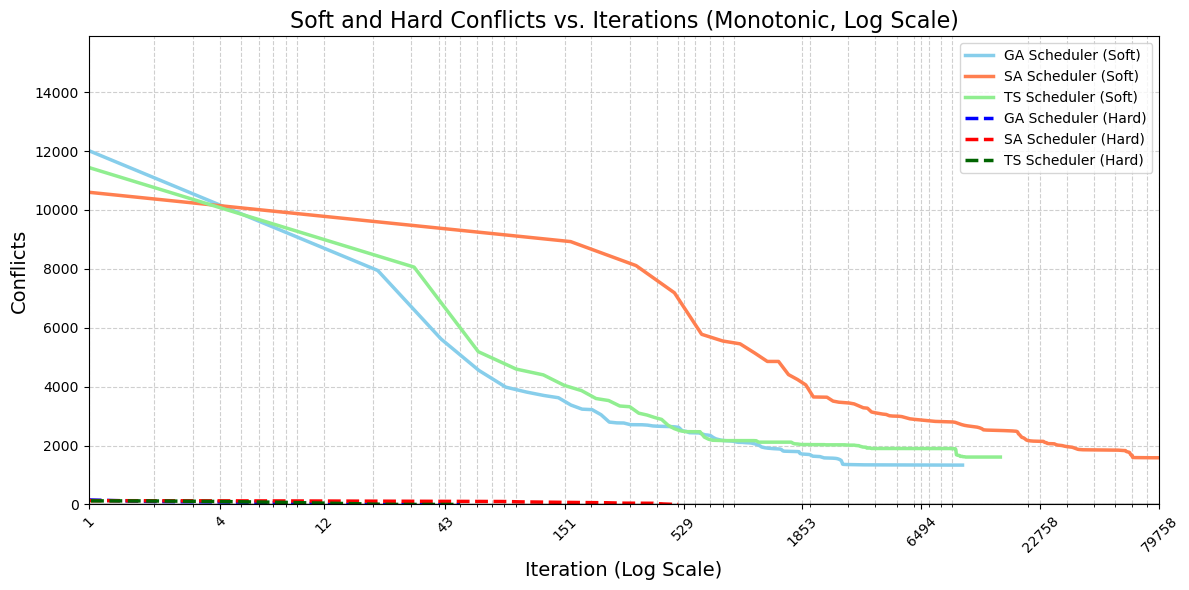

<text x='50' y='50' fill='red'>Error: Invalid input data.</text>


In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import PchipInterpolator

# --- Data Set 1 (GA) --- Soft Conflicts
iterationsGA = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 64, 65, 67, 70, 71, 73, 75, 77, 79, 81, 84, 89, 91, 95, 97, 103, 105, 110, 113, 115, 124, 128, 133, 143, 145, 149, 155, 163, 164, 166, 168, 169, 180, 194, 202, 206, 208, 217, 218, 219, 221, 222, 237, 240, 245, 263, 299, 300, 301, 358, 367, 510, 516, 542, 543, 544, 547, 638, 646, 690, 719, 722, 751, 775, 786, 926, 927, 997, 1006, 1053, 1187, 1200, 1332, 1474, 1516, 1677, 1788, 1790, 1825, 1841, 1944, 2000, 2019, 2033, 2050, 2052, 2192, 2344, 2423, 2611, 2792, 2835, 3064, 3179, 10013]
soft_conflictsGA = [12015, 12093, 10426, 9947, 14449, 9778, 9698, 9556, 10434, 9551, 9779, 9273, 9148, 9043, 8893, 8281, 8041, 8753, 8101, 7951, 7861, 7999, 7899, 7839, 7791, 7746, 7559, 7401, 7287, 7192, 7056, 6930, 6537, 6201, 5915, 5789, 5623, 5557, 5443, 5374, 5194, 5144, 5135, 5134, 4955, 4945, 4845, 4820, 4718, 4641, 4622, 4567, 4556, 4501, 4449, 4413, 4311, 4263, 4185, 4137, 4095, 4083, 4023, 3987, 3933, 3878, 3848, 3836, 3826, 3808, 3796, 3789, 3756, 3732, 3690, 3678, 3667, 3606, 3535, 3392, 3387, 3365, 3309, 3287, 3251, 3246, 3236, 3230, 3218, 3194, 3184, 3139, 3137, 3092, 3054, 3044, 2938, 2807, 2787, 2769, 2757, 2721, 2709, 2703, 2679, 2607, 2504, 2486, 2480, 2462, 2444, 2420, 2380, 2350, 2302, 2278, 2218, 2194, 2182, 2117, 2111, 2105, 2099, 2093, 1985, 1955, 1900, 1876, 1810, 1800, 1790, 1753, 1720, 1714, 1703, 1692, 1676, 1666, 1648, 1640, 1634, 1579, 1577, 1566, 1489, 1363, 1352, 1346, 1336]

# --- Data Set 2 (SA) --- Soft Conflicts
iterationsSA = [1, 4, 6, 7, 9, 14, 18, 24, 27, 39, 43, 47, 65, 66, 74, 80, 89, 90, 93, 102, 110, 112, 113, 126, 134, 152, 169, 178, 180, 182, 190, 195, 217, 231, 236, 262, 270, 274, 296, 301, 304, 318, 336, 347, 362, 372, 378, 383, 384, 395, 405, 416, 423, 432, 454, 455, 456, 459, 464, 469, 477, 483, 526, 530, 532, 552, 553, 555, 561, 581, 582, 590, 596, 611, 644, 682, 698, 716, 810, 830, 887, 959, 983, 1032, 1047, 1052, 1110, 1126, 1131, 1132, 1199, 1225, 1282, 1322, 1328, 1375, 1382, 1440, 1470, 1486, 1503, 1507, 1633, 1663, 1719, 1764, 1779, 1847, 2068, 2427, 2466, 2568, 2580, 2719, 3112, 3614, 3730, 3766, 3805, 3878, 3985, 4356, 4493, 4564, 4669, 4932, 5155, 5471, 5505, 5794, 6105, 6530, 7467, 9119, 9811, 10060, 10136, 10221, 12337, 12412, 13817, 14660, 17250, 17886, 17916, 17927, 18130, 18595, 18658, 18787, 19321, 19396, 20332, 21119, 22409, 23481, 23804, 24333, 24391, 24654, 26479, 26482, 28745, 29990, 31285, 34168, 35851, 45831, 51476, 55001, 55812, 56063, 58251, 58530, 58645, 58762, 58859, 58905, 59381, 60015, 60031, 61707, 79758]
soft_conflictsSA = [10600, 10486, 10474, 10516, 10751, 10649, 10571, 10501, 10406, 10021, 9978, 9893, 9898, 9997, 9889, 10082, 9621, 9586, 9349, 9325, 9163, 9188, 9163, 9138, 8927, 8922, 8927, 8380, 8378, 8237, 8135, 8063, 8069, 8003, 8361, 8337, 8295, 8223, 8217, 8205, 8133, 8115, 8055, 7947, 7887, 7870, 7762, 7864, 8045, 7973, 7943, 7915, 8239, 8206, 8042, 8032, 7581, 7245, 7311, 7289, 7253, 7145, 7031, 6943, 6895, 6681, 6586, 6506, 6195, 6189, 6134, 6074, 5920, 5854, 5774, 5766, 5754, 5634, 5538, 5508, 5478, 5454, 5418, 5370, 5330, 5320, 5212, 5068, 4969, 4947, 4915, 4867, 4855, 4849, 4738, 4726, 4660, 4998, 4974, 4681, 4675, 4433, 4402, 4391, 4356, 4235, 4229, 4211, 3650, 3639, 3597, 3498, 3483, 3472, 3434, 3268, 3267, 3179, 3157, 3124, 3112, 3064, 3053, 3023, 3008, 2997, 2993, 2953, 2947, 2903, 2885, 2863, 2821, 2797, 2722, 2698, 2692, 2686, 2565, 2535, 2519, 2513, 2491, 2469, 2447, 2414, 2391, 2294, 2282, 2276, 2231, 2209, 2161, 2150, 2144, 2142, 2109, 2092, 2078, 2067, 2056, 2051, 1996, 1965, 1954, 1866, 1856, 1850, 1844, 1830, 1829, 1807, 1763, 1737, 1722, 1710, 1704, 1692, 1680, 1656, 1602, 1591, 1585]

# --- Data Set 3 (TS) --- Soft Conflicts
iterationsTS = [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 36, 38, 39, 40, 41, 42, 46, 48, 49, 51, 52, 54, 55, 56, 59, 61, 62, 64, 65, 66, 67, 69, 73, 75, 77, 82, 85, 86, 87, 89, 91, 92, 93, 101, 119, 125, 127, 128, 130, 132, 135, 144, 146, 151, 152, 155, 159, 161, 163, 173, 186, 189, 192, 196, 201, 229, 244, 257, 258, 268, 280, 285, 294, 295, 306, 309, 311, 312, 315, 337, 344, 345, 351, 352, 372, 377, 384, 389, 397, 408, 417, 418, 423, 425, 441, 445, 459, 462, 500, 506, 510, 517, 519, 554, 607, 632, 633, 637, 649, 657, 659, 679, 722, 809, 817, 833, 838, 847, 919, 921, 935, 951, 957, 966, 1027, 1089, 1100, 1102, 1118, 1140, 1156, 1250, 1260, 1379, 1442, 1465, 1469, 1482, 1492, 1516, 1646, 1682, 1701, 1753, 1835, 1890, 1910, 1945, 1954, 2028, 2058, 2059, 2074, 2076, 2175, 2340, 2342, 2375, 2500, 2505, 2524, 2528, 2549, 2589, 2597, 2608, 2611, 2614, 2616, 2618, 2620, 2624, 2660, 2693, 2747, 2751, 2765, 2874, 2901, 2922, 2939, 2948, 2957, 2982, 3064, 3080, 3084, 3192, 3197, 3207, 3223, 3248, 3258, 3260, 3299, 3309, 3324, 3326, 3327, 3328, 3345, 3378, 3380, 3433, 3463, 3504, 3591, 3612, 3655, 3669, 3689, 3696, 3713, 3736, 3764, 3791, 3806, 3812, 3956, 3968, 3977, 4008, 4050, 4160, 4207, 4217, 4267, 4280, 4283, 4369, 4436, 4442, 4444, 4449, 4472, 4495, 4515, 4743, 4747, 4752, 4794, 4902, 4920, 5110, 5230, 5288, 5347, 5348, 5386, 5709, 5828, 5831, 5848, 5854, 6033, 6073, 6080, 6083, 6099, 6106, 6123, 6132, 6140, 6154, 6165, 6206, 6297, 6396, 6413, 6522, 6538, 6550, 6553, 6559, 6651, 6656, 6722, 6787, 6805, 6933, 6941, 6942, 6960, 7187, 7188, 7194, 7195, 7201, 7204, 7206, 7219, 7300, 7312, 7401, 7437, 7453, 7463, 7469, 7492, 7497, 7499, 7506, 7513, 7516, 7545, 7554, 7592, 7622, 7625, 7627, 7663, 7708, 7715, 7890, 8008, 8020, 8277, 8306, 8331, 8340, 8361, 8372, 8374, 8389, 8425, 8449, 8491, 8498, 8501, 8511, 8521, 8525, 8540, 8547, 8548, 8577, 8653, 8675, 8701, 8703, 8727, 8730, 8761, 8807, 8814, 8832, 8863, 8869, 8883, 8992, 9001, 9089, 9105, 9179, 9268, 9301, 9320, 9330, 9333, 9339, 9384, 9469, 9555, 9559, 9560, 9723, 9798, 9849, 9908, 10005, 10025, 10076, 10219, 10244, 10362, 10433, 10445, 10598, 10637, 10754, 10770, 10781, 10783, 10792, 10796, 10810, 10813, 10814, 10821, 10823, 10847, 10851, 10860, 10898, 10988, 11025, 11026, 11032, 11074, 11095, 11097, 11145, 11192, 11194, 11200, 11210, 11254, 11286, 11299, 11308, 11331, 11400, 11407, 11485, 11509, 11519, 11534, 11672, 11674, 11690, 11692, 11706, 11707, 11730, 11741, 11870, 12019, 12058, 12360, 12371, 12625, 12640, 12666, 12673, 12675, 12687, 12699, 12703, 12712, 12738, 12743, 12844, 12872, 12882, 12913, 12935, 13001, 13201, 13223, 13329, 13339, 13356, 13503, 13510, 13624, 13649, 13665, 13760, 13810, 13852, 13853, 13854, 13866, 13876, 13886, 13893, 13895, 13920, 13970, 14064, 14140, 14148, 14310, 14323, 14342, 14367, 14377, 14455, 14544, 14591, 14597, 14661, 14677, 14758, 14923]
soft_conflictsTS = [11442, 11718, 11742, 11658, 11504, 11414, 11117, 10853, 10583, 10553, 10410, 10128, 9222, 9207, 8998, 8712, 8632, 8437, 8335, 8455, 8371, 8406, 8311, 8306, 8276, 8100, 8050, 7027, 6950, 6614, 6559, 6537, 6522, 6276, 6270, 6156, 5714, 5664, 5604, 5428, 5374, 5354, 5319, 5215, 5180, 4990, 4946, 4934, 4912, 4822, 4742, 4736, 4664, 4654, 4610, 4596, 4576, 4564, 4600, 4594, 4504, 4456, 4445, 4409, 4348, 4310, 4267, 4201, 4135, 4110, 4104, 4050, 4040, 3974, 3956, 3931, 3920, 3881, 3876, 3842, 3672, 3612, 3608, 3602, 3584, 3505, 3439, 3368, 3345, 3335, 3385, 3373, 3325, 3312, 3262, 3226, 3196, 3112, 3094, 3081, 3059, 3053, 3048, 3026, 3020, 2966, 2954, 2943, 2918, 2900, 2894, 2870, 2716, 2710, 2700, 2645, 2590, 2562, 2514, 2503, 2498, 2492, 2468, 2474, 2468, 2446, 2381, 2336, 2296, 2286, 2232, 2178, 2167, 2163, 2152, 2212, 2266, 2311, 2291, 2256, 2268, 2226, 2221, 2254, 2249, 2231, 2201, 2168, 2162, 2114, 2134, 2128, 2188, 2183, 2167, 2155, 2161, 2155, 2137, 2147, 2070, 2060, 2054, 2034, 2076, 2148, 2076, 2040, 2030, 2095, 2092, 2110, 2048, 2030, 2046, 2030, 2024, 2145, 2084, 2024, 2039, 2450, 2435, 2450, 2291, 2237, 2225, 2210, 2205, 2193, 2163, 2085, 2075, 2153, 2075, 2045, 2095, 2045, 2034, 2012, 2037, 2034, 2012, 2062, 2057, 2012, 2052, 2037, 2012, 1997, 2045, 2051, 2003, 1997, 2047, 2027, 2122, 2102, 2082, 2067, 2037, 1983, 1969, 1959, 1949, 1944, 1956, 1910, 1904, 2168, 2058, 1904, 1988, 1982, 2012, 1982, 1898, 1953, 1939, 1898, 1908, 1898, 2084, 1976, 1934, 1940, 1950, 1944, 1934, 2004, 1999, 1969, 1934, 2016, 1934, 1898, 1948, 1933, 1928, 1898, 1910, 1898, 1920, 1974, 1956, 1996, 1960, 1920, 1930, 1920, 1944, 1926, 1920, 1930, 2028, 2106, 2073, 2079, 2061, 2039, 2029, 2023, 2012, 1980, 1920, 2028, 1950, 1920, 1926, 1943, 1937, 1926, 1920, 1968, 1996, 1984, 1960, 1954, 1989, 1984, 1954, 1948, 1953, 1925, 1937, 1931, 1943, 1938, 1926, 1920, 2004, 1992, 1980, 1962, 1956, 2036, 2026, 2081, 2076, 2058, 2003, 2028, 2023, 2018, 1976, 2006, 1996, 1984, 1954, 1948, 1972, 1948, 1938, 1986, 1968, 1974, 2008, 1978, 1990, 1978, 1983, 1978, 2000, 1989, 1978, 1966, 2038, 2082, 2070, 2064, 2016, 1968, 2028, 2003, 1967, 1991, 1967, 1949, 1914, 1904, 1952, 1904, 1899, 1905, 1899, 1893, 1898, 1893, 1941, 1911, 1995, 1947, 1942, 1906, 1884, 1849, 1855, 1849, 1838, 1686, 1678, 1668, 1730, 1700, 1652, 1630, 1652, 1630, 1678, 1630, 1620, 1625, 1620, 1609, 1615, 1609, 1663, 1615, 1609, 1619, 1649, 1644, 1630, 1678, 1696, 1685, 1675, 1680, 1675, 1730, 1708, 1700, 1675, 1627, 1726, 1694, 1679, 1727, 1709, 1696, 1684, 1689, 1725, 1720, 1703, 1697, 1847, 1825, 1745, 1675, 1703, 1675, 1749, 1735, 1717, 1697, 1753, 2083, 1813, 1753, 1747, 1753, 1747, 1712, 1684, 1690, 1684, 1689, 1684, 1749, 1719, 1765, 1750, 1765, 1730, 1735, 1730, 1751, 1716, 1699, 1689, 1713, 1689, 1719, 1701, 1695, 1707, 1695, 1805, 1707, 1690, 1700, 1690, 1707, 1701, 1684, 1696, 1741, 1771, 1736, 1712, 1706, 1730, 1724, 1718, 1712, 1700, 1690, 1710, 1690, 1684, 1772, 1739, 1684, 1726, 1696, 1684, 1696, 1708, 1702, 1707, 1702, 1690, 1684]

# Data Set 1 GA hard
iterations1 = [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 16, 29, 31, 33, 37, 45, 50]
hard_conflicts1 = [153, 100, 88, 83, 73, 56, 44, 34, 28, 17, 11, 0, 0, 0, 0, 0, 0]

# Data Set 2 SA hard
iterations2 = [1, 4, 10, 27, 80, 89, 178, 207, 236, 254, 262, 383, 384, 416, 423, 464, 470, 480, 485, 490, 500]
hard_conflicts2 = [129, 123, 117, 112, 101, 90, 68, 67, 56, 51, 45, 39, 28, 23, 17, 11, 0, 0, 0, 0, 0, 0]

# Data Set 3 TS hard
iterations3 = [0, 2, 3, 4, 5, 6, 10, 15, 17, 19, 23, 25, 33, 37, 50]
hard_conflicts3 = [124, 118, 106, 100, 89, 83, 55, 33, 28, 12, 6, 0, 0, 0, 0]

def process_and_plot(iterations, conflicts, color, label, ax, linestyle='-'): # Added linestyle
    """Processes and plots the data, ensuring monotonicity."""

    # Sort the data
    sorted_data = sorted(zip(iterations, conflicts))
    iterations, conflicts = zip(*sorted_data)
    iterations = np.array(iterations)
    conflicts = np.array(conflicts)  # Use 'conflicts' (generic name)

    # Use PchipInterpolator for smooth, monotonic interpolation
    pchip = PchipInterpolator(iterations, conflicts)
    xnew = np.linspace(iterations.min(), iterations.max(), 500)
    y_smooth = pchip(xnew)

    # Enforce monotonicity and non-negativity
    for i in range(1, len(y_smooth)):
        y_smooth[i] = min(y_smooth[i - 1], y_smooth[i])
        y_smooth[i] = max(0, y_smooth[i])

    ax.plot(xnew, y_smooth, color=color, linewidth=2.5, label=label, linestyle=linestyle) # Use linestyle


def integer_log_ticks(min_val, max_val, num_ticks=10):
    """Generates integer tick positions for a log scale."""
    log_min = np.log10(min_val)
    log_max = np.log10(max_val)
    log_ticks = np.logspace(log_min, log_max, num_ticks)
    int_ticks = np.unique(np.round(log_ticks).astype(int))
    int_ticks = int_ticks[(int_ticks >= min_val) & (int_ticks <= max_val)]
    return int_ticks


# --- Create the plot ---
fig, ax = plt.subplots(figsize=(12, 6))

# --- Plot Soft Conflict Datasets ---
process_and_plot(iterationsGA, soft_conflictsGA, 'skyblue', "GA Scheduler (Soft)", ax)
process_and_plot(iterationsSA, soft_conflictsSA, 'coral', "SA Scheduler (Soft)", ax)
process_and_plot(iterationsTS, soft_conflictsTS, 'lightgreen', "TS Scheduler (Soft)", ax)

# --- Plot Hard Conflict Datasets ---
process_and_plot(iterations1, hard_conflicts1, 'blue', "GA Scheduler (Hard)", ax, linestyle='--') # Dashed
process_and_plot(iterations2, hard_conflicts2, 'red', "SA Scheduler (Hard)", ax, linestyle='--')    # Dashed
process_and_plot(iterations3, hard_conflicts3, 'darkgreen', "TS Scheduler (Hard)", ax, linestyle='--') # Dashed


# --- Horizontal Line at Zero ---
# Find first zero for GA (Soft)
first_zero_index_ga_soft = next((i for i, val in enumerate(soft_conflictsGA) if val == 0), None)
first_zero_x_ga_soft = iterationsGA[first_zero_index_ga_soft] if first_zero_index_ga_soft is not None else min(iterationsGA)

# Find first zero for SA (Soft)
first_zero_index_sa_soft = next((i for i, val in enumerate(soft_conflictsSA) if val == 0), None)
first_zero_x_sa_soft = iterationsSA[first_zero_index_sa_soft] if first_zero_index_sa_soft is not None else min(iterationsSA)

# Find first zero for TS (Soft)
first_zero_index_ts_soft = next((i for i, val in enumerate(soft_conflictsTS) if val == 0), None)
first_zero_x_ts_soft = iterationsTS[first_zero_index_ts_soft] if first_zero_index_ts_soft is not None else min(iterationsTS)

# Find first zero for GA (Hard)
first_zero_index_ga_hard = next((i for i, val in enumerate(hard_conflicts1) if val == 0), None)
first_zero_x_ga_hard = iterations1[first_zero_index_ga_hard] if first_zero_index_ga_hard is not None else min(iterations1)

# Find first zero for SA (Hard)
first_zero_index_sa_hard = next((i for i, val in enumerate(hard_conflicts2) if val == 0), None)
first_zero_x_sa_hard = iterations2[first_zero_index_sa_hard] if first_zero_index_sa_hard is not None else min(iterations2)

# Find first zero for TS (Hard)
first_zero_index_ts_hard = next((i for i, val in enumerate(hard_conflicts3) if val == 0), None)
first_zero_x_ts_hard = iterations3[first_zero_index_ts_hard] if first_zero_index_ts_hard is not None else min(iterations3)


# Use the earliest of all "first zero" x-values
first_zero_x = min(first_zero_x_ga_soft, first_zero_x_sa_soft, first_zero_x_ts_soft,
                   first_zero_x_ga_hard, first_zero_x_sa_hard, first_zero_x_ts_hard)

# Find overall max iteration
max_iteration = max(max(iterationsGA), max(iterationsSA), max(iterationsTS),
                    max(iterations1), max(iterations2), max(iterations3))


ax.axhline(y=0, xmin=(first_zero_x - 1) / (max_iteration - 1), xmax=1, color='black', linewidth=1)


# --- Logarithmic X-Axis, Integer Ticks, and set X-Axis Limits ---
ax.set_xscale('log')
tick_positions = integer_log_ticks(1, max_iteration)
ax.set_xticks(tick_positions)
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.tick_params(axis='x', rotation=45)
ax.set_xlim(1, max_iteration)

# --- General Plot Styling ---
ax.set_title('Soft and Hard Conflicts vs. Iterations (Monotonic, Log Scale)', fontsize=16) # Updated title
ax.set_xlabel('Iteration (Log Scale)', fontsize=14)
ax.set_ylabel('Conflicts', fontsize=14)  # More general y-label
ax.grid(True, which="both", ls="--", alpha=0.6)
max_y_value = max(max(soft_conflictsGA), max(soft_conflictsSA), max(soft_conflictsTS),
                  max(hard_conflicts1), max(hard_conflicts2), max(hard_conflicts3)
                  )
ax.set_ylim(0, max_y_value * 1.1)
ax.legend(fontsize=10, loc='upper right')  # Smaller font, specify location

plt.tight_layout()
plt.savefig('soft_and_hard_conflicts_combined_plot.png', bbox_inches='tight')
plt.show()



def generate_combined_svg(iterations_soft1, soft_conflicts1, iterations_soft2, soft_conflicts2, iterations_soft3, soft_conflicts3,
                          iterations_hard1, hard_conflicts1, iterations_hard2, hard_conflicts2, iterations_hard3, hard_conflicts3,
                          width=800, height=400, padding=50):
    """Generates an SVG plot of the combined data (soft and hard conflicts)."""
    try:
        import numpy as np
        from scipy.interpolate import PchipInterpolator

        def process_data(iterations, conflicts):
            """Processes data for SVG plotting, ensuring monotonicity."""
            if not iterations or not conflicts or len(iterations) != len(conflicts) or len(iterations) < 2:
                return None, None

            sorted_data = sorted(zip(iterations, conflicts))
            iterations, conflicts = zip(*sorted_data)
            iterations = np.array(iterations)
            conflicts = np.array(conflicts)

            pchip = PchipInterpolator(iterations, conflicts)
            xnew = np.linspace(iterations.min(), iterations.max(), 500)
            y_smooth = pchip(xnew)

            for i in range(1, len(y_smooth)):
                y_smooth[i] = min(y_smooth[i - 1], y_smooth[i])
                y_smooth[i] = max(0, y_smooth[i])

            return xnew, y_smooth

        # --- Process Data ---
        xnew_soft1, y_smooth_soft1 = process_data(iterations_soft1, soft_conflicts1)
        xnew_soft2, y_smooth_soft2 = process_data(iterations_soft2, soft_conflicts2)
        xnew_soft3, y_smooth_soft3 = process_data(iterations_soft3, soft_conflicts3)

        xnew_hard1, y_smooth_hard1 = process_data(iterations_hard1, hard_conflicts1)
        xnew_hard2, y_smooth_hard2 = process_data(iterations_hard2, hard_conflicts2)
        xnew_hard3, y_smooth_hard3 = process_data(iterations_hard3, hard_conflicts3)


        if (xnew_soft1 is None or xnew_soft2 is None or xnew_soft3 is None or
            xnew_hard1 is None or xnew_hard2 is None or xnew_hard3 is None):
           return "<text x='50' y='50' fill='red'>Error: Invalid input data.</text>"

        # Determine overall maximum iteration and maximum conflict for scaling
        max_iteration = max(max(iterations_soft1), max(iterations_soft2), max(iterations_soft3),
                            max(iterations_hard1), max(iterations_hard2), max(iterations_hard3))
        max_conflict = max(max(soft_conflicts1), max(soft_conflicts2), max(soft_conflicts3),
                           max(hard_conflicts1), max(hard_conflicts2), max(hard_conflicts3))

        # --- Start Building SVG ---
        svg_elements = []

        # Add Title and Axis Labels
        svg_elements.append(f"<text x='{width/2}' y='{padding/2}' text-anchor='middle' font-size='18'>Soft and Hard Conflicts vs. Iterations (Monotonic, Log Scale)</text>")
        svg_elements.append(f"<text x='{width/2}' y='{height - padding/4}' text-anchor='middle' font-size='14'>Iteration (Log Scale)</text>")
        svg_elements.append(f"<text x='{padding/4}' y='{height/2}' text-anchor='middle' font-size='14' transform='rotate(-90 {padding/4} {height/2})'>Conflicts</text>")

        # --- Logarithmic X-Scale Conversion ---
        def log_scale(x):
            return np.log(max(x, 1e-10))  # Avoid log(0)

        min_log_x = log_scale(1)
        max_log_x = log_scale(max_iteration)

        def get_x_coord(iteration):
            """Converts iteration to x-coordinate on log scale."""
            log_x = log_scale(iteration)
            x_scale = (width - 2 * padding) / (max_log_x - min_log_x)
            return padding + (log_x - min_log_x) * x_scale
        # --- Y-Scale ---
        y_scale = (height - 2 * padding) / max_conflict if max_conflict > 0 else 0

        # --- Plot Data (SVG Paths) ---
        def plot_path(xnew, y_smooth, stroke_color, stroke_width, stroke_dasharray="none"):
            path_d = "M "
            for i in range(len(xnew)):
                if xnew[i] >= 1:
                    x_coord = get_x_coord(xnew[i])
                    y_coord = height - padding - y_smooth[i] * y_scale
                    path_d += f"{x_coord},{y_coord} "
                    if i < len(xnew) - 1:
                        path_d += "L "
            return f"<path d='{path_d.strip()}' stroke='{stroke_color}' stroke-width='{stroke_width}' fill='none' stroke-dasharray='{stroke_dasharray}'/>"

        svg_elements.append(plot_path(xnew_soft1, y_smooth_soft1, 'skyblue', 2))
        svg_elements.append(plot_path(xnew_soft2, y_smooth_soft2, 'coral', 2))
        svg_elements.append(plot_path(xnew_soft3, y_smooth_soft3, 'lightgreen', 2))
        svg_elements.append(plot_path(xnew_hard1, y_smooth_hard1, 'blue', 2, stroke_dasharray="5,5"))  # Dashed
        svg_elements.append(plot_path(xnew_hard2, y_smooth_hard2, 'red', 2, stroke_dasharray="5,5"))    # Dashed
        svg_elements.append(plot_path(xnew_hard3, y_smooth_hard3, 'darkgreen', 2, stroke_dasharray="5,5"))  # Dashed


        # --- Legend ---
        legend_x = width - padding - 140
        legend_y = padding
        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y}' width='10' height='10' fill='skyblue'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 10}' font-size='10'>GA Scheduler (Soft)</text>")
        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y + 20}' width='10' height='10' fill='coral'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 30}' font-size='10'>SA Scheduler (Soft)</text>")
        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y + 40}' width='10' height='10' fill='lightgreen'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 50}' font-size='10'>TS Scheduler (Soft)</text>")

        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y + 60}' width='10' height='10' stroke='blue' fill='none' stroke-dasharray='5,5'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 70}' font-size='10'>GA Scheduler (Hard)</text>")
        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y + 80}' width='10' height='10' stroke='red' fill='none' stroke-dasharray='5,5'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 90}' font-size='10'>SA Scheduler (Hard)</text>")
        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y + 100}' width='10' height='10' stroke='darkgreen' fill='none' stroke-dasharray='5,5'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 110}' font-size='10'>TS Scheduler (Hard)</text>")



        # --- Horizontal Line at Zero ---
        first_zero_indices = [
            next((i for i, val in enumerate(conflicts) if val == 0), None)
            for conflicts in [soft_conflicts1, soft_conflicts2, soft_conflicts3, hard_conflicts1, hard_conflicts2, hard_conflicts3]
        ]
        iterations_list = [iterations_soft1, iterations_soft2, iterations_soft3, iterations_hard1, iterations_hard2, iterations_hard3]

        first_zero_x_values = [
            get_x_coord(iterations_list[i][first_zero_indices[i]]) if first_zero_indices[i] is not None else get_x_coord(1)
            for i in range(len(first_zero_indices))
            ]

        x1_zero = min(first_zero_x_values)
        x2_zero = get_x_coord(max_iteration)
        y_zero = height - padding
        svg_elements.append(f"<line x1='{x1_zero}' y1='{y_zero}' x2='{x2_zero}' y2='{y_zero}' stroke='black' stroke-width='1'/>")


        # --- Axes ---
        svg_elements.append(f"<line x1='{padding}' y1='{height - padding}' x2='{width - padding}' y2='{height - padding}' stroke='black'/>")  # X-axis
        svg_elements.append(f"<line x1='{padding}' y1='{height - padding}' x2='{padding}' y2='{padding}' stroke='black'/>")  # Y-axis

        # --- Logarithmic X-axis Ticks (Integer) ---
        tick_positions = integer_log_ticks(1, max_iteration)
        for tick in tick_positions:
            x = get_x_coord(tick)
            y = height - padding
            svg_elements.append(f"<line x1='{x}' y1='{y}' x2='{x}' y2='{y + 5}' stroke='black'/>")  # Tick mark
            svg_elements.append(f"<text x='{x}' y='{y + 20}' text-anchor='middle' font-size='10' transform='rotate(-45 {x} {y+20})'>{tick}</text>")  # Tick label

        # --- Linear Y-axis Ticks ---
        num_y_ticks = 5
        if max_conflict > 0:
          y_tick_interval_val = max_conflict / num_y_ticks
          y_tick_interval_coord = (height - 2 * padding) / num_y_ticks

          for i in range(num_y_ticks + 1):
                x = padding
                y = height - padding - i * y_tick_interval_coord
                svg_elements.append(f"<line x1='{x}' y1='{y}' x2='{x - 5}' y2='{y}' stroke='black'/>")  # Tick mark
                label = f"{int(i * y_tick_interval_val)}"  # Format as integer
                svg_elements.append(f"<text x='{x - 10}' y='{y + 4}' text-anchor='end' font-size='10'>{label}</text>") # Tick Label

        # --- Combine SVG Elements ---
        full_svg = f"<svg width='{width}' height='{height}'>{ ''.join(svg_elements) }</svg>"
        return full_svg

    except ImportError as e:
        return f"<text x='50' y='50' fill='red'>Error: Missing library: {e}.</text>"
    except Exception as e:
        return f"<text x='50' y='50' fill='red'>Error: {e}</text>"
# --- Generate SVG Output ---
svg_output = generate_combined_svg(iterationsGA, soft_conflictsGA, iterationsSA, soft_conflictsSA, iterationsTS, soft_conflictsTS,
                                  iterations1, hard_conflicts1, iterations2, hard_conflicts2, iterations3, hard_conflicts3)
print(svg_output)

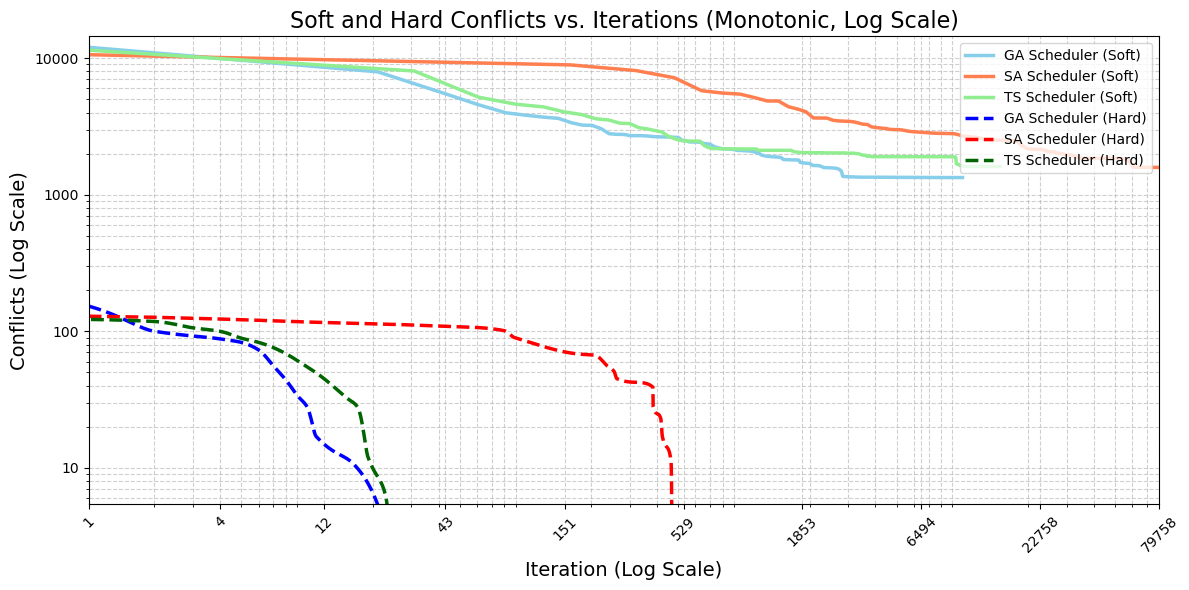

<text x='50' y='50' fill='red'>Error: Invalid input data.</text>


In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import PchipInterpolator

# --- Data Set 1 (GA) --- Soft Conflicts
iterationsGA = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 64, 65, 67, 70, 71, 73, 75, 77, 79, 81, 84, 89, 91, 95, 97, 103, 105, 110, 113, 115, 124, 128, 133, 143, 145, 149, 155, 163, 164, 166, 168, 169, 180, 194, 202, 206, 208, 217, 218, 219, 221, 222, 237, 240, 245, 263, 299, 300, 301, 358, 367, 510, 516, 542, 543, 544, 547, 638, 646, 690, 719, 722, 751, 775, 786, 926, 927, 997, 1006, 1053, 1187, 1200, 1332, 1474, 1516, 1677, 1788, 1790, 1825, 1841, 1944, 2000, 2019, 2033, 2050, 2052, 2192, 2344, 2423, 2611, 2792, 2835, 3064, 3179, 10013]
soft_conflictsGA = [12015, 12093, 10426, 9947, 14449, 9778, 9698, 9556, 10434, 9551, 9779, 9273, 9148, 9043, 8893, 8281, 8041, 8753, 8101, 7951, 7861, 7999, 7899, 7839, 7791, 7746, 7559, 7401, 7287, 7192, 7056, 6930, 6537, 6201, 5915, 5789, 5623, 5557, 5443, 5374, 5194, 5144, 5135, 5134, 4955, 4945, 4845, 4820, 4718, 4641, 4622, 4567, 4556, 4501, 4449, 4413, 4311, 4263, 4185, 4137, 4095, 4083, 4023, 3987, 3933, 3878, 3848, 3836, 3826, 3808, 3796, 3789, 3756, 3732, 3690, 3678, 3667, 3606, 3535, 3392, 3387, 3365, 3309, 3287, 3251, 3246, 3236, 3230, 3218, 3194, 3184, 3139, 3137, 3092, 3054, 3044, 2938, 2807, 2787, 2769, 2757, 2721, 2709, 2703, 2679, 2607, 2504, 2486, 2480, 2462, 2444, 2420, 2380, 2350, 2302, 2278, 2218, 2194, 2182, 2117, 2111, 2105, 2099, 2093, 1985, 1955, 1900, 1876, 1810, 1800, 1790, 1753, 1720, 1714, 1703, 1692, 1676, 1666, 1648, 1640, 1634, 1579, 1577, 1566, 1489, 1363, 1352, 1346, 1336]

# --- Data Set 2 (SA) --- Soft Conflicts
iterationsSA = [1, 4, 6, 7, 9, 14, 18, 24, 27, 39, 43, 47, 65, 66, 74, 80, 89, 90, 93, 102, 110, 112, 113, 126, 134, 152, 169, 178, 180, 182, 190, 195, 217, 231, 236, 262, 270, 274, 296, 301, 304, 318, 336, 347, 362, 372, 378, 383, 384, 395, 405, 416, 423, 432, 454, 455, 456, 459, 464, 469, 477, 483, 526, 530, 532, 552, 553, 555, 561, 581, 582, 590, 596, 611, 644, 682, 698, 716, 810, 830, 887, 959, 983, 1032, 1047, 1052, 1110, 1126, 1131, 1132, 1199, 1225, 1282, 1322, 1328, 1375, 1382, 1440, 1470, 1486, 1503, 1507, 1633, 1663, 1719, 1764, 1779, 1847, 2068, 2427, 2466, 2568, 2580, 2719, 3112, 3614, 3730, 3766, 3805, 3878, 3985, 4356, 4493, 4564, 4669, 4932, 5155, 5471, 5505, 5794, 6105, 6530, 7467, 9119, 9811, 10060, 10136, 10221, 12337, 12412, 13817, 14660, 17250, 17886, 17916, 17927, 18130, 18595, 18658, 18787, 19321, 19396, 20332, 21119, 22409, 23481, 23804, 24333, 24391, 24654, 26479, 26482, 28745, 29990, 31285, 34168, 35851, 45831, 51476, 55001, 55812, 56063, 58251, 58530, 58645, 58762, 58859, 58905, 59381, 60015, 60031, 61707, 79758]
soft_conflictsSA = [10600, 10486, 10474, 10516, 10751, 10649, 10571, 10501, 10406, 10021, 9978, 9893, 9898, 9997, 9889, 10082, 9621, 9586, 9349, 9325, 9163, 9188, 9163, 9138, 8927, 8922, 8927, 8380, 8378, 8237, 8135, 8063, 8069, 8003, 8361, 8337, 8295, 8223, 8217, 8205, 8133, 8115, 8055, 7947, 7887, 7870, 7762, 7864, 8045, 7973, 7943, 7915, 8239, 8206, 8042, 8032, 7581, 7245, 7311, 7289, 7253, 7145, 7031, 6943, 6895, 6681, 6586, 6506, 6195, 6189, 6134, 6074, 5920, 5854, 5774, 5766, 5754, 5634, 5538, 5508, 5478, 5454, 5418, 5370, 5330, 5320, 5212, 5068, 4969, 4947, 4915, 4867, 4855, 4849, 4738, 4726, 4660, 4998, 4974, 4681, 4675, 4433, 4402, 4391, 4356, 4235, 4229, 4211, 3650, 3639, 3597, 3498, 3483, 3472, 3434, 3268, 3267, 3179, 3157, 3124, 3112, 3064, 3053, 3023, 3008, 2997, 2993, 2953, 2947, 2903, 2885, 2863, 2821, 2797, 2722, 2698, 2692, 2686, 2565, 2535, 2519, 2513, 2491, 2469, 2447, 2414, 2391, 2294, 2282, 2276, 2231, 2209, 2161, 2150, 2144, 2142, 2109, 2092, 2078, 2067, 2056, 2051, 1996, 1965, 1954, 1866, 1856, 1850, 1844, 1830, 1829, 1807, 1763, 1737, 1722, 1710, 1704, 1692, 1680, 1656, 1602, 1591, 1585]

# --- Data Set 3 (TS) --- Soft Conflicts
iterationsTS = [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 36, 38, 39, 40, 41, 42, 46, 48, 49, 51, 52, 54, 55, 56, 59, 61, 62, 64, 65, 66, 67, 69, 73, 75, 77, 82, 85, 86, 87, 89, 91, 92, 93, 101, 119, 125, 127, 128, 130, 132, 135, 144, 146, 151, 152, 155, 159, 161, 163, 173, 186, 189, 192, 196, 201, 229, 244, 257, 258, 268, 280, 285, 294, 295, 306, 309, 311, 312, 315, 337, 344, 345, 351, 352, 372, 377, 384, 389, 397, 408, 417, 418, 423, 425, 441, 445, 459, 462, 500, 506, 510, 517, 519, 554, 607, 632, 633, 637, 649, 657, 659, 679, 722, 809, 817, 833, 838, 847, 919, 921, 935, 951, 957, 966, 1027, 1089, 1100, 1102, 1118, 1140, 1156, 1250, 1260, 1379, 1442, 1465, 1469, 1482, 1492, 1516, 1646, 1682, 1701, 1753, 1835, 1890, 1910, 1945, 1954, 2028, 2058, 2059, 2074, 2076, 2175, 2340, 2342, 2375, 2500, 2505, 2524, 2528, 2549, 2589, 2597, 2608, 2611, 2614, 2616, 2618, 2620, 2624, 2660, 2693, 2747, 2751, 2765, 2874, 2901, 2922, 2939, 2948, 2957, 2982, 3064, 3080, 3084, 3192, 3197, 3207, 3223, 3248, 3258, 3260, 3299, 3309, 3324, 3326, 3327, 3328, 3345, 3378, 3380, 3433, 3463, 3504, 3591, 3612, 3655, 3669, 3689, 3696, 3713, 3736, 3764, 3791, 3806, 3812, 3956, 3968, 3977, 4008, 4050, 4160, 4207, 4217, 4267, 4280, 4283, 4369, 4436, 4442, 4444, 4449, 4472, 4495, 4515, 4743, 4747, 4752, 4794, 4902, 4920, 5110, 5230, 5288, 5347, 5348, 5386, 5709, 5828, 5831, 5848, 5854, 6033, 6073, 6080, 6083, 6099, 6106, 6123, 6132, 6140, 6154, 6165, 6206, 6297, 6396, 6413, 6522, 6538, 6550, 6553, 6559, 6651, 6656, 6722, 6787, 6805, 6933, 6941, 6942, 6960, 7187, 7188, 7194, 7195, 7201, 7204, 7206, 7219, 7300, 7312, 7401, 7437, 7453, 7463, 7469, 7492, 7497, 7499, 7506, 7513, 7516, 7545, 7554, 7592, 7622, 7625, 7627, 7663, 7708, 7715, 7890, 8008, 8020, 8277, 8306, 8331, 8340, 8361, 8372, 8374, 8389, 8425, 8449, 8491, 8498, 8501, 8511, 8521, 8525, 8540, 8547, 8548, 8577, 8653, 8675, 8701, 8703, 8727, 8730, 8761, 8807, 8814, 8832, 8863, 8869, 8883, 8992, 9001, 9089, 9105, 9179, 9268, 9301, 9320, 9330, 9333, 9339, 9384, 9469, 9555, 9559, 9560, 9723, 9798, 9849, 9908, 10005, 10025, 10076, 10219, 10244, 10362, 10433, 10445, 10598, 10637, 10754, 10770, 10781, 10783, 10792, 10796, 10810, 10813, 10814, 10821, 10823, 10847, 10851, 10860, 10898, 10988, 11025, 11026, 11032, 11074, 11095, 11097, 11145, 11192, 11194, 11200, 11210, 11254, 11286, 11299, 11308, 11331, 11400, 11407, 11485, 11509, 11519, 11534, 11672, 11674, 11690, 11692, 11706, 11707, 11730, 11741, 11870, 12019, 12058, 12360, 12371, 12625, 12640, 12666, 12673, 12675, 12687, 12699, 12703, 12712, 12738, 12743, 12844, 12872, 12882, 12913, 12935, 13001, 13201, 13223, 13329, 13339, 13356, 13503, 13510, 13624, 13649, 13665, 13760, 13810, 13852, 13853, 13854, 13866, 13876, 13886, 13893, 13895, 13920, 13970, 14064, 14140, 14148, 14310, 14323, 14342, 14367, 14377, 14455, 14544, 14591, 14597, 14661, 14677, 14758, 14923]

# Data Set 1 GA hard
iterations1 = [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 16, 29, 31, 33, 37, 45, 50]
hard_conflicts1 = [153, 100, 88, 83, 73, 56, 44, 34, 28, 17, 11, 0, 0, 0, 0, 0, 0]

# Data Set 2 SA hard
iterations2 = [1, 4, 10, 27, 80, 89, 178, 207, 236, 254, 262, 383, 384, 416, 423, 464, 470, 480, 485, 490, 500]
hard_conflicts2 = [129, 123, 117, 112, 101, 90, 68, 67, 56, 51, 45, 39, 28, 23, 17, 11, 0, 0, 0, 0, 0, 0]

# Data Set 3 TS hard
iterations3 = [0, 2, 3, 4, 5, 6, 10, 15, 17, 19, 23, 25, 33, 37, 50]
hard_conflicts3 = [124, 118, 106, 100, 89, 83, 55, 33, 28, 12, 6, 0, 0, 0, 0]

def process_and_plot(iterations, conflicts, color, label, ax, linestyle='-'): # Added linestyle
    """Processes and plots the data, ensuring monotonicity."""

    # Sort the data
    sorted_data = sorted(zip(iterations, conflicts))
    iterations, conflicts = zip(*sorted_data)
    iterations = np.array(iterations)
    conflicts = np.array(conflicts)  # Use 'conflicts' (generic name)

    # Use PchipInterpolator for smooth, monotonic interpolation
    pchip = PchipInterpolator(iterations, conflicts)
    xnew = np.linspace(iterations.min(), iterations.max(), 500)
    y_smooth = pchip(xnew)

    # Enforce monotonicity and non-negativity
    for i in range(1, len(y_smooth)):
        y_smooth[i] = min(y_smooth[i - 1], y_smooth[i])
        y_smooth[i] = max(0, y_smooth[i])

    ax.plot(xnew, y_smooth, color=color, linewidth=2.5, label=label, linestyle=linestyle) # Use linestyle


def integer_log_ticks(min_val, max_val, num_ticks=10):
    """Generates integer tick positions for a log scale."""
    log_min = np.log10(min_val)
    log_max = np.log10(max_val)
    log_ticks = np.logspace(log_min, log_max, num_ticks)
    int_ticks = np.unique(np.round(log_ticks).astype(int))
    int_ticks = int_ticks[(int_ticks >= min_val) & (int_ticks <= max_val)]
    return int_ticks


# --- Create the plot ---
fig, ax = plt.subplots(figsize=(12, 6))

# --- Plot Soft Conflict Datasets ---
process_and_plot(iterationsGA, soft_conflictsGA, 'skyblue', "GA Scheduler (Soft)", ax)
process_and_plot(iterationsSA, soft_conflictsSA, 'coral', "SA Scheduler (Soft)", ax)
process_and_plot(iterationsTS, soft_conflictsTS, 'lightgreen', "TS Scheduler (Soft)", ax)

# --- Plot Hard Conflict Datasets ---
process_and_plot(iterations1, hard_conflicts1, 'blue', "GA Scheduler (Hard)", ax, linestyle='--') # Dashed
process_and_plot(iterations2, hard_conflicts2, 'red', "SA Scheduler (Hard)", ax, linestyle='--')    # Dashed
process_and_plot(iterations3, hard_conflicts3, 'darkgreen', "TS Scheduler (Hard)", ax, linestyle='--') # Dashed


# --- Find overall max iteration ---
max_iteration = max(max(iterationsGA), max(iterationsSA), max(iterationsTS),
                    max(iterations1), max(iterations2), max(iterations3))

# --- Logarithmic X and Y Axes, Integer Ticks, and set Axis Limits ---
ax.set_xscale('log')
ax.set_yscale('log')  # Add this line for log y-scale

tick_positions_x = integer_log_ticks(1, max_iteration)
ax.set_xticks(tick_positions_x)
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.tick_params(axis='x', rotation=45)
ax.set_xlim(1, max_iteration)

# Find the smallest *positive* y-value across all datasets
min_y_positive = min(
    min(y for y in soft_conflictsGA if y > 0),
    min(y for y in soft_conflictsSA if y > 0),
    min(y for y in soft_conflictsTS if y > 0),
    min(y for y in hard_conflicts1 if y > 0),
    min(y for y in hard_conflicts2 if y > 0),
    min(y for y in hard_conflicts3 if y > 0)
)
max_y_value = max(max(soft_conflictsGA), max(soft_conflictsSA), max(soft_conflictsTS),
                  max(hard_conflicts1), max(hard_conflicts2), max(hard_conflicts3)
                  )

ax.set_ylim(min_y_positive * 0.9, max(max_y_value, min_y_positive*1.1))  # Use min_y_positive and max

ax.get_yaxis().set_major_formatter(plt.ScalarFormatter())


# --- General Plot Styling ---
ax.set_title('Soft and Hard Conflicts vs. Iterations (Monotonic, Log Scale)', fontsize=16) # Updated title
ax.set_xlabel('Iteration (Log Scale)', fontsize=14)
ax.set_ylabel('Conflicts (Log Scale)', fontsize=14)  # More general y-label, and added Log Scale
ax.grid(True, which="both", ls="--", alpha=0.6)

ax.legend(fontsize=10, loc='upper right')  # Smaller font, specify location

plt.tight_layout()
plt.savefig('soft_and_hard_conflicts_combined_plot_loglog.png', bbox_inches='tight') # loglog scale
plt.show()



def generate_combined_svg(iterations_soft1, soft_conflicts1, iterations_soft2, soft_conflicts2, iterations_soft3, soft_conflicts3,
                          iterations_hard1, hard_conflicts1, iterations_hard2, hard_conflicts2, iterations_hard3, hard_conflicts3,
                          width=800, height=400, padding=50):
    """Generates an SVG plot of the combined data (soft and hard conflicts)."""
    try:
        import numpy as np
        from scipy.interpolate import PchipInterpolator

        def process_data(iterations, conflicts):
            """Processes data for SVG plotting, ensuring monotonicity."""
            if not iterations or not conflicts or len(iterations) != len(conflicts) or len(iterations) < 2:
                return None, None

            sorted_data = sorted(zip(iterations, conflicts))
            iterations, conflicts = zip(*sorted_data)
            iterations = np.array(iterations)
            conflicts = np.array(conflicts)

            pchip = PchipInterpolator(iterations, conflicts)
            xnew = np.linspace(iterations.min(), iterations.max(), 500)
            y_smooth = pchip(xnew)

            for i in range(1, len(y_smooth)):
                y_smooth[i] = min(y_smooth[i - 1], y_smooth[i])
                y_smooth[i] = max(0, y_smooth[i])

            return xnew, y_smooth

        # --- Process Data ---
        xnew_soft1, y_smooth_soft1 = process_data(iterations_soft1, soft_conflicts1)
        xnew_soft2, y_smooth_soft2 = process_data(iterations_soft2, soft_conflicts2)
        xnew_soft3, y_smooth_soft3 = process_data(iterations_soft3, soft_conflicts3)

        xnew_hard1, y_smooth_hard1 = process_data(iterations_hard1, hard_conflicts1)
        xnew_hard2, y_smooth_hard2 = process_data(iterations_hard2, hard_conflicts2)
        xnew_hard3, y_smooth_hard3 = process_data(iterations_hard3, hard_conflicts3)


        if (xnew_soft1 is None or xnew_soft2 is None or xnew_soft3 is None or
            xnew_hard1 is None or xnew_hard2 is None or xnew_hard3 is None):
           return "<text x='50' y='50' fill='red'>Error: Invalid input data.</text>"

        # Determine overall maximum iteration and maximum conflict for scaling
        max_iteration = max(max(iterations_soft1), max(iterations_soft2), max(iterations_soft3),
                            max(iterations_hard1), max(iterations_hard2), max(iterations_hard3))
        max_conflict = max(max(soft_conflicts1), max(soft_conflicts2), max(soft_conflicts3),
                           max(hard_conflicts1), max(hard_conflicts2), max(hard_conflicts3))

        # --- Start Building SVG ---
        svg_elements = []

        # Add Title and Axis Labels
        svg_elements.append(f"<text x='{width/2}' y='{padding/2}' text-anchor='middle' font-size='18'>Soft and Hard Conflicts vs. Iterations (Monotonic, Log Scale)</text>")
        svg_elements.append(f"<text x='{width/2}' y='{height - padding/4}' text-anchor='middle' font-size='14'>Iteration (Log Scale)</text>")
        svg_elements.append(f"<text x='{padding/4}' y='{height/2}' text-anchor='middle' font-size='14' transform='rotate(-90 {padding/4} {height/2})'>Conflicts (Log Scale)</text>")

        # --- Logarithmic X and Y Scale Conversion ---
        def log_scale(x):
            return np.log(max(x, 1e-10))  # Avoid log(0)
        
        def log_scale_y(y): # Added log_scale_y
            return np.log(max(y, 1e-10))

        min_log_x = log_scale(1)
        max_log_x = log_scale(max_iteration)
        
        # Find min_y_positive for log scale
        min_y_positive = min(
            min(y for y in soft_conflicts1 if y > 0),
            min(y for y in soft_conflicts2 if y > 0),
            min(y for y in soft_conflicts3 if y > 0),
            min(y for y in hard_conflicts1 if y > 0),
            min(y for y in hard_conflicts2 if y > 0),
            min(y for y in hard_conflicts3 if y > 0)
        )

        min_log_y = log_scale_y(min_y_positive) # Use min_y_positive
        max_log_y = log_scale_y(max_conflict)

        def get_x_coord(iteration):
            """Converts iteration to x-coordinate on log scale."""
            log_x = log_scale(iteration)
            x_scale = (width - 2 * padding) / (max_log_x - min_log_x)
            return padding + (log_x - min_log_x) * x_scale

        def get_y_coord(conflict):
            """Converts conflict value to y-coordinate on log scale."""
            log_y = log_scale_y(conflict)
            y_scale = (height - 2 * padding) / (max_log_y - min_log_y)
            return height - padding - (log_y - min_log_y) * y_scale

        # --- Plot Data (SVG Paths) ---
        def plot_path(xnew, y_smooth, stroke_color, stroke_width, stroke_dasharray="none"):
            path_d = "M "
            for i in range(len(xnew)):
                if xnew[i] >= 1:  # Still need to avoid log(0) on x-axis
                    x_coord = get_x_coord(xnew[i])
                    y_coord = get_y_coord(y_smooth[i])  # Use get_y_coord!
                    path_d += f"{x_coord},{y_coord} "
                    if i < len(xnew) - 1:
                        path_d += "L "
            return f"<path d='{path_d.strip()}' stroke='{stroke_color}' stroke-width='{stroke_width}' fill='none' stroke-dasharray='{stroke_dasharray}'/>"

        svg_elements.append(plot_path(xnew_soft1, y_smooth_soft1, 'skyblue', 2))
        svg_elements.append(plot_path(xnew_soft2, y_smooth_soft2, 'coral', 2))
        svg_elements.append(plot_path(xnew_soft3, y_smooth_soft3, 'lightgreen', 2))
        svg_elements.append(plot_path(xnew_hard1, y_smooth_hard1, 'blue', 2, stroke_dasharray="5,5"))  # Dashed
        svg_elements.append(plot_path(xnew_hard2, y_smooth_hard2, 'red', 2, stroke_dasharray="5,5"))    # Dashed
        svg_elements.append(plot_path(xnew_hard3, y_smooth_hard3, 'darkgreen', 2, stroke_dasharray="5,5"))  # Dashed


        # --- Legend ---
        legend_x = width - padding - 140
        legend_y = padding
        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y}' width='10' height='10' fill='skyblue'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 10}' font-size='10'>GA Scheduler (Soft)</text>")
        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y + 20}' width='10' height='10' fill='coral'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 30}' font-size='10'>SA Scheduler (Soft)</text>")
        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y + 40}' width='10' height='10' fill='lightgreen'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 50}' font-size='10'>TS Scheduler (Soft)</text>")

        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y + 60}' width='10' height='10' stroke='blue' fill='none' stroke-dasharray='5,5'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 70}' font-size='10'>GA Scheduler (Hard)</text>")
        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y + 80}' width='10' height='10' stroke='red' fill='none' stroke-dasharray='5,5'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 90}' font-size='10'>SA Scheduler (Hard)</text>")
        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y + 100}' width='10' height='10' stroke='darkgreen' fill='none' stroke-dasharray='5,5'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 110}' font-size='10'>TS Scheduler (Hard)</text>")

        # --- Axes ---
        svg_elements.append(f"<line x1='{padding}' y1='{height - padding}' x2='{width - padding}' y2='{height - padding}' stroke='black'/>")  # X-axis
        svg_elements.append(f"<line x1='{padding}' y1='{height - padding}' x2='{padding}' y2='{padding}' stroke='black'/>")  # Y-axis

        # --- Logarithmic X-axis Ticks (Integer) ---
        tick_positions = integer_log_ticks(1, max_iteration)
        for tick in tick_positions:
            x = get_x_coord(tick)
            y = height - padding
            svg_elements.append(f"<line x1='{x}' y1='{y}' x2='{x}' y2='{y + 5}' stroke='black'/>")  # Tick mark
            svg_elements.append(f"<text x='{x}' y='{y + 20}' text-anchor='middle' font-size='10' transform='rotate(-45 {x} {y+20})'>{tick}</text>")  # Tick label

        # --- Logarithmic Y-axis Ticks (Integer) ---
        def integer_log_ticks_y(min_val, max_val, num_ticks=7):  # Use a separate function
            """Generates integer tick positions for a log scale (y-axis)."""
            log_min = np.log10(max(min_val, 1e-10)) # prevent log domain error
            log_max = np.log10(max_val)
            log_ticks = np.logspace(log_min, log_max, num_ticks)
            int_ticks = np.unique(np.round(log_ticks).astype(int))
            int_ticks = int_ticks[(int_ticks >= min_val) & (int_ticks <= max_val)]
            return int_ticks

        y_tick_positions = integer_log_ticks_y(min_y_positive, max_conflict)  # Use min_y_positive
        for tick in y_tick_positions:
            x = padding
            y = get_y_coord(tick)  # Use get_y_coord!
            svg_elements.append(f"<line x1='{x}' y1='{y}' x2='{x - 5}' y2='{y}' stroke='black'/>")  # Tick mark
            svg_elements.append(f"<text x='{x - 10}' y='{y + 4}' text-anchor='end' font-size='10'>{tick}</text>")  # Tick label

        # --- Combine SVG Elements ---
        full_svg = f"<svg width='{width}' height='{height}'>{ ''.join(svg_elements) }</svg>"
        return full_svg

    except ImportError as e:
        return f"<text x='50' y='50' fill='red'>Error: Missing library: {e}.</text>"
    except Exception as e:
        return f"<text x='50' y='50' fill='red'>Error: {e}</text>"
# --- Generate SVG Output ---
svg_output = generate_combined_svg(iterationsGA, soft_conflictsGA, iterationsSA, soft_conflictsSA, iterationsTS, soft_conflictsTS,
                                  iterations1, hard_conflicts1, iterations2, hard_conflicts2, iterations3, hard_conflicts3)
print(svg_output) 

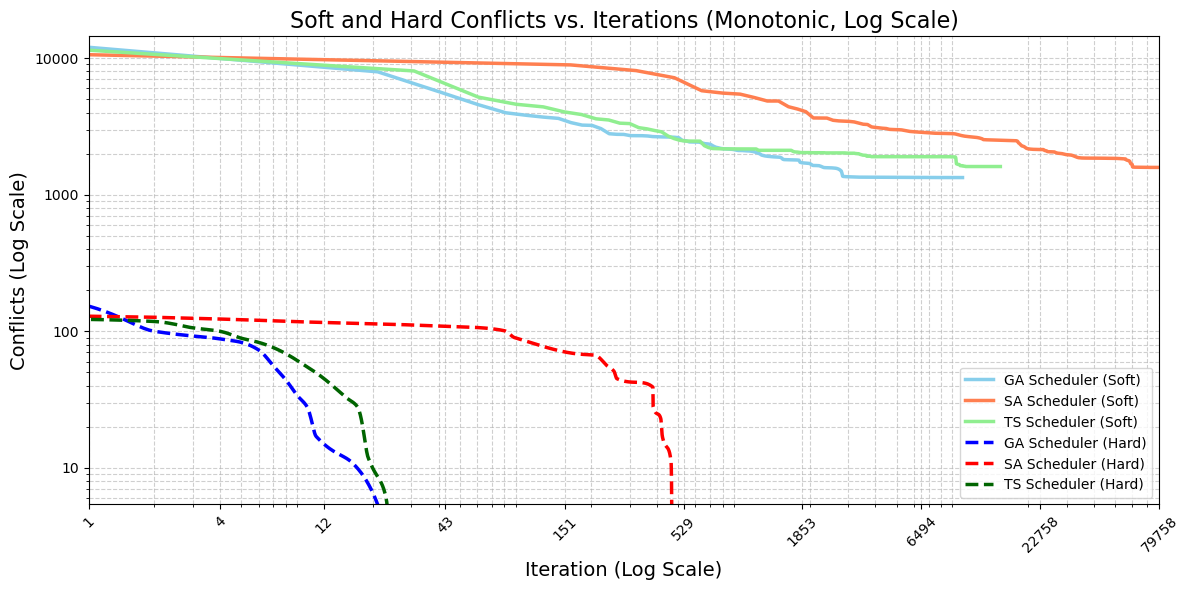

<text x='50' y='50' fill='red'>Error: Invalid input data.</text>


In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import PchipInterpolator

# --- Data Set 1 (GA) --- Soft Conflicts
iterationsGA = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 64, 65, 67, 70, 71, 73, 75, 77, 79, 81, 84, 89, 91, 95, 97, 103, 105, 110, 113, 115, 124, 128, 133, 143, 145, 149, 155, 163, 164, 166, 168, 169, 180, 194, 202, 206, 208, 217, 218, 219, 221, 222, 237, 240, 245, 263, 299, 300, 301, 358, 367, 510, 516, 542, 543, 544, 547, 638, 646, 690, 719, 722, 751, 775, 786, 926, 927, 997, 1006, 1053, 1187, 1200, 1332, 1474, 1516, 1677, 1788, 1790, 1825, 1841, 1944, 2000, 2019, 2033, 2050, 2052, 2192, 2344, 2423, 2611, 2792, 2835, 3064, 3179, 10013]
soft_conflictsGA = [12015, 12093, 10426, 9947, 14449, 9778, 9698, 9556, 10434, 9551, 9779, 9273, 9148, 9043, 8893, 8281, 8041, 8753, 8101, 7951, 7861, 7999, 7899, 7839, 7791, 7746, 7559, 7401, 7287, 7192, 7056, 6930, 6537, 6201, 5915, 5789, 5623, 5557, 5443, 5374, 5194, 5144, 5135, 5134, 4955, 4945, 4845, 4820, 4718, 4641, 4622, 4567, 4556, 4501, 4449, 4413, 4311, 4263, 4185, 4137, 4095, 4083, 4023, 3987, 3933, 3878, 3848, 3836, 3826, 3808, 3796, 3789, 3756, 3732, 3690, 3678, 3667, 3606, 3535, 3392, 3387, 3365, 3309, 3287, 3251, 3246, 3236, 3230, 3218, 3194, 3184, 3139, 3137, 3092, 3054, 3044, 2938, 2807, 2787, 2769, 2757, 2721, 2709, 2703, 2679, 2607, 2504, 2486, 2480, 2462, 2444, 2420, 2380, 2350, 2302, 2278, 2218, 2194, 2182, 2117, 2111, 2105, 2099, 2093, 1985, 1955, 1900, 1876, 1810, 1800, 1790, 1753, 1720, 1714, 1703, 1692, 1676, 1666, 1648, 1640, 1634, 1579, 1577, 1566, 1489, 1363, 1352, 1346, 1336]

# --- Data Set 2 (SA) --- Soft Conflicts
iterationsSA = [1, 4, 6, 7, 9, 14, 18, 24, 27, 39, 43, 47, 65, 66, 74, 80, 89, 90, 93, 102, 110, 112, 113, 126, 134, 152, 169, 178, 180, 182, 190, 195, 217, 231, 236, 262, 270, 274, 296, 301, 304, 318, 336, 347, 362, 372, 378, 383, 384, 395, 405, 416, 423, 432, 454, 455, 456, 459, 464, 469, 477, 483, 526, 530, 532, 552, 553, 555, 561, 581, 582, 590, 596, 611, 644, 682, 698, 716, 810, 830, 887, 959, 983, 1032, 1047, 1052, 1110, 1126, 1131, 1132, 1199, 1225, 1282, 1322, 1328, 1375, 1382, 1440, 1470, 1486, 1503, 1507, 1633, 1663, 1719, 1764, 1779, 1847, 2068, 2427, 2466, 2568, 2580, 2719, 3112, 3614, 3730, 3766, 3805, 3878, 3985, 4356, 4493, 4564, 4669, 4932, 5155, 5471, 5505, 5794, 6105, 6530, 7467, 9119, 9811, 10060, 10136, 10221, 12337, 12412, 13817, 14660, 17250, 17886, 17916, 17927, 18130, 18595, 18658, 18787, 19321, 19396, 20332, 21119, 22409, 23481, 23804, 24333, 24391, 24654, 26479, 26482, 28745, 29990, 31285, 34168, 35851, 45831, 51476, 55001, 55812, 56063, 58251, 58530, 58645, 58762, 58859, 58905, 59381, 60015, 60031, 61707, 79758]
soft_conflictsSA = [10600, 10486, 10474, 10516, 10751, 10649, 10571, 10501, 10406, 10021, 9978, 9893, 9898, 9997, 9889, 10082, 9621, 9586, 9349, 9325, 9163, 9188, 9163, 9138, 8927, 8922, 8927, 8380, 8378, 8237, 8135, 8063, 8069, 8003, 8361, 8337, 8295, 8223, 8217, 8205, 8133, 8115, 8055, 7947, 7887, 7870, 7762, 7864, 8045, 7973, 7943, 7915, 8239, 8206, 8042, 8032, 7581, 7245, 7311, 7289, 7253, 7145, 7031, 6943, 6895, 6681, 6586, 6506, 6195, 6189, 6134, 6074, 5920, 5854, 5774, 5766, 5754, 5634, 5538, 5508, 5478, 5454, 5418, 5370, 5330, 5320, 5212, 5068, 4969, 4947, 4915, 4867, 4855, 4849, 4738, 4726, 4660, 4998, 4974, 4681, 4675, 4433, 4402, 4391, 4356, 4235, 4229, 4211, 3650, 3639, 3597, 3498, 3483, 3472, 3434, 3268, 3267, 3179, 3157, 3124, 3112, 3064, 3053, 3023, 3008, 2997, 2993, 2953, 2947, 2903, 2885, 2863, 2821, 2797, 2722, 2698, 2692, 2686, 2565, 2535, 2519, 2513, 2491, 2469, 2447, 2414, 2391, 2294, 2282, 2276, 2231, 2209, 2161, 2150, 2144, 2142, 2109, 2092, 2078, 2067, 2056, 2051, 1996, 1965, 1954, 1866, 1856, 1850, 1844, 1830, 1829, 1807, 1763, 1737, 1722, 1710, 1704, 1692, 1680, 1656, 1602, 1591, 1585]

# --- Data Set 3 (TS) --- Soft Conflicts
iterationsTS = [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 36, 38, 39, 40, 41, 42, 46, 48, 49, 51, 52, 54, 55, 56, 59, 61, 62, 64, 65, 66, 67, 69, 73, 75, 77, 82, 85, 86, 87, 89, 91, 92, 93, 101, 119, 125, 127, 128, 130, 132, 135, 144, 146, 151, 152, 155, 159, 161, 163, 173, 186, 189, 192, 196, 201, 229, 244, 257, 258, 268, 280, 285, 294, 295, 306, 309, 311, 312, 315, 337, 344, 345, 351, 352, 372, 377, 384, 389, 397, 408, 417, 418, 423, 425, 441, 445, 459, 462, 500, 506, 510, 517, 519, 554, 607, 632, 633, 637, 649, 657, 659, 679, 722, 809, 817, 833, 838, 847, 919, 921, 935, 951, 957, 966, 1027, 1089, 1100, 1102, 1118, 1140, 1156, 1250, 1260, 1379, 1442, 1465, 1469, 1482, 1492, 1516, 1646, 1682, 1701, 1753, 1835, 1890, 1910, 1945, 1954, 2028, 2058, 2059, 2074, 2076, 2175, 2340, 2342, 2375, 2500, 2505, 2524, 2528, 2549, 2589, 2597, 2608, 2611, 2614, 2616, 2618, 2620, 2624, 2660, 2693, 2747, 2751, 2765, 2874, 2901, 2922, 2939, 2948, 2957, 2982, 3064, 3080, 3084, 3192, 3197, 3207, 3223, 3248, 3258, 3260, 3299, 3309, 3324, 3326, 3327, 3328, 3345, 3378, 3380, 3433, 3463, 3504, 3591, 3612, 3655, 3669, 3689, 3696, 3713, 3736, 3764, 3791, 3806, 3812, 3956, 3968, 3977, 4008, 4050, 4160, 4207, 4217, 4267, 4280, 4283, 4369, 4436, 4442, 4444, 4449, 4472, 4495, 4515, 4743, 4747, 4752, 4794, 4902, 4920, 5110, 5230, 5288, 5347, 5348, 5386, 5709, 5828, 5831, 5848, 5854, 6033, 6073, 6080, 6083, 6099, 6106, 6123, 6132, 6140, 6154, 6165, 6206, 6297, 6396, 6413, 6522, 6538, 6550, 6553, 6559, 6651, 6656, 6722, 6787, 6805, 6933, 6941, 6942, 6960, 7187, 7188, 7194, 7195, 7201, 7204, 7206, 7219, 7300, 7312, 7401, 7437, 7453, 7463, 7469, 7492, 7497, 7499, 7506, 7513, 7516, 7545, 7554, 7592, 7622, 7625, 7627, 7663, 7708, 7715, 7890, 8008, 8020, 8277, 8306, 8331, 8340, 8361, 8372, 8374, 8389, 8425, 8449, 8491, 8498, 8501, 8511, 8521, 8525, 8540, 8547, 8548, 8577, 8653, 8675, 8701, 8703, 8727, 8730, 8761, 8807, 8814, 8832, 8863, 8869, 8883, 8992, 9001, 9089, 9105, 9179, 9268, 9301, 9320, 9330, 9333, 9339, 9384, 9469, 9555, 9559, 9560, 9723, 9798, 9849, 9908, 10005, 10025, 10076, 10219, 10244, 10362, 10433, 10445, 10598, 10637, 10754, 10770, 10781, 10783, 10792, 10796, 10810, 10813, 10814, 10821, 10823, 10847, 10851, 10860, 10898, 10988, 11025, 11026, 11032, 11074, 11095, 11097, 11145, 11192, 11194, 11200, 11210, 11254, 11286, 11299, 11308, 11331, 11400, 11407, 11485, 11509, 11519, 11534, 11672, 11674, 11690, 11692, 11706, 11707, 11730, 11741, 11870, 12019, 12058, 12360, 12371, 12625, 12640, 12666, 12673, 12675, 12687, 12699, 12703, 12712, 12738, 12743, 12844, 12872, 12882, 12913, 12935, 13001, 13201, 13223, 13329, 13339, 13356, 13503, 13510, 13624, 13649, 13665, 13760, 13810, 13852, 13853, 13854, 13866, 13876, 13886, 13893, 13895, 13920, 13970, 14064, 14140, 14148, 14310, 14323, 14342, 14367, 14377, 14455, 14544, 14591, 14597, 14661, 14677, 14758, 14923]

# Data Set 1 GA hard
iterations1 = [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 16, 29, 31, 33, 37, 45, 50]
hard_conflicts1 = [153, 100, 88, 83, 73, 56, 44, 34, 28, 17, 11, 0, 0, 0, 0, 0, 0]

# Data Set 2 SA hard
iterations2 = [1, 4, 10, 27, 80, 89, 178, 207, 236, 254, 262, 383, 384, 416, 423, 464, 470, 480, 485, 490, 500]
hard_conflicts2 = [129, 123, 117, 112, 101, 90, 68, 67, 56, 51, 45, 39, 28, 23, 17, 11, 0, 0, 0, 0, 0, 0]

# Data Set 3 TS hard
iterations3 = [0, 2, 3, 4, 5, 6, 10, 15, 17, 19, 23, 25, 33, 37, 50]
hard_conflicts3 = [124, 118, 106, 100, 89, 83, 55, 33, 28, 12, 6, 0, 0, 0, 0]


def process_and_plot(iterations, conflicts, color, label, ax, linestyle='-'):
    """Processes and plots the data, ensuring monotonicity."""
    sorted_data = sorted(zip(iterations, conflicts))
    iterations, conflicts = zip(*sorted_data)
    iterations = np.array(iterations)
    conflicts = np.array(conflicts)

    pchip = PchipInterpolator(iterations, conflicts)
    xnew = np.linspace(iterations.min(), iterations.max(), 500)
    y_smooth = pchip(xnew)

    for i in range(1, len(y_smooth)):
        y_smooth[i] = min(y_smooth[i - 1], y_smooth[i])
        y_smooth[i] = max(0, y_smooth[i])

    ax.plot(xnew, y_smooth, color=color, linewidth=2.5, label=label, linestyle=linestyle)


def integer_log_ticks(min_val, max_val, num_ticks=10):
    """Generates integer tick positions for a log scale."""
    log_min = np.log10(min_val)
    log_max = np.log10(max_val)
    log_ticks = np.logspace(log_min, log_max, num_ticks)
    int_ticks = np.unique(np.round(log_ticks).astype(int))
    int_ticks = int_ticks[(int_ticks >= min_val) & (int_ticks <= max_val)]
    return int_ticks


# --- Create the plot ---
fig, ax = plt.subplots(figsize=(12, 6))

# --- Plot Soft Conflict Datasets ---
process_and_plot(iterationsGA, soft_conflictsGA, 'skyblue', "GA Scheduler (Soft)", ax)
process_and_plot(iterationsSA, soft_conflictsSA, 'coral', "SA Scheduler (Soft)", ax)
process_and_plot(iterationsTS, soft_conflictsTS, 'lightgreen', "TS Scheduler (Soft)", ax)

# --- Plot Hard Conflict Datasets ---
process_and_plot(iterations1, hard_conflicts1, 'blue', "GA Scheduler (Hard)", ax, linestyle='--')
process_and_plot(iterations2, hard_conflicts2, 'red', "SA Scheduler (Hard)", ax, linestyle='--')
process_and_plot(iterations3, hard_conflicts3, 'darkgreen', "TS Scheduler (Hard)", ax, linestyle='--')


# --- Find overall max iteration ---
max_iteration = max(max(iterationsGA), max(iterationsSA), max(iterationsTS),
                    max(iterations1), max(iterations2), max(iterations3))

# --- Logarithmic X and Y Axes, Integer Ticks, and set Axis Limits ---
ax.set_xscale('log')
ax.set_yscale('log')

tick_positions_x = integer_log_ticks(1, max_iteration)
ax.set_xticks(tick_positions_x)
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.tick_params(axis='x', rotation=45)
ax.set_xlim(1, max_iteration)

min_y_positive = min(
    min(y for y in soft_conflictsGA if y > 0),
    min(y for y in soft_conflictsSA if y > 0),
    min(y for y in soft_conflictsTS if y > 0),
    min(y for y in hard_conflicts1 if y > 0),
    min(y for y in hard_conflicts2 if y > 0),
    min(y for y in hard_conflicts3 if y > 0)
)
max_y_value = max(max(soft_conflictsGA), max(soft_conflictsSA), max(soft_conflictsTS),
                  max(hard_conflicts1), max(hard_conflicts2), max(hard_conflicts3)
                  )

ax.set_ylim(min_y_positive * 0.9, max(max_y_value, min_y_positive * 1.1))
ax.get_yaxis().set_major_formatter(plt.ScalarFormatter())

# --- General Plot Styling ---
ax.set_title('Soft and Hard Conflicts vs. Iterations (Monotonic, Log Scale)', fontsize=16)
ax.set_xlabel('Iteration (Log Scale)', fontsize=14)
ax.set_ylabel('Conflicts (Log Scale)', fontsize=14)
ax.grid(True, which="both", ls="--", alpha=0.6)

# --- Legend Placement (Lower Right) ---
ax.legend(fontsize=10, loc='lower right')  # Change loc to 'lower right'

plt.tight_layout()
plt.savefig('soft_and_hard_conflicts_combined_plot_loglog_legend_lr.png', bbox_inches='tight')
plt.show()



def generate_combined_svg(iterations_soft1, soft_conflicts1, iterations_soft2, soft_conflicts2, iterations_soft3, soft_conflicts3,
                          iterations_hard1, hard_conflicts1, iterations_hard2, hard_conflicts2, iterations_hard3, hard_conflicts3,
                          width=800, height=400, padding=50):
    """Generates an SVG plot of the combined data (soft and hard conflicts)."""
    try:
        import numpy as np
        from scipy.interpolate import PchipInterpolator

        def process_data(iterations, conflicts):
            """Processes data for SVG plotting, ensuring monotonicity."""
            if not iterations or not conflicts or len(iterations) != len(conflicts) or len(iterations) < 2:
                return None, None

            sorted_data = sorted(zip(iterations, conflicts))
            iterations, conflicts = zip(*sorted_data)
            iterations = np.array(iterations)
            conflicts = np.array(conflicts)

            pchip = PchipInterpolator(iterations, conflicts)
            xnew = np.linspace(iterations.min(), iterations.max(), 500)
            y_smooth = pchip(xnew)

            for i in range(1, len(y_smooth)):
                y_smooth[i] = min(y_smooth[i - 1], y_smooth[i])
                y_smooth[i] = max(0, y_smooth[i])

            return xnew, y_smooth

        # --- Process Data ---
        xnew_soft1, y_smooth_soft1 = process_data(iterations_soft1, soft_conflicts1)
        xnew_soft2, y_smooth_soft2 = process_data(iterations_soft2, soft_conflicts2)
        xnew_soft3, y_smooth_soft3 = process_data(iterations_soft3, soft_conflicts3)
        xnew_hard1, y_smooth_hard1 = process_data(iterations_hard1, hard_conflicts1)
        xnew_hard2, y_smooth_hard2 = process_data(iterations_hard2, hard_conflicts2)
        xnew_hard3, y_smooth_hard3 = process_data(iterations_hard3, hard_conflicts3)

        if (xnew_soft1 is None or xnew_soft2 is None or xnew_soft3 is None or
            xnew_hard1 is None or xnew_hard2 is None or xnew_hard3 is None):
           return "<text x='50' y='50' fill='red'>Error: Invalid input data.</text>"

        max_iteration = max(max(iterations_soft1), max(iterations_soft2), max(iterations_soft3),
                            max(iterations_hard1), max(iterations_hard2), max(iterations_hard3))
        max_conflict = max(max(soft_conflicts1), max(soft_conflicts2), max(soft_conflicts3),
                           max(hard_conflicts1), max(hard_conflicts2), max(hard_conflicts3))

        svg_elements = []

        svg_elements.append(f"<text x='{width/2}' y='{padding/2}' text-anchor='middle' font-size='18'>Soft and Hard Conflicts vs. Iterations (Monotonic, Log Scale)</text>")
        svg_elements.append(f"<text x='{width/2}' y='{height - padding/4}' text-anchor='middle' font-size='14'>Iteration (Log Scale)</text>")
        svg_elements.append(f"<text x='{padding/4}' y='{height/2}' text-anchor='middle' font-size='14' transform='rotate(-90 {padding/4} {height/2})'>Conflicts (Log Scale)</text>")

        def log_scale(x):  return np.log(max(x, 1e-10))
        def log_scale_y(y): return np.log(max(y, 1e-10))

        min_log_x = log_scale(1)
        max_log_x = log_scale(max_iteration)
        min_y_positive = min(
            min(y for y in soft_conflicts1 if y > 0),
            min(y for y in soft_conflicts2 if y > 0),
            min(y for y in soft_conflicts3 if y > 0),
            min(y for y in hard_conflicts1 if y > 0),
            min(y for y in hard_conflicts2 if y > 0),
            min(y for y in hard_conflicts3 if y > 0)
        )
        min_log_y = log_scale_y(min_y_positive)
        max_log_y = log_scale_y(max_conflict)

        def get_x_coord(iteration):
            log_x = log_scale(iteration)
            x_scale = (width - 2 * padding) / (max_log_x - min_log_x)
            return padding + (log_x - min_log_x) * x_scale

        def get_y_coord(conflict):
            log_y = log_scale_y(conflict)
            y_scale = (height - 2 * padding) / (max_log_y - min_log_y)
            return height - padding - (log_y - min_log_y) * y_scale

        def plot_path(xnew, y_smooth, stroke_color, stroke_width, stroke_dasharray="none"):
            path_d = "M "
            for i in range(len(xnew)):
                if xnew[i] >= 1:
                    x_coord = get_x_coord(xnew[i])
                    y_coord = get_y_coord(y_smooth[i])
                    path_d += f"{x_coord},{y_coord} "
                    if i < len(xnew) - 1:
                        path_d += "L "
            return f"<path d='{path_d.strip()}' stroke='{stroke_color}' stroke-width='{stroke_width}' fill='none' stroke-dasharray='{stroke_dasharray}'/>"

        svg_elements.append(plot_path(xnew_soft1, y_smooth_soft1, 'skyblue', 2))
        svg_elements.append(plot_path(xnew_soft2, y_smooth_soft2, 'coral', 2))
        svg_elements.append(plot_path(xnew_soft3, y_smooth_soft3, 'lightgreen', 2))
        svg_elements.append(plot_path(xnew_hard1, y_smooth_hard1, 'blue', 2, stroke_dasharray="5,5"))
        svg_elements.append(plot_path(xnew_hard2, y_smooth_hard2, 'red', 2, stroke_dasharray="5,5"))
        svg_elements.append(plot_path(xnew_hard3, y_smooth_hard3, 'darkgreen', 2, stroke_dasharray="5,5"))


        # --- Legend (Bottom Right) ---
        legend_x = width - padding - 160  # Adjust x for more space
        legend_y = height - padding - 120 # Start lower, adjust based on number of entries

        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y}' width='10' height='10' fill='skyblue'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 10}' font-size='10'>GA Scheduler (Soft)</text>")
        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y + 20}' width='10' height='10' fill='coral'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 30}' font-size='10'>SA Scheduler (Soft)</text>")
        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y + 40}' width='10' height='10' fill='lightgreen'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 50}' font-size='10'>TS Scheduler (Soft)</text>")
        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y + 60}' width='10' height='10' stroke='blue' fill='none' stroke-dasharray='5,5'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 70}' font-size='10'>GA Scheduler (Hard)</text>")
        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y + 80}' width='10' height='10' stroke='red' fill='none' stroke-dasharray='5,5'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 90}' font-size='10'>SA Scheduler (Hard)</text>")
        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y + 100}' width='10' height='10' stroke='darkgreen' fill='none' stroke-dasharray='5,5'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 110}' font-size='10'>TS Scheduler (Hard)</text>")


        svg_elements.append(f"<line x1='{padding}' y1='{height - padding}' x2='{width - padding}' y2='{height - padding}' stroke='black'/>")
        svg_elements.append(f"<line x1='{padding}' y1='{height - padding}' x2='{padding}' y2='{padding}' stroke='black'/>")

        tick_positions = integer_log_ticks(1, max_iteration)
        for tick in tick_positions:
            x = get_x_coord(tick)
            y = height - padding
            svg_elements.append(f"<line x1='{x}' y1='{y}' x2='{x}' y2='{y + 5}' stroke='black'/>")
            svg_elements.append(f"<text x='{x}' y='{y + 20}' text-anchor='middle' font-size='10' transform='rotate(-45 {x} {y+20})'>{tick}</text>")

        def integer_log_ticks_y(min_val, max_val, num_ticks=7):
            log_min = np.log10(max(min_val, 1e-10))
            log_max = np.log10(max_val)
            log_ticks = np.logspace(log_min, log_max, num_ticks)
            int_ticks = np.unique(np.round(log_ticks).astype(int))
            int_ticks = int_ticks[(int_ticks >= min_val) & (int_ticks <= max_val)]
            return int_ticks

        y_tick_positions = integer_log_ticks_y(min_y_positive, max_conflict)
        for tick in y_tick_positions:
            x = padding
            y = get_y_coord(tick)
            svg_elements.append(f"<line x1='{x}' y1='{y}' x2='{x - 5}' y2='{y}' stroke='black'/>")
            svg_elements.append(f"<text x='{x - 10}' y='{y + 4}' text-anchor='end' font-size='10'>{tick}</text>")

        full_svg = f"<svg width='{width}' height='{height}'>{ ''.join(svg_elements) }</svg>"
        return full_svg

    except ImportError as e:
        return f"<text x='50' y='50' fill='red'>Error: Missing library: {e}.</text>"
    except Exception as e:
        return f"<text x='50' y='50' fill='red'>Error: {e}</text>"

svg_output = generate_combined_svg(iterationsGA, soft_conflictsGA, iterationsSA, soft_conflictsSA, iterationsTS, soft_conflictsTS,
                                  iterations1, hard_conflicts1, iterations2, hard_conflicts2, iterations3, hard_conflicts3)
print(svg_output)

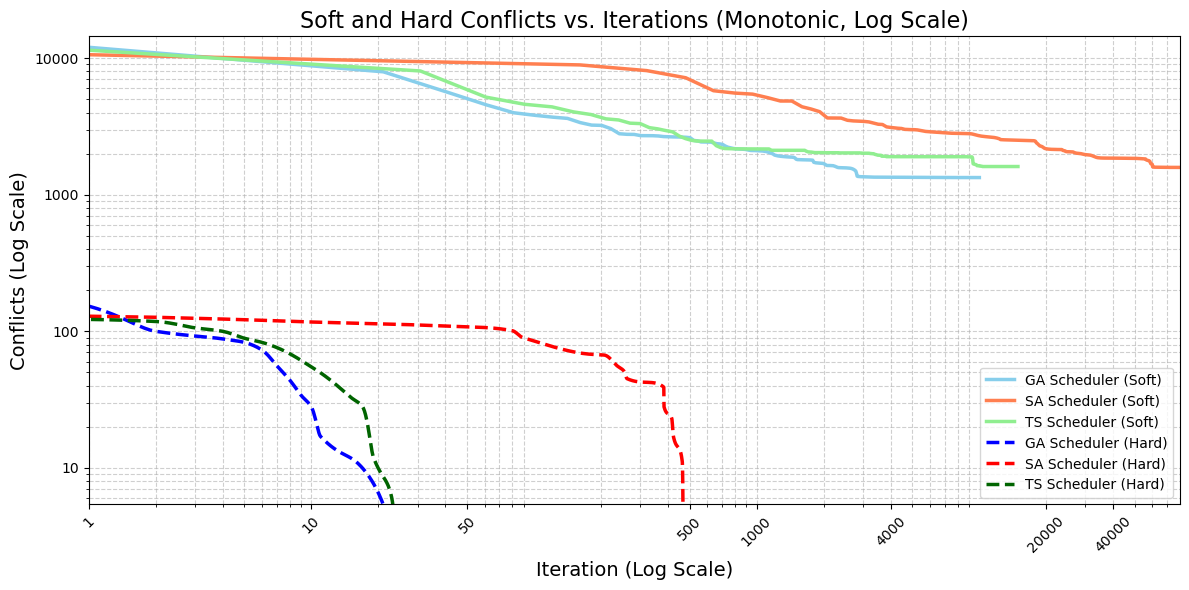

<text x='50' y='50' fill='red'>Error: Invalid input data.</text>


In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import PchipInterpolator

# --- Data Set 1 (GA) --- Soft Conflicts
iterationsGA = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 64, 65, 67, 70, 71, 73, 75, 77, 79, 81, 84, 89, 91, 95, 97, 103, 105, 110, 113, 115, 124, 128, 133, 143, 145, 149, 155, 163, 164, 166, 168, 169, 180, 194, 202, 206, 208, 217, 218, 219, 221, 222, 237, 240, 245, 263, 299, 300, 301, 358, 367, 510, 516, 542, 543, 544, 547, 638, 646, 690, 719, 722, 751, 775, 786, 926, 927, 997, 1006, 1053, 1187, 1200, 1332, 1474, 1516, 1677, 1788, 1790, 1825, 1841, 1944, 2000, 2019, 2033, 2050, 2052, 2192, 2344, 2423, 2611, 2792, 2835, 3064, 3179, 10013]
soft_conflictsGA = [12015, 12093, 10426, 9947, 14449, 9778, 9698, 9556, 10434, 9551, 9779, 9273, 9148, 9043, 8893, 8281, 8041, 8753, 8101, 7951, 7861, 7999, 7899, 7839, 7791, 7746, 7559, 7401, 7287, 7192, 7056, 6930, 6537, 6201, 5915, 5789, 5623, 5557, 5443, 5374, 5194, 5144, 5135, 5134, 4955, 4945, 4845, 4820, 4718, 4641, 4622, 4567, 4556, 4501, 4449, 4413, 4311, 4263, 4185, 4137, 4095, 4083, 4023, 3987, 3933, 3878, 3848, 3836, 3826, 3808, 3796, 3789, 3756, 3732, 3690, 3678, 3667, 3606, 3535, 3392, 3387, 3365, 3309, 3287, 3251, 3246, 3236, 3230, 3218, 3194, 3184, 3139, 3137, 3092, 3054, 3044, 2938, 2807, 2787, 2769, 2757, 2721, 2709, 2703, 2679, 2607, 2504, 2486, 2480, 2462, 2444, 2420, 2380, 2350, 2302, 2278, 2218, 2194, 2182, 2117, 2111, 2105, 2099, 2093, 1985, 1955, 1900, 1876, 1810, 1800, 1790, 1753, 1720, 1714, 1703, 1692, 1676, 1666, 1648, 1640, 1634, 1579, 1577, 1566, 1489, 1363, 1352, 1346, 1336]

# --- Data Set 2 (SA) --- Soft Conflicts
iterationsSA = [1, 4, 6, 7, 9, 14, 18, 24, 27, 39, 43, 47, 65, 66, 74, 80, 89, 90, 93, 102, 110, 112, 113, 126, 134, 152, 169, 178, 180, 182, 190, 195, 217, 231, 236, 262, 270, 274, 296, 301, 304, 318, 336, 347, 362, 372, 378, 383, 384, 395, 405, 416, 423, 432, 454, 455, 456, 459, 464, 469, 477, 483, 526, 530, 532, 552, 553, 555, 561, 581, 582, 590, 596, 611, 644, 682, 698, 716, 810, 830, 887, 959, 983, 1032, 1047, 1052, 1110, 1126, 1131, 1132, 1199, 1225, 1282, 1322, 1328, 1375, 1382, 1440, 1470, 1486, 1503, 1507, 1633, 1663, 1719, 1764, 1779, 1847, 2068, 2427, 2466, 2568, 2580, 2719, 3112, 3614, 3730, 3766, 3805, 3878, 3985, 4356, 4493, 4564, 4669, 4932, 5155, 5471, 5505, 5794, 6105, 6530, 7467, 9119, 9811, 10060, 10136, 10221, 12337, 12412, 13817, 14660, 17250, 17886, 17916, 17927, 18130, 18595, 18658, 18787, 19321, 19396, 20332, 21119, 22409, 23481, 23804, 24333, 24391, 24654, 26479, 26482, 28745, 29990, 31285, 34168, 35851, 45831, 51476, 55001, 55812, 56063, 58251, 58530, 58645, 58762, 58859, 58905, 59381, 60015, 60031, 61707, 79758]
soft_conflictsSA = [10600, 10486, 10474, 10516, 10751, 10649, 10571, 10501, 10406, 10021, 9978, 9893, 9898, 9997, 9889, 10082, 9621, 9586, 9349, 9325, 9163, 9188, 9163, 9138, 8927, 8922, 8927, 8380, 8378, 8237, 8135, 8063, 8069, 8003, 8361, 8337, 8295, 8223, 8217, 8205, 8133, 8115, 8055, 7947, 7887, 7870, 7762, 7864, 8045, 7973, 7943, 7915, 8239, 8206, 8042, 8032, 7581, 7245, 7311, 7289, 7253, 7145, 7031, 6943, 6895, 6681, 6586, 6506, 6195, 6189, 6134, 6074, 5920, 5854, 5774, 5766, 5754, 5634, 5538, 5508, 5478, 5454, 5418, 5370, 5330, 5320, 5212, 5068, 4969, 4947, 4915, 4867, 4855, 4849, 4738, 4726, 4660, 4998, 4974, 4681, 4675, 4433, 4402, 4391, 4356, 4235, 4229, 4211, 3650, 3639, 3597, 3498, 3483, 3472, 3434, 3268, 3267, 3179, 3157, 3124, 3112, 3064, 3053, 3023, 3008, 2997, 2993, 2953, 2947, 2903, 2885, 2863, 2821, 2797, 2722, 2698, 2692, 2686, 2565, 2535, 2519, 2513, 2491, 2469, 2447, 2414, 2391, 2294, 2282, 2276, 2231, 2209, 2161, 2150, 2144, 2142, 2109, 2092, 2078, 2067, 2056, 2051, 1996, 1965, 1954, 1866, 1856, 1850, 1844, 1830, 1829, 1807, 1763, 1737, 1722, 1710, 1704, 1692, 1680, 1656, 1602, 1591, 1585]

# --- Data Set 3 (TS) --- Soft Conflicts
iterationsTS = [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 36, 38, 39, 40, 41, 42, 46, 48, 49, 51, 52, 54, 55, 56, 59, 61, 62, 64, 65, 66, 67, 69, 73, 75, 77, 82, 85, 86, 87, 89, 91, 92, 93, 101, 119, 125, 127, 128, 130, 132, 135, 144, 146, 151, 152, 155, 159, 161, 163, 173, 186, 189, 192, 196, 201, 229, 244, 257, 258, 268, 280, 285, 294, 295, 306, 309, 311, 312, 315, 337, 344, 345, 351, 352, 372, 377, 384, 389, 397, 408, 417, 418, 423, 425, 441, 445, 459, 462, 500, 506, 510, 517, 519, 554, 607, 632, 633, 637, 649, 657, 659, 679, 722, 809, 817, 833, 838, 847, 919, 921, 935, 951, 957, 966, 1027, 1089, 1100, 1102, 1118, 1140, 1156, 1250, 1260, 1379, 1442, 1465, 1469, 1482, 1492, 1516, 1646, 1682, 1701, 1753, 1835, 1890, 1910, 1945, 1954, 2028, 2058, 2059, 2074, 2076, 2175, 2340, 2342, 2375, 2500, 2505, 2524, 2528, 2549, 2589, 2597, 2608, 2611, 2614, 2616, 2618, 2620, 2624, 2660, 2693, 2747, 2751, 2765, 2874, 2901, 2922, 2939, 2948, 2957, 2982, 3064, 3080, 3084, 3192, 3197, 3207, 3223, 3248, 3258, 3260, 3299, 3309, 3324, 3326, 3327, 3328, 3345, 3378, 3380, 3433, 3463, 3504, 3591, 3612, 3655, 3669, 3689, 3696, 3713, 3736, 3764, 3791, 3806, 3812, 3956, 3968, 3977, 4008, 4050, 4160, 4207, 4217, 4267, 4280, 4283, 4369, 4436, 4442, 4444, 4449, 4472, 4495, 4515, 4743, 4747, 4752, 4794, 4902, 4920, 5110, 5230, 5288, 5347, 5348, 5386, 5709, 5828, 5831, 5848, 5854, 6033, 6073, 6080, 6083, 6099, 6106, 6123, 6132, 6140, 6154, 6165, 6206, 6297, 6396, 6413, 6522, 6538, 6550, 6553, 6559, 6651, 6656, 6722, 6787, 6805, 6933, 6941, 6942, 6960, 7187, 7188, 7194, 7195, 7201, 7204, 7206, 7219, 7300, 7312, 7401, 7437, 7453, 7463, 7469, 7492, 7497, 7499, 7506, 7513, 7516, 7545, 7554, 7592, 7622, 7625, 7627, 7663, 7708, 7715, 7890, 8008, 8020, 8277, 8306, 8331, 8340, 8361, 8372, 8374, 8389, 8425, 8449, 8491, 8498, 8501, 8511, 8521, 8525, 8540, 8547, 8548, 8577, 8653, 8675, 8701, 8703, 8727, 8730, 8761, 8807, 8814, 8832, 8863, 8869, 8883, 8992, 9001, 9089, 9105, 9179, 9268, 9301, 9320, 9330, 9333, 9339, 9384, 9469, 9555, 9559, 9560, 9723, 9798, 9849, 9908, 10005, 10025, 10076, 10219, 10244, 10362, 10433, 10445, 10598, 10637, 10754, 10770, 10781, 10783, 10792, 10796, 10810, 10813, 10814, 10821, 10823, 10847, 10851, 10860, 10898, 10988, 11025, 11026, 11032, 11074, 11095, 11097, 11145, 11192, 11194, 11200, 11210, 11254, 11286, 11299, 11308, 11331, 11400, 11407, 11485, 11509, 11519, 11534, 11672, 11674, 11690, 11692, 11706, 11707, 11730, 11741, 11870, 12019, 12058, 12360, 12371, 12625, 12640, 12666, 12673, 12675, 12687, 12699, 12703, 12712, 12738, 12743, 12844, 12872, 12882, 12913, 12935, 13001, 13201, 13223, 13329, 13339, 13356, 13503, 13510, 13624, 13649, 13665, 13760, 13810, 13852, 13853, 13854, 13866, 13876, 13886, 13893, 13895, 13920, 13970, 14064, 14140, 14148, 14310, 14323, 14342, 14367, 14377, 14455, 14544, 14591, 14597, 14661, 14677, 14758, 14923]

# Data Set 1 GA hard
iterations1 = [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 16, 29, 31, 33, 37, 45, 50]
hard_conflicts1 = [153, 100, 88, 83, 73, 56, 44, 34, 28, 17, 11, 0, 0, 0, 0, 0, 0]

# Data Set 2 SA hard
iterations2 = [1, 4, 10, 27, 80, 89, 178, 207, 236, 254, 262, 383, 384, 416, 423, 464, 470, 480, 485, 490, 500]
hard_conflicts2 = [129, 123, 117, 112, 101, 90, 68, 67, 56, 51, 45, 39, 28, 23, 17, 11, 0, 0, 0, 0, 0, 0]

# Data Set 3 TS hard
iterations3 = [0, 2, 3, 4, 5, 6, 10, 15, 17, 19, 23, 25, 33, 37, 50]
hard_conflicts3 = [124, 118, 106, 100, 89, 83, 55, 33, 28, 12, 6, 0, 0, 0, 0]


def process_and_plot(iterations, conflicts, color, label, ax, linestyle='-'):
    """Processes and plots the data, ensuring monotonicity."""
    sorted_data = sorted(zip(iterations, conflicts))
    iterations, conflicts = zip(*sorted_data)
    iterations = np.array(iterations)
    conflicts = np.array(conflicts)

    pchip = PchipInterpolator(iterations, conflicts)
    xnew = np.linspace(iterations.min(), iterations.max(), 500)
    y_smooth = pchip(xnew)

    for i in range(1, len(y_smooth)):
        y_smooth[i] = min(y_smooth[i - 1], y_smooth[i])
        y_smooth[i] = max(0, y_smooth[i])

    ax.plot(xnew, y_smooth, color=color, linewidth=2.5, label=label, linestyle=linestyle)



# --- Create the plot ---
fig, ax = plt.subplots(figsize=(12, 6))

# --- Plot Soft Conflict Datasets ---
process_and_plot(iterationsGA, soft_conflictsGA, 'skyblue', "GA Scheduler (Soft)", ax)
process_and_plot(iterationsSA, soft_conflictsSA, 'coral', "SA Scheduler (Soft)", ax)
process_and_plot(iterationsTS, soft_conflictsTS, 'lightgreen', "TS Scheduler (Soft)", ax)

# --- Plot Hard Conflict Datasets ---
process_and_plot(iterations1, hard_conflicts1, 'blue', "GA Scheduler (Hard)", ax, linestyle='--')
process_and_plot(iterations2, hard_conflicts2, 'red', "SA Scheduler (Hard)", ax, linestyle='--')
process_and_plot(iterations3, hard_conflicts3, 'darkgreen', "TS Scheduler (Hard)", ax, linestyle='--')


# --- Find overall max iteration ---
max_iteration = max(max(iterationsGA), max(iterationsSA), max(iterationsTS),
                    max(iterations1), max(iterations2), max(iterations3))

# --- Logarithmic X and Y Axes, SPECIFIC TICKS, and set Axis Limits ---
ax.set_xscale('log')
ax.set_yscale('log')

# *** SPECIFIC X-TICKS ***
desired_ticks = [1, 10, 50, 500, 1000, 4000, 20000, 40000, 80000]  # Define desired ticks
ax.set_xticks(desired_ticks)  # Set the ticks directly
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.tick_params(axis='x', rotation=45)
ax.set_xlim(1, max_iteration) # Keep x limit

min_y_positive = min(
    min(y for y in soft_conflictsGA if y > 0),
    min(y for y in soft_conflictsSA if y > 0),
    min(y for y in soft_conflictsTS if y > 0),
    min(y for y in hard_conflicts1 if y > 0),
    min(y for y in hard_conflicts2 if y > 0),
    min(y for y in hard_conflicts3 if y > 0)
)
max_y_value = max(max(soft_conflictsGA), max(soft_conflictsSA), max(soft_conflictsTS),
                  max(hard_conflicts1), max(hard_conflicts2), max(hard_conflicts3)
                  )

ax.set_ylim(min_y_positive * 0.9, max(max_y_value, min_y_positive * 1.1))
ax.get_yaxis().set_major_formatter(plt.ScalarFormatter())

# --- General Plot Styling ---
ax.set_title('Soft and Hard Conflicts vs. Iterations (Monotonic, Log Scale)', fontsize=16)
ax.set_xlabel('Iteration (Log Scale)', fontsize=14)
ax.set_ylabel('Conflicts (Log Scale)', fontsize=14)
ax.grid(True, which="both", ls="--", alpha=0.6)

# --- Legend Placement (Lower Right) ---
ax.legend(fontsize=10, loc='lower right')

plt.tight_layout()
plt.savefig('soft_and_hard_conflicts_combined_plot_loglog_legend_lr_custom_ticks.png', bbox_inches='tight')
plt.show()



def generate_combined_svg(iterations_soft1, soft_conflicts1, iterations_soft2, soft_conflicts2, iterations_soft3, soft_conflicts3,
                          iterations_hard1, hard_conflicts1, iterations_hard2, hard_conflicts2, iterations_hard3, hard_conflicts3,
                          width=800, height=400, padding=50):
    """Generates an SVG plot of the combined data (soft and hard conflicts)."""
    try:
        import numpy as np
        from scipy.interpolate import PchipInterpolator

        def process_data(iterations, conflicts):
            """Processes data for SVG plotting, ensuring monotonicity."""
            if not iterations or not conflicts or len(iterations) != len(conflicts) or len(iterations) < 2:
                return None, None

            sorted_data = sorted(zip(iterations, conflicts))
            iterations, conflicts = zip(*sorted_data)
            iterations = np.array(iterations)
            conflicts = np.array(conflicts)

            pchip = PchipInterpolator(iterations, conflicts)
            xnew = np.linspace(iterations.min(), iterations.max(), 500)
            y_smooth = pchip(xnew)

            for i in range(1, len(y_smooth)):
                y_smooth[i] = min(y_smooth[i - 1], y_smooth[i])
                y_smooth[i] = max(0, y_smooth[i])

            return xnew, y_smooth

        # --- Process Data ---
        xnew_soft1, y_smooth_soft1 = process_data(iterations_soft1, soft_conflicts1)
        xnew_soft2, y_smooth_soft2 = process_data(iterations_soft2, soft_conflicts2)
        xnew_soft3, y_smooth_soft3 = process_data(iterations_soft3, soft_conflicts3)
        xnew_hard1, y_smooth_hard1 = process_data(iterations_hard1, hard_conflicts1)
        xnew_hard2, y_smooth_hard2 = process_data(iterations_hard2, hard_conflicts2)
        xnew_hard3, y_smooth_hard3 = process_data(iterations_hard3, hard_conflicts3)

        if (xnew_soft1 is None or xnew_soft2 is None or xnew_soft3 is None or
            xnew_hard1 is None or xnew_hard2 is None or xnew_hard3 is None):
           return "<text x='50' y='50' fill='red'>Error: Invalid input data.</text>"

        max_iteration = max(max(iterations_soft1), max(iterations_soft2), max(iterations_soft3),
                            max(iterations_hard1), max(iterations_hard2), max(iterations_hard3))
        max_conflict = max(max(soft_conflicts1), max(soft_conflicts2), max(soft_conflicts3),
                           max(hard_conflicts1), max(hard_conflicts2), max(hard_conflicts3))

        svg_elements = []

        svg_elements.append(f"<text x='{width/2}' y='{padding/2}' text-anchor='middle' font-size='18'>Soft and Hard Conflicts vs. Iterations (Monotonic, Log Scale)</text>")
        svg_elements.append(f"<text x='{width/2}' y='{height - padding/4}' text-anchor='middle' font-size='14'>Iteration (Log Scale)</text>")
        svg_elements.append(f"<text x='{padding/4}' y='{height/2}' text-anchor='middle' font-size='14' transform='rotate(-90 {padding/4} {height/2})'>Conflicts (Log Scale)</text>")

        def log_scale(x):  return np.log(max(x, 1e-10))
        def log_scale_y(y): return np.log(max(y, 1e-10))

        min_log_x = log_scale(1)
        max_log_x = log_scale(max_iteration)
        min_y_positive = min(
            min(y for y in soft_conflicts1 if y > 0),
            min(y for y in soft_conflicts2 if y > 0),
            min(y for y in soft_conflicts3 if y > 0),
            min(y for y in hard_conflicts1 if y > 0),
            min(y for y in hard_conflicts2 if y > 0),
            min(y for y in hard_conflicts3 if y > 0)
        )
        min_log_y = log_scale_y(min_y_positive)
        max_log_y = log_scale_y(max_conflict)

        def get_x_coord(iteration):
            log_x = log_scale(iteration)
            x_scale = (width - 2 * padding) / (max_log_x - min_log_x)
            return padding + (log_x - min_log_x) * x_scale

        def get_y_coord(conflict):
            log_y = log_scale_y(conflict)
            y_scale = (height - 2 * padding) / (max_log_y - min_log_y)
            return height - padding - (log_y - min_log_y) * y_scale

        def plot_path(xnew, y_smooth, stroke_color, stroke_width, stroke_dasharray="none"):
            path_d = "M "
            for i in range(len(xnew)):
                if xnew[i] >= 1:
                    x_coord = get_x_coord(xnew[i])
                    y_coord = get_y_coord(y_smooth[i])
                    path_d += f"{x_coord},{y_coord} "
                    if i < len(xnew) - 1:
                        path_d += "L "
            return f"<path d='{path_d.strip()}' stroke='{stroke_color}' stroke-width='{stroke_width}' fill='none' stroke-dasharray='{stroke_dasharray}'/>"

        svg_elements.append(plot_path(xnew_soft1, y_smooth_soft1, 'skyblue', 2))
        svg_elements.append(plot_path(xnew_soft2, y_smooth_soft2, 'coral', 2))
        svg_elements.append(plot_path(xnew_soft3, y_smooth_soft3, 'lightgreen', 2))
        svg_elements.append(plot_path(xnew_hard1, y_smooth_hard1, 'blue', 2, stroke_dasharray="5,5"))
        svg_elements.append(plot_path(xnew_hard2, y_smooth_hard2, 'red', 2, stroke_dasharray="5,5"))
        svg_elements.append(plot_path(xnew_hard3, y_smooth_hard3, 'darkgreen', 2, stroke_dasharray="5,5"))


        # --- Legend (Bottom Right) ---
        legend_x = width - padding - 160
        legend_y = height - padding - 120

        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y}' width='10' height='10' fill='skyblue'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 10}' font-size='10'>GA Scheduler (Soft)</text>")
        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y + 20}' width='10' height='10' fill='coral'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 30}' font-size='10'>SA Scheduler (Soft)</text>")
        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y + 40}' width='10' height='10' fill='lightgreen'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 50}' font-size='10'>TS Scheduler (Soft)</text>")
        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y + 60}' width='10' height='10' stroke='blue' fill='none' stroke-dasharray='5,5'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 70}' font-size='10'>GA Scheduler (Hard)</text>")
        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y + 80}' width='10' height='10' stroke='red' fill='none' stroke-dasharray='5,5'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 90}' font-size='10'>SA Scheduler (Hard)</text>")
        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y + 100}' width='10' height='10' stroke='darkgreen' fill='none' stroke-dasharray='5,5'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 110}' font-size='10'>TS Scheduler (Hard)</text>")


        svg_elements.append(f"<line x1='{padding}' y1='{height - padding}' x2='{width - padding}' y2='{height - padding}' stroke='black'/>")
        svg_elements.append(f"<line x1='{padding}' y1='{height - padding}' x2='{padding}' y2='{padding}' stroke='black'/>")

        # --- SPECIFIC X-AXIS TICKS (SVG) ---
        desired_ticks = [1, 10, 50, 500, 1000, 4000, 20000, 40000, 80000]

        # Calculate max_log_x based on desired_ticks
        max_log_x = log_scale(max(desired_ticks))
        
        for tick in desired_ticks:
            x = get_x_coord(tick)
            y = height - padding
            svg_elements.append(f"<line x1='{x}' y1='{y}' x2='{x}' y2='{y + 5}' stroke='black'/>")
            svg_elements.append(f"<text x='{x}' y='{y + 20}' text-anchor='middle' font-size='10' transform='rotate(-45 {x} {y+20})'>{tick}</text>")


        def integer_log_ticks_y(min_val, max_val, num_ticks=7):
            log_min = np.log10(max(min_val, 1e-10))
            log_max = np.log10(max_val)
            log_ticks = np.logspace(log_min, log_max, num_ticks)
            int_ticks = np.unique(np.round(log_ticks).astype(int))
            int_ticks = int_ticks[(int_ticks >= min_val) & (int_ticks <= max_val)]
            return int_ticks

        y_tick_positions = integer_log_ticks_y(min_y_positive, max_conflict)
        for tick in y_tick_positions:
            x = padding
            y = get_y_coord(tick)
            svg_elements.append(f"<line x1='{x}' y1='{y}' x2='{x - 5}' y2='{y}' stroke='black'/>")
            svg_elements.append(f"<text x='{x - 10}' y='{y + 4}' text-anchor='end' font-size='10'>{tick}</text>")

        full_svg = f"<svg width='{width}' height='{height}'>{ ''.join(svg_elements) }</svg>"
        return full_svg

    except ImportError as e:
        return f"<text x='50' y='50' fill='red'>Error: Missing library: {e}.</text>"
    except Exception as e:
        return f"<text x='50' y='50' fill='red'>Error: {e}</text>"

svg_output = generate_combined_svg(iterationsGA, soft_conflictsGA, iterationsSA, soft_conflictsSA, iterationsTS, soft_conflictsTS,
                                  iterations1, hard_conflicts1, iterations2, hard_conflicts2, iterations3, hard_conflicts3)
print(svg_output)

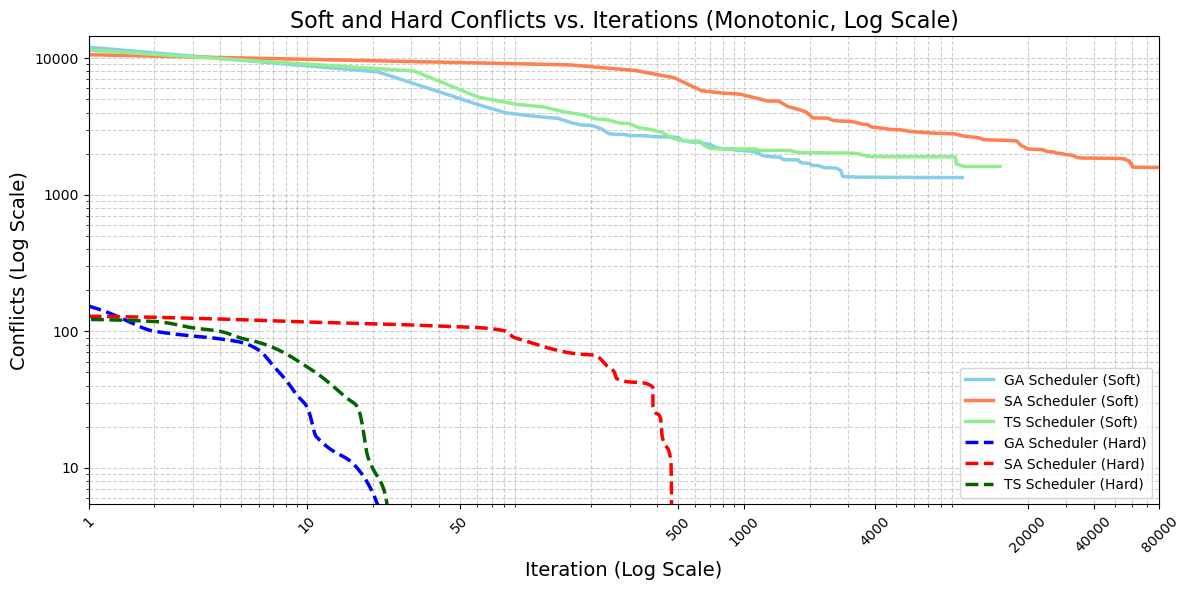

<text x='50' y='50' fill='red'>Error: Invalid input data.</text>


In [32]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import PchipInterpolator

# --- Data Set 1 (GA) --- Soft Conflicts
iterationsGA = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 64, 65, 67, 70, 71, 73, 75, 77, 79, 81, 84, 89, 91, 95, 97, 103, 105, 110, 113, 115, 124, 128, 133, 143, 145, 149, 155, 163, 164, 166, 168, 169, 180, 194, 202, 206, 208, 217, 218, 219, 221, 222, 237, 240, 245, 263, 299, 300, 301, 358, 367, 510, 516, 542, 543, 544, 547, 638, 646, 690, 719, 722, 751, 775, 786, 926, 927, 997, 1006, 1053, 1187, 1200, 1332, 1474, 1516, 1677, 1788, 1790, 1825, 1841, 1944, 2000, 2019, 2033, 2050, 2052, 2192, 2344, 2423, 2611, 2792, 2835, 3064, 3179, 10013]
soft_conflictsGA = [12015, 12093, 10426, 9947, 14449, 9778, 9698, 9556, 10434, 9551, 9779, 9273, 9148, 9043, 8893, 8281, 8041, 8753, 8101, 7951, 7861, 7999, 7899, 7839, 7791, 7746, 7559, 7401, 7287, 7192, 7056, 6930, 6537, 6201, 5915, 5789, 5623, 5557, 5443, 5374, 5194, 5144, 5135, 5134, 4955, 4945, 4845, 4820, 4718, 4641, 4622, 4567, 4556, 4501, 4449, 4413, 4311, 4263, 4185, 4137, 4095, 4083, 4023, 3987, 3933, 3878, 3848, 3836, 3826, 3808, 3796, 3789, 3756, 3732, 3690, 3678, 3667, 3606, 3535, 3392, 3387, 3365, 3309, 3287, 3251, 3246, 3236, 3230, 3218, 3194, 3184, 3139, 3137, 3092, 3054, 3044, 2938, 2807, 2787, 2769, 2757, 2721, 2709, 2703, 2679, 2607, 2504, 2486, 2480, 2462, 2444, 2420, 2380, 2350, 2302, 2278, 2218, 2194, 2182, 2117, 2111, 2105, 2099, 2093, 1985, 1955, 1900, 1876, 1810, 1800, 1790, 1753, 1720, 1714, 1703, 1692, 1676, 1666, 1648, 1640, 1634, 1579, 1577, 1566, 1489, 1363, 1352, 1346, 1336]

# --- Data Set 2 (SA) --- Soft Conflicts
iterationsSA = [1, 4, 6, 7, 9, 14, 18, 24, 27, 39, 43, 47, 65, 66, 74, 80, 89, 90, 93, 102, 110, 112, 113, 126, 134, 152, 169, 178, 180, 182, 190, 195, 217, 231, 236, 262, 270, 274, 296, 301, 304, 318, 336, 347, 362, 372, 378, 383, 384, 395, 405, 416, 423, 432, 454, 455, 456, 459, 464, 469, 477, 483, 526, 530, 532, 552, 553, 555, 561, 581, 582, 590, 596, 611, 644, 682, 698, 716, 810, 830, 887, 959, 983, 1032, 1047, 1052, 1110, 1126, 1131, 1132, 1199, 1225, 1282, 1322, 1328, 1375, 1382, 1440, 1470, 1486, 1503, 1507, 1633, 1663, 1719, 1764, 1779, 1847, 2068, 2427, 2466, 2568, 2580, 2719, 3112, 3614, 3730, 3766, 3805, 3878, 3985, 4356, 4493, 4564, 4669, 4932, 5155, 5471, 5505, 5794, 6105, 6530, 7467, 9119, 9811, 10060, 10136, 10221, 12337, 12412, 13817, 14660, 17250, 17886, 17916, 17927, 18130, 18595, 18658, 18787, 19321, 19396, 20332, 21119, 22409, 23481, 23804, 24333, 24391, 24654, 26479, 26482, 28745, 29990, 31285, 34168, 35851, 45831, 51476, 55001, 55812, 56063, 58251, 58530, 58645, 58762, 58859, 58905, 59381, 60015, 60031, 61707, 79758]
soft_conflictsSA = [10600, 10486, 10474, 10516, 10751, 10649, 10571, 10501, 10406, 10021, 9978, 9893, 9898, 9997, 9889, 10082, 9621, 9586, 9349, 9325, 9163, 9188, 9163, 9138, 8927, 8922, 8927, 8380, 8378, 8237, 8135, 8063, 8069, 8003, 8361, 8337, 8295, 8223, 8217, 8205, 8133, 8115, 8055, 7947, 7887, 7870, 7762, 7864, 8045, 7973, 7943, 7915, 8239, 8206, 8042, 8032, 7581, 7245, 7311, 7289, 7253, 7145, 7031, 6943, 6895, 6681, 6586, 6506, 6195, 6189, 6134, 6074, 5920, 5854, 5774, 5766, 5754, 5634, 5538, 5508, 5478, 5454, 5418, 5370, 5330, 5320, 5212, 5068, 4969, 4947, 4915, 4867, 4855, 4849, 4738, 4726, 4660, 4998, 4974, 4681, 4675, 4433, 4402, 4391, 4356, 4235, 4229, 4211, 3650, 3639, 3597, 3498, 3483, 3472, 3434, 3268, 3267, 3179, 3157, 3124, 3112, 3064, 3053, 3023, 3008, 2997, 2993, 2953, 2947, 2903, 2885, 2863, 2821, 2797, 2722, 2698, 2692, 2686, 2565, 2535, 2519, 2513, 2491, 2469, 2447, 2414, 2391, 2294, 2282, 2276, 2231, 2209, 2161, 2150, 2144, 2142, 2109, 2092, 2078, 2067, 2056, 2051, 1996, 1965, 1954, 1866, 1856, 1850, 1844, 1830, 1829, 1807, 1763, 1737, 1722, 1710, 1704, 1692, 1680, 1656, 1602, 1591, 1585]

# --- Data Set 3 (TS) --- Soft Conflicts
iterationsTS = [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 36, 38, 39, 40, 41, 42, 46, 48, 49, 51, 52, 54, 55, 56, 59, 61, 62, 64, 65, 66, 67, 69, 73, 75, 77, 82, 85, 86, 87, 89, 91, 92, 93, 101, 119, 125, 127, 128, 130, 132, 135, 144, 146, 151, 152, 155, 159, 161, 163, 173, 186, 189, 192, 196, 201, 229, 244, 257, 258, 268, 280, 285, 294, 295, 306, 309, 311, 312, 315, 337, 344, 345, 351, 352, 372, 377, 384, 389, 397, 408, 417, 418, 423, 425, 441, 445, 459, 462, 500, 506, 510, 517, 519, 554, 607, 632, 633, 637, 649, 657, 659, 679, 722, 809, 817, 833, 838, 847, 919, 921, 935, 951, 957, 966, 1027, 1089, 1100, 1102, 1118, 1140, 1156, 1250, 1260, 1379, 1442, 1465, 1469, 1482, 1492, 1516, 1646, 1682, 1701, 1753, 1835, 1890, 1910, 1945, 1954, 2028, 2058, 2059, 2074, 2076, 2175, 2340, 2342, 2375, 2500, 2505, 2524, 2528, 2549, 2589, 2597, 2608, 2611, 2614, 2616, 2618, 2620, 2624, 2660, 2693, 2747, 2751, 2765, 2874, 2901, 2922, 2939, 2948, 2957, 2982, 3064, 3080, 3084, 3192, 3197, 3207, 3223, 3248, 3258, 3260, 3299, 3309, 3324, 3326, 3327, 3328, 3345, 3378, 3380, 3433, 3463, 3504, 3591, 3612, 3655, 3669, 3689, 3696, 3713, 3736, 3764, 3791, 3806, 3812, 3956, 3968, 3977, 4008, 4050, 4160, 4207, 4217, 4267, 4280, 4283, 4369, 4436, 4442, 4444, 4449, 4472, 4495, 4515, 4743, 4747, 4752, 4794, 4902, 4920, 5110, 5230, 5288, 5347, 5348, 5386, 5709, 5828, 5831, 5848, 5854, 6033, 6073, 6080, 6083, 6099, 6106, 6123, 6132, 6140, 6154, 6165, 6206, 6297, 6396, 6413, 6522, 6538, 6550, 6553, 6559, 6651, 6656, 6722, 6787, 6805, 6933, 6941, 6942, 6960, 7187, 7188, 7194, 7195, 7201, 7204, 7206, 7219, 7300, 7312, 7401, 7437, 7453, 7463, 7469, 7492, 7497, 7499, 7506, 7513, 7516, 7545, 7554, 7592, 7622, 7625, 7627, 7663, 7708, 7715, 7890, 8008, 8020, 8277, 8306, 8331, 8340, 8361, 8372, 8374, 8389, 8425, 8449, 8491, 8498, 8501, 8511, 8521, 8525, 8540, 8547, 8548, 8577, 8653, 8675, 8701, 8703, 8727, 8730, 8761, 8807, 8814, 8832, 8863, 8869, 8883, 8992, 9001, 9089, 9105, 9179, 9268, 9301, 9320, 9330, 9333, 9339, 9384, 9469, 9555, 9559, 9560, 9723, 9798, 9849, 9908, 10005, 10025, 10076, 10219, 10244, 10362, 10433, 10445, 10598, 10637, 10754, 10770, 10781, 10783, 10792, 10796, 10810, 10813, 10814, 10821, 10823, 10847, 10851, 10860, 10898, 10988, 11025, 11026, 11032, 11074, 11095, 11097, 11145, 11192, 11194, 11200, 11210, 11254, 11286, 11299, 11308, 11331, 11400, 11407, 11485, 11509, 11519, 11534, 11672, 11674, 11690, 11692, 11706, 11707, 11730, 11741, 11870, 12019, 12058, 12360, 12371, 12625, 12640, 12666, 12673, 12675, 12687, 12699, 12703, 12712, 12738, 12743, 12844, 12872, 12882, 12913, 12935, 13001, 13201, 13223, 13329, 13339, 13356, 13503, 13510, 13624, 13649, 13665, 13760, 13810, 13852, 13853, 13854, 13866, 13876, 13886, 13893, 13895, 13920, 13970, 14064, 14140, 14148, 14310, 14323, 14342, 14367, 14377, 14455, 14544, 14591, 14597, 14661, 14677, 14758, 14923]

# Data Set 1 GA hard
iterations1 = [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 16, 29, 31, 33, 37, 45, 50]
hard_conflicts1 = [153, 100, 88, 83, 73, 56, 44, 34, 28, 17, 11, 0, 0, 0, 0, 0, 0]

# Data Set 2 SA hard
iterations2 = [1, 4, 10, 27, 80, 89, 178, 207, 236, 254, 262, 383, 384, 416, 423, 464, 470, 480, 485, 490, 500]
hard_conflicts2 = [129, 123, 117, 112, 101, 90, 68, 67, 56, 51, 45, 39, 28, 23, 17, 11, 0, 0, 0, 0, 0, 0]

# Data Set 3 TS hard
iterations3 = [0, 2, 3, 4, 5, 6, 10, 15, 17, 19, 23, 25, 33, 37, 50]
hard_conflicts3 = [124, 118, 106, 100, 89, 83, 55, 33, 28, 12, 6, 0, 0, 0, 0]


def process_and_plot(iterations, conflicts, color, label, ax, linestyle='-'):
    """Processes and plots the data, ensuring monotonicity."""
    sorted_data = sorted(zip(iterations, conflicts))
    iterations, conflicts = zip(*sorted_data)
    iterations = np.array(iterations)
    conflicts = np.array(conflicts)

    pchip = PchipInterpolator(iterations, conflicts)
    xnew = np.linspace(iterations.min(), iterations.max(), 500)
    y_smooth = pchip(xnew)

    for i in range(1, len(y_smooth)):
        y_smooth[i] = min(y_smooth[i - 1], y_smooth[i])
        y_smooth[i] = max(0, y_smooth[i])

    ax.plot(xnew, y_smooth, color=color, linewidth=2.5, label=label, linestyle=linestyle)


# --- Create the plot ---
fig, ax = plt.subplots(figsize=(12, 6))

# --- Plot Soft Conflict Datasets ---
process_and_plot(iterationsGA, soft_conflictsGA, 'skyblue', "GA Scheduler (Soft)", ax)
process_and_plot(iterationsSA, soft_conflictsSA, 'coral', "SA Scheduler (Soft)", ax)
process_and_plot(iterationsTS, soft_conflictsTS, 'lightgreen', "TS Scheduler (Soft)", ax)

# --- Plot Hard Conflict Datasets ---
process_and_plot(iterations1, hard_conflicts1, 'blue', "GA Scheduler (Hard)", ax, linestyle='--')
process_and_plot(iterations2, hard_conflicts2, 'red', "SA Scheduler (Hard)", ax, linestyle='--')
process_and_plot(iterations3, hard_conflicts3, 'darkgreen', "TS Scheduler (Hard)", ax, linestyle='--')


# --- Find overall max iteration ---
# max_iteration = max(max(iterationsGA), max(iterationsSA), max(iterationsTS),
#                     max(iterations1), max(iterations2), max(iterations3))  # REMOVE THIS

# --- Logarithmic X and Y Axes, SPECIFIC TICKS, and set Axis Limits ---
ax.set_xscale('log')
ax.set_yscale('log')

# *** SPECIFIC X-TICKS ***
desired_ticks = [1, 10, 50, 500, 1000, 4000, 20000, 40000, 80000]
ax.set_xticks(desired_ticks)
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.tick_params(axis='x', rotation=45)

# *** Set x-axis limits *AFTER* setting ticks, and ensure it includes 80000 ***
max_iteration = max(max(iterationsGA, default=1), max(iterationsSA, default=1), max(iterationsTS, default=1),
                    max(iterations1, default=1), max(iterations2, default=1), max(iterations3, default=1),
                    80000)  # Ensure max_iteration includes 80000
ax.set_xlim(1, max_iteration)


min_y_positive = min(
    min(y for y in soft_conflictsGA if y > 0),
    min(y for y in soft_conflictsSA if y > 0),
    min(y for y in soft_conflictsTS if y > 0),
    min(y for y in hard_conflicts1 if y > 0),
    min(y for y in hard_conflicts2 if y > 0),
    min(y for y in hard_conflicts3 if y > 0)
)
max_y_value = max(max(soft_conflictsGA), max(soft_conflictsSA), max(soft_conflictsTS),
                  max(hard_conflicts1), max(hard_conflicts2), max(hard_conflicts3)
                  )

ax.set_ylim(min_y_positive * 0.9, max(max_y_value, min_y_positive * 1.1))
ax.get_yaxis().set_major_formatter(plt.ScalarFormatter())

# --- General Plot Styling ---
ax.set_title('Soft and Hard Conflicts vs. Iterations (Monotonic, Log Scale)', fontsize=16)
ax.set_xlabel('Iteration (Log Scale)', fontsize=14)
ax.set_ylabel('Conflicts (Log Scale)', fontsize=14)
ax.grid(True, which="both", ls="--", alpha=0.6)

# --- Legend Placement (Lower Right) ---
ax.legend(fontsize=10, loc='lower right')

plt.tight_layout()
plt.savefig('soft_and_hard_conflicts_combined_plot_loglog_legend_lr_custom_ticks_fixed.png', bbox_inches='tight')
plt.show()



def generate_combined_svg(iterations_soft1, soft_conflicts1, iterations_soft2, soft_conflicts2, iterations_soft3, soft_conflicts3,
                          iterations_hard1, hard_conflicts1, iterations_hard2, hard_conflicts2, iterations_hard3, hard_conflicts3,
                          width=800, height=400, padding=50):
    """Generates an SVG plot of the combined data (soft and hard conflicts)."""
    try:
        import numpy as np
        from scipy.interpolate import PchipInterpolator

        def process_data(iterations, conflicts):
            """Processes data for SVG plotting, ensuring monotonicity."""
            if not iterations or not conflicts or len(iterations) != len(conflicts) or len(iterations) < 2:
                return None, None

            sorted_data = sorted(zip(iterations, conflicts))
            iterations, conflicts = zip(*sorted_data)
            iterations = np.array(iterations)
            conflicts = np.array(conflicts)

            pchip = PchipInterpolator(iterations, conflicts)
            xnew = np.linspace(iterations.min(), iterations.max(), 500)
            y_smooth = pchip(xnew)

            for i in range(1, len(y_smooth)):
                y_smooth[i] = min(y_smooth[i - 1], y_smooth[i])
                y_smooth[i] = max(0, y_smooth[i])

            return xnew, y_smooth

        # --- Process Data ---
        xnew_soft1, y_smooth_soft1 = process_data(iterations_soft1, soft_conflicts1)
        xnew_soft2, y_smooth_soft2 = process_data(iterations_soft2, soft_conflicts2)
        xnew_soft3, y_smooth_soft3 = process_data(iterations_soft3, soft_conflicts3)
        xnew_hard1, y_smooth_hard1 = process_data(iterations_hard1, hard_conflicts1)
        xnew_hard2, y_smooth_hard2 = process_data(iterations_hard2, hard_conflicts2)
        xnew_hard3, y_smooth_hard3 = process_data(iterations_hard3, hard_conflicts3)

        if (xnew_soft1 is None or xnew_soft2 is None or xnew_soft3 is None or
            xnew_hard1 is None or xnew_hard2 is None or xnew_hard3 is None):
           return "<text x='50' y='50' fill='red'>Error: Invalid input data.</text>"

        # max_iteration = max(max(iterations_soft1), max(iterations_soft2), max(iterations_soft3),
        #                     max(iterations_hard1), max(iterations_hard2), max(iterations_hard3)) # REMOVE/MODIFY
        max_conflict = max(max(soft_conflicts1), max(soft_conflicts2), max(soft_conflicts3),
                           max(hard_conflicts1), max(hard_conflicts2), max(hard_conflicts3))

        svg_elements = []

        svg_elements.append(f"<text x='{width/2}' y='{padding/2}' text-anchor='middle' font-size='18'>Soft and Hard Conflicts vs. Iterations (Monotonic, Log Scale)</text>")
        svg_elements.append(f"<text x='{width/2}' y='{height - padding/4}' text-anchor='middle' font-size='14'>Iteration (Log Scale)</text>")
        svg_elements.append(f"<text x='{padding/4}' y='{height/2}' text-anchor='middle' font-size='14' transform='rotate(-90 {padding/4} {height/2})'>Conflicts (Log Scale)</text>")

        def log_scale(x):  return np.log(max(x, 1e-10))
        def log_scale_y(y): return np.log(max(y, 1e-10))

        min_log_x = log_scale(1)
        # max_log_x = log_scale(max_iteration) # NO, calculate based on desired ticks!
        min_y_positive = min(
            min(y for y in soft_conflicts1 if y > 0),
            min(y for y in soft_conflicts2 if y > 0),
            min(y for y in soft_conflicts3 if y > 0),
            min(y for y in hard_conflicts1 if y > 0),
            min(y for y in hard_conflicts2 if y > 0),
            min(y for y in hard_conflicts3 if y > 0)
        )
        min_log_y = log_scale_y(min_y_positive)
        max_log_y = log_scale_y(max_conflict)


        def get_x_coord(iteration):
            log_x = log_scale(iteration)
            x_scale = (width - 2 * padding) / (max_log_x - min_log_x)
            return padding + (log_x - min_log_x) * x_scale

        def get_y_coord(conflict):
            log_y = log_scale_y(conflict)
            y_scale = (height - 2 * padding) / (max_log_y - min_log_y)
            return height - padding - (log_y - min_log_y) * y_scale

        def plot_path(xnew, y_smooth, stroke_color, stroke_width, stroke_dasharray="none"):
            path_d = "M "
            for i in range(len(xnew)):
                if xnew[i] >= 1:
                    x_coord = get_x_coord(xnew[i])
                    y_coord = get_y_coord(y_smooth[i])
                    path_d += f"{x_coord},{y_coord} "
                    if i < len(xnew) - 1:
                        path_d += "L "
            return f"<path d='{path_d.strip()}' stroke='{stroke_color}' stroke-width='{stroke_width}' fill='none' stroke-dasharray='{stroke_dasharray}'/>"

        svg_elements.append(plot_path(xnew_soft1, y_smooth_soft1, 'skyblue', 2))
        svg_elements.append(plot_path(xnew_soft2, y_smooth_soft2, 'coral', 2))
        svg_elements.append(plot_path(xnew_soft3, y_smooth_soft3, 'lightgreen', 2))
        svg_elements.append(plot_path(xnew_hard1, y_smooth_hard1, 'blue', 2, stroke_dasharray="5,5"))
        svg_elements.append(plot_path(xnew_hard2, y_smooth_hard2, 'red', 2, stroke_dasharray="5,5"))
        svg_elements.append(plot_path(xnew_hard3, y_smooth_hard3, 'darkgreen', 2, stroke_dasharray="5,5"))


        # --- Legend (Bottom Right) ---
        legend_x = width - padding - 160
        legend_y = height - padding - 120

        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y}' width='10' height='10' fill='skyblue'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 10}' font-size='10'>GA Scheduler (Soft)</text>")
        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y + 20}' width='10' height='10' fill='coral'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 30}' font-size='10'>SA Scheduler (Soft)</text>")
        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y + 40}' width='10' height='10' fill='lightgreen'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 50}' font-size='10'>TS Scheduler (Soft)</text>")
        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y + 60}' width='10' height='10' stroke='blue' fill='none' stroke-dasharray='5,5'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 70}' font-size='10'>GA Scheduler (Hard)</text>")
        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y + 80}' width='10' height='10' stroke='red' fill='none' stroke-dasharray='5,5'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 90}' font-size='10'>SA Scheduler (Hard)</text>")
        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y + 100}' width='10' height='10' stroke='darkgreen' fill='none' stroke-dasharray='5,5'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 110}' font-size='10'>TS Scheduler (Hard)</text>")


        svg_elements.append(f"<line x1='{padding}' y1='{height - padding}' x2='{width - padding}' y2='{height - padding}' stroke='black'/>")
        svg_elements.append(f"<line x1='{padding}' y1='{height - padding}' x2='{padding}' y2='{padding}' stroke='black'/>")

        # --- SPECIFIC X-AXIS TICKS (SVG) ---
        desired_ticks = [0, 10, 50, 500, 1000, 4000, 20000, 40000, 80000]
        
        # Calculate max_log_x based on desired_ticks
        max_log_x = log_scale(max(desired_ticks))

        for tick in desired_ticks:
            x = get_x_coord(tick)
            y = height - padding
            svg_elements.append(f"<line x1='{x}' y1='{y}' x2='{x}' y2='{y + 5}' stroke='black'/>")
            svg_elements.append(f"<text x='{x}' y='{y + 20}' text-anchor='middle' font-size='10' transform='rotate(-45 {x} {y+20})'>{tick}</text>")


        def integer_log_ticks_y(min_val, max_val, num_ticks=7):
            log_min = np.log10(max(min_val, 1e-10))
            log_max = np.log10(max_val)
            log_ticks = np.logspace(log_min, log_max, num_ticks)
            int_ticks = np.unique(np.round(log_ticks).astype(int))
            int_ticks = int_ticks[(int_ticks >= min_val) & (int_ticks <= max_val)]
            return int_ticks

        y_tick_positions = integer_log_ticks_y(min_y_positive, max_conflict)
        for tick in y_tick_positions:
            x = padding
            y = get_y_coord(tick)
            svg_elements.append(f"<line x1='{x}' y1='{y}' x2='{x - 5}' y2='{y}' stroke='black'/>")
            svg_elements.append(f"<text x='{x - 10}' y='{y + 4}' text-anchor='end' font-size='10'>{tick}</text>")

        full_svg = f"<svg width='{width}' height='{height}'>{ ''.join(svg_elements) }</svg>"
        return full_svg

    except ImportError as e:
        return f"<text x='50' y='50' fill='red'>Error: Missing library: {e}.</text>"
    except Exception as e:
        return f"<text x='50' y='50' fill='red'>Error: {e}</text>"

svg_output = generate_combined_svg(iterationsGA, soft_conflictsGA, iterationsSA, soft_conflictsSA, iterationsTS, soft_conflictsTS,
                                  iterations1, hard_conflicts1, iterations2, hard_conflicts2, iterations3, hard_conflicts3)
print(svg_output)

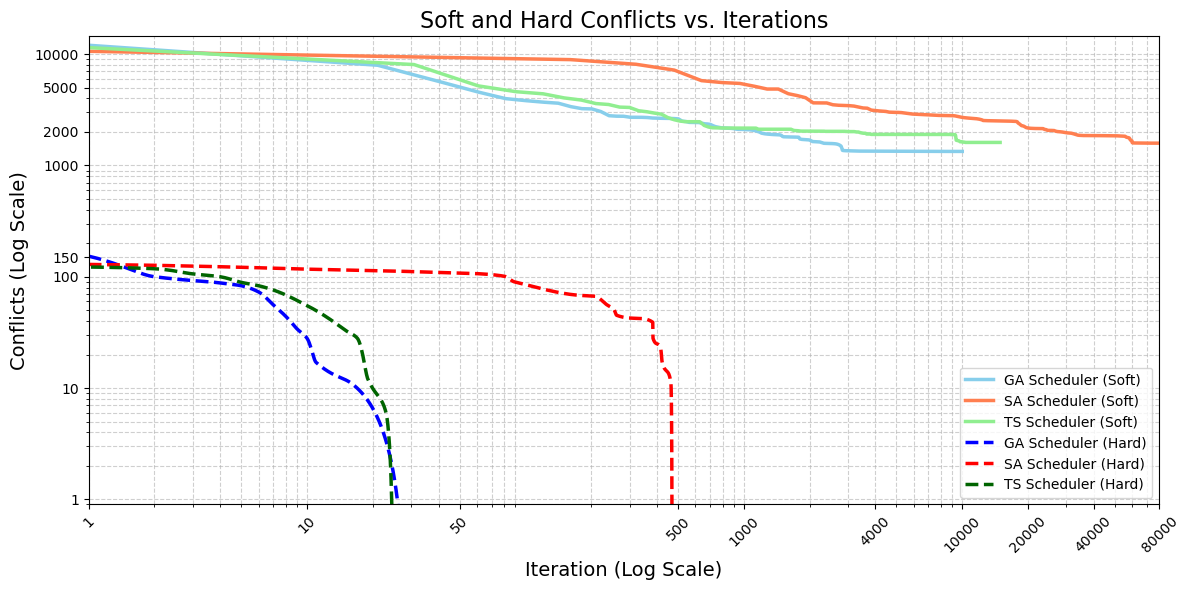

<text x='50' y='50' fill='red'>Error: Invalid input data.</text>


In [40]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import PchipInterpolator

# --- Data Set 1 (GA) --- Soft Conflicts
iterationsGA = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 64, 65, 67, 70, 71, 73, 75, 77, 79, 81, 84, 89, 91, 95, 97, 103, 105, 110, 113, 115, 124, 128, 133, 143, 145, 149, 155, 163, 164, 166, 168, 169, 180, 194, 202, 206, 208, 217, 218, 219, 221, 222, 237, 240, 245, 263, 299, 300, 301, 358, 367, 510, 516, 542, 543, 544, 547, 638, 646, 690, 719, 722, 751, 775, 786, 926, 927, 997, 1006, 1053, 1187, 1200, 1332, 1474, 1516, 1677, 1788, 1790, 1825, 1841, 1944, 2000, 2019, 2033, 2050, 2052, 2192, 2344, 2423, 2611, 2792, 2835, 3064, 3179, 10013]
soft_conflictsGA = [12015, 12093, 10426, 9947, 14449, 9778, 9698, 9556, 10434, 9551, 9779, 9273, 9148, 9043, 8893, 8281, 8041, 8753, 8101, 7951, 7861, 7999, 7899, 7839, 7791, 7746, 7559, 7401, 7287, 7192, 7056, 6930, 6537, 6201, 5915, 5789, 5623, 5557, 5443, 5374, 5194, 5144, 5135, 5134, 4955, 4945, 4845, 4820, 4718, 4641, 4622, 4567, 4556, 4501, 4449, 4413, 4311, 4263, 4185, 4137, 4095, 4083, 4023, 3987, 3933, 3878, 3848, 3836, 3826, 3808, 3796, 3789, 3756, 3732, 3690, 3678, 3667, 3606, 3535, 3392, 3387, 3365, 3309, 3287, 3251, 3246, 3236, 3230, 3218, 3194, 3184, 3139, 3137, 3092, 3054, 3044, 2938, 2807, 2787, 2769, 2757, 2721, 2709, 2703, 2679, 2607, 2504, 2486, 2480, 2462, 2444, 2420, 2380, 2350, 2302, 2278, 2218, 2194, 2182, 2117, 2111, 2105, 2099, 2093, 1985, 1955, 1900, 1876, 1810, 1800, 1790, 1753, 1720, 1714, 1703, 1692, 1676, 1666, 1648, 1640, 1634, 1579, 1577, 1566, 1489, 1363, 1352, 1346, 1336]

# --- Data Set 2 (SA) --- Soft Conflicts
iterationsSA = [1, 4, 6, 7, 9, 14, 18, 24, 27, 39, 43, 47, 65, 66, 74, 80, 89, 90, 93, 102, 110, 112, 113, 126, 134, 152, 169, 178, 180, 182, 190, 195, 217, 231, 236, 262, 270, 274, 296, 301, 304, 318, 336, 347, 362, 372, 378, 383, 384, 395, 405, 416, 423, 432, 454, 455, 456, 459, 464, 469, 477, 483, 526, 530, 532, 552, 553, 555, 561, 581, 582, 590, 596, 611, 644, 682, 698, 716, 810, 830, 887, 959, 983, 1032, 1047, 1052, 1110, 1126, 1131, 1132, 1199, 1225, 1282, 1322, 1328, 1375, 1382, 1440, 1470, 1486, 1503, 1507, 1633, 1663, 1719, 1764, 1779, 1847, 2068, 2427, 2466, 2568, 2580, 2719, 3112, 3614, 3730, 3766, 3805, 3878, 3985, 4356, 4493, 4564, 4669, 4932, 5155, 5471, 5505, 5794, 6105, 6530, 7467, 9119, 9811, 10060, 10136, 10221, 12337, 12412, 13817, 14660, 17250, 17886, 17916, 17927, 18130, 18595, 18658, 18787, 19321, 19396, 20332, 21119, 22409, 23481, 23804, 24333, 24391, 24654, 26479, 26482, 28745, 29990, 31285, 34168, 35851, 45831, 51476, 55001, 55812, 56063, 58251, 58530, 58645, 58762, 58859, 58905, 59381, 60015, 60031, 61707, 79758]
soft_conflictsSA = [10600, 10486, 10474, 10516, 10751, 10649, 10571, 10501, 10406, 10021, 9978, 9893, 9898, 9997, 9889, 10082, 9621, 9586, 9349, 9325, 9163, 9188, 9163, 9138, 8927, 8922, 8927, 8380, 8378, 8237, 8135, 8063, 8069, 8003, 8361, 8337, 8295, 8223, 8217, 8205, 8133, 8115, 8055, 7947, 7887, 7870, 7762, 7864, 8045, 7973, 7943, 7915, 8239, 8206, 8042, 8032, 7581, 7245, 7311, 7289, 7253, 7145, 7031, 6943, 6895, 6681, 6586, 6506, 6195, 6189, 6134, 6074, 5920, 5854, 5774, 5766, 5754, 5634, 5538, 5508, 5478, 5454, 5418, 5370, 5330, 5320, 5212, 5068, 4969, 4947, 4915, 4867, 4855, 4849, 4738, 4726, 4660, 4998, 4974, 4681, 4675, 4433, 4402, 4391, 4356, 4235, 4229, 4211, 3650, 3639, 3597, 3498, 3483, 3472, 3434, 3268, 3267, 3179, 3157, 3124, 3112, 3064, 3053, 3023, 3008, 2997, 2993, 2953, 2947, 2903, 2885, 2863, 2821, 2797, 2722, 2698, 2692, 2686, 2565, 2535, 2519, 2513, 2491, 2469, 2447, 2414, 2391, 2294, 2282, 2276, 2231, 2209, 2161, 2150, 2144, 2142, 2109, 2092, 2078, 2067, 2056, 2051, 1996, 1965, 1954, 1866, 1856, 1850, 1844, 1830, 1829, 1807, 1763, 1737, 1722, 1710, 1704, 1692, 1680, 1656, 1602, 1591, 1585]

# --- Data Set 3 (TS) --- Soft Conflicts
iterationsTS = [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 36, 38, 39, 40, 41, 42, 46, 48, 49, 51, 52, 54, 55, 56, 59, 61, 62, 64, 65, 66, 67, 69, 73, 75, 77, 82, 85, 86, 87, 89, 91, 92, 93, 101, 119, 125, 127, 128, 130, 132, 135, 144, 146, 151, 152, 155, 159, 161, 163, 173, 186, 189, 192, 196, 201, 229, 244, 257, 258, 268, 280, 285, 294, 295, 306, 309, 311, 312, 315, 337, 344, 345, 351, 352, 372, 377, 384, 389, 397, 408, 417, 418, 423, 425, 441, 445, 459, 462, 500, 506, 510, 517, 519, 554, 607, 632, 633, 637, 649, 657, 659, 679, 722, 809, 817, 833, 838, 847, 919, 921, 935, 951, 957, 966, 1027, 1089, 1100, 1102, 1118, 1140, 1156, 1250, 1260, 1379, 1442, 1465, 1469, 1482, 1492, 1516, 1646, 1682, 1701, 1753, 1835, 1890, 1910, 1945, 1954, 2028, 2058, 2059, 2074, 2076, 2175, 2340, 2342, 2375, 2500, 2505, 2524, 2528, 2549, 2589, 2597, 2608, 2611, 2614, 2616, 2618, 2620, 2624, 2660, 2693, 2747, 2751, 2765, 2874, 2901, 2922, 2939, 2948, 2957, 2982, 3064, 3080, 3084, 3192, 3197, 3207, 3223, 3248, 3258, 3260, 3299, 3309, 3324, 3326, 3327, 3328, 3345, 3378, 3380, 3433, 3463, 3504, 3591, 3612, 3655, 3669, 3689, 3696, 3713, 3736, 3764, 3791, 3806, 3812, 3956, 3968, 3977, 4008, 4050, 4160, 4207, 4217, 4267, 4280, 4283, 4369, 4436, 4442, 4444, 4449, 4472, 4495, 4515, 4743, 4747, 4752, 4794, 4902, 4920, 5110, 5230, 5288, 5347, 5348, 5386, 5709, 5828, 5831, 5848, 5854, 6033, 6073, 6080, 6083, 6099, 6106, 6123, 6132, 6140, 6154, 6165, 6206, 6297, 6396, 6413, 6522, 6538, 6550, 6553, 6559, 6651, 6656, 6722, 6787, 6805, 6933, 6941, 6942, 6960, 7187, 7188, 7194, 7195, 7201, 7204, 7206, 7219, 7300, 7312, 7401, 7437, 7453, 7463, 7469, 7492, 7497, 7499, 7506, 7513, 7516, 7545, 7554, 7592, 7622, 7625, 7627, 7663, 7708, 7715, 7890, 8008, 8020, 8277, 8306, 8331, 8340, 8361, 8372, 8374, 8389, 8425, 8449, 8491, 8498, 8501, 8511, 8521, 8525, 8540, 8547, 8548, 8577, 8653, 8675, 8701, 8703, 8727, 8730, 8761, 8807, 8814, 8832, 8863, 8869, 8883, 8992, 9001, 9089, 9105, 9179, 9268, 9301, 9320, 9330, 9333, 9339, 9384, 9469, 9555, 9559, 9560, 9723, 9798, 9849, 9908, 10005, 10025, 10076, 10219, 10244, 10362, 10433, 10445, 10598, 10637, 10754, 10770, 10781, 10783, 10792, 10796, 10810, 10813, 10814, 10821, 10823, 10847, 10851, 10860, 10898, 10988, 11025, 11026, 11032, 11074, 11095, 11097, 11145, 11192, 11194, 11200, 11210, 11254, 11286, 11299, 11308, 11331, 11400, 11407, 11485, 11509, 11519, 11534, 11672, 11674, 11690, 11692, 11706, 11707, 11730, 11741, 11870, 12019, 12058, 12360, 12371, 12625, 12640, 12666, 12673, 12675, 12687, 12699, 12703, 12712, 12738, 12743, 12844, 12872, 12882, 12913, 12935, 13001, 13201, 13223, 13329, 13339, 13356, 13503, 13510, 13624, 13649, 13665, 13760, 13810, 13852, 13853, 13854, 13866, 13876, 13886, 13893, 13895, 13920, 13970, 14064, 14140, 14148, 14310, 14323, 14342, 14367, 14377, 14455, 14544, 14591, 14597, 14661, 14677, 14758, 14923]

# Data Set 1 GA hard
iterations1 = [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 16, 29, 31, 33, 37, 45, 50]
hard_conflicts1 = [153, 100, 88, 83, 73, 56, 44, 34, 28, 17, 11, 0, 0, 0, 0, 0, 0]

# Data Set 2 SA hard
iterations2 = [1, 4, 10, 27, 80, 89, 178, 207, 236, 254, 262, 383, 384, 416, 423, 464, 470, 480, 485, 490, 500]
hard_conflicts2 = [129, 123, 117, 112, 101, 90, 68, 67, 56, 51, 45, 39, 28, 23, 17, 11, 0, 0, 0, 0, 0, 0]

# Data Set 3 TS hard
iterations3 = [0, 2, 3, 4, 5, 6, 10, 15, 17, 19, 23, 25, 33, 37, 50]
hard_conflicts3 = [124, 118, 106, 100, 89, 83, 55, 33, 28, 12, 6, 0, 0, 0, 0]


def process_and_plot(iterations, conflicts, color, label, ax, linestyle='-'):
    """Processes and plots the data, ensuring monotonicity."""
    sorted_data = sorted(zip(iterations, conflicts))
    iterations, conflicts = zip(*sorted_data)
    iterations = np.array(iterations)
    conflicts = np.array(conflicts)

    pchip = PchipInterpolator(iterations, conflicts)
    xnew = np.linspace(iterations.min(), iterations.max(), 500)
    y_smooth = pchip(xnew)

    for i in range(1, len(y_smooth)):
        y_smooth[i] = min(y_smooth[i - 1], y_smooth[i])
        y_smooth[i] = max(0, y_smooth[i])

    ax.plot(xnew, y_smooth, color=color, linewidth=2.5, label=label, linestyle=linestyle)


# --- Create the plot ---
fig, ax = plt.subplots(figsize=(12, 6))

# --- Plot Soft Conflict Datasets ---
process_and_plot(iterationsGA, soft_conflictsGA, 'skyblue', "GA Scheduler (Soft)", ax)
process_and_plot(iterationsSA, soft_conflictsSA, 'coral', "SA Scheduler (Soft)", ax)
process_and_plot(iterationsTS, soft_conflictsTS, 'lightgreen', "TS Scheduler (Soft)", ax)

# --- Plot Hard Conflict Datasets ---
process_and_plot(iterations1, hard_conflicts1, 'blue', "GA Scheduler (Hard)", ax, linestyle='--')
process_and_plot(iterations2, hard_conflicts2, 'red', "SA Scheduler (Hard)", ax, linestyle='--')
process_and_plot(iterations3, hard_conflicts3, 'darkgreen', "TS Scheduler (Hard)", ax, linestyle='--')


# --- Logarithmic X and Y Axes, SPECIFIC TICKS, and set Axis Limits ---
ax.set_xscale('log')
ax.set_yscale('log')

# *** SPECIFIC X-TICKS ***
desired_ticks_x = [1, 10, 50, 500, 1000, 4000, 10000, 20000, 40000, 80000]
ax.set_xticks(desired_ticks_x)
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.tick_params(axis='x', rotation=45)

# *** SPECIFIC Y-TICKS ***
desired_ticks_y = [1, 10, 100, 150, 1000, 2000, 5000, 10000]  # Define desired y-ticks
ax.set_yticks(desired_ticks_y)
ax.get_yaxis().set_major_formatter(plt.ScalarFormatter())


# Set x-axis limits *AFTER* setting ticks
max_iteration = max(max(iterationsGA, default=1), max(iterationsSA, default=1), max(iterationsTS, default=1),
                    max(iterations1, default=1), max(iterations2, default=1), max(iterations3, default=1),
                    80000)
ax.set_xlim(1, max_iteration)

min_y_positive = min(
    min(y for y in soft_conflictsGA if y > 0),
    min(y for y in soft_conflictsSA if y > 0),
    min(y for y in soft_conflictsTS if y > 0),
    min(y for y in hard_conflicts1 if y > 0),
    min(y for y in hard_conflicts2 if y > 0),
    min(y for y in hard_conflicts3 if y > 0)
)
max_y_value = max(max(soft_conflictsGA), max(soft_conflictsSA), max(soft_conflictsTS),
                  max(hard_conflicts1), max(hard_conflicts2), max(hard_conflicts3)
                  )

# Set y-axis limits *AFTER* setting y-ticks
ax.set_ylim(min(desired_ticks_y) * 0.9, max(max_y_value, max(desired_ticks_y)*1.1)) # set y limits

# --- General Plot Styling ---
ax.set_title('Soft and Hard Conflicts vs. Iterations', fontsize=16)
ax.set_xlabel('Iteration (Log Scale)', fontsize=14)
ax.set_ylabel('Conflicts (Log Scale)', fontsize=14)
ax.grid(True, which="both", ls="--", alpha=0.6)

# --- Legend Placement (Lower Right) ---
ax.legend(fontsize=10, loc='lower right')

plt.tight_layout()
plt.savefig('soft_and_hard_conflicts_combined_plot_loglog_legend_lr_custom_ticks_fixed_y.png', bbox_inches='tight')
plt.show()



def generate_combined_svg(iterations_soft1, soft_conflicts1, iterations_soft2, soft_conflicts2, iterations_soft3, soft_conflicts3,
                          iterations_hard1, hard_conflicts1, iterations_hard2, hard_conflicts2, iterations_hard3, hard_conflicts3,
                          width=800, height=400, padding=50):
    """Generates an SVG plot of the combined data (soft and hard conflicts)."""
    try:
        import numpy as np
        from scipy.interpolate import PchipInterpolator

        def process_data(iterations, conflicts):
            """Processes data for SVG plotting, ensuring monotonicity."""
            if not iterations or not conflicts or len(iterations) != len(conflicts) or len(iterations) < 2:
                return None, None

            sorted_data = sorted(zip(iterations, conflicts))
            iterations, conflicts = zip(*sorted_data)
            iterations = np.array(iterations)
            conflicts = np.array(conflicts)

            pchip = PchipInterpolator(iterations, conflicts)
            xnew = np.linspace(iterations.min(), iterations.max(), 500)
            y_smooth = pchip(xnew)

            for i in range(1, len(y_smooth)):
                y_smooth[i] = min(y_smooth[i - 1], y_smooth[i])
                y_smooth[i] = max(0, y_smooth[i])

            return xnew, y_smooth

        # --- Process Data ---
        xnew_soft1, y_smooth_soft1 = process_data(iterations_soft1, soft_conflicts1)
        xnew_soft2, y_smooth_soft2 = process_data(iterations_soft2, soft_conflicts2)
        xnew_soft3, y_smooth_soft3 = process_data(iterations_soft3, soft_conflicts3)
        xnew_hard1, y_smooth_hard1 = process_data(iterations_hard1, hard_conflicts1)
        xnew_hard2, y_smooth_hard2 = process_data(iterations_hard2, hard_conflicts2)
        xnew_hard3, y_smooth_hard3 = process_data(iterations_hard3, hard_conflicts3)

        if (xnew_soft1 is None or xnew_soft2 is None or xnew_soft3 is None or
            xnew_hard1 is None or xnew_hard2 is None or xnew_hard3 is None):
           return "<text x='50' y='50' fill='red'>Error: Invalid input data.</text>"

        max_iteration = max(max(iterations_soft1,default=1), max(iterations_soft2,default=1), max(iterations_soft3,default=1),
                            max(iterations_hard1,default=1), max(iterations_hard2,default=1), max(iterations_hard3,default=1), 80000)
        max_conflict = max(max(soft_conflicts1), max(soft_conflicts2), max(soft_conflicts3),
                           max(hard_conflicts1), max(hard_conflicts2), max(hard_conflicts3))

        svg_elements = []

        svg_elements.append(f"<text x='{width/2}' y='{padding/2}' text-anchor='middle' font-size='18'>Soft and Hard Conflicts vs. Iterations (Monotonic, Log Scale)</text>")
        svg_elements.append(f"<text x='{width/2}' y='{height - padding/4}' text-anchor='middle' font-size='14'>Iteration (Log Scale)</text>")
        svg_elements.append(f"<text x='{padding/4}' y='{height/2}' text-anchor='middle' font-size='14' transform='rotate(-90 {padding/4} {height/2})'>Conflicts (Log Scale)</text>")

        def log_scale(x):  return np.log(max(x, 1e-10))
        def log_scale_y(y): return np.log(max(y, 1e-10))

        min_log_x = log_scale(1)
        desired_ticks_x = [1, 10, 50, 500, 1000, 4000, 20000, 40000, 80000]
        max_log_x = log_scale(max(desired_ticks_x))  # Use max of desired ticks

        min_y_positive = min(
            min(y for y in soft_conflicts1 if y > 0),
            min(y for y in soft_conflicts2 if y > 0),
            min(y for y in soft_conflicts3 if y > 0),
            min(y for y in hard_conflicts1 if y > 0),
            min(y for y in hard_conflicts2 if y > 0),
            min(y for y in hard_conflicts3 if y > 0)
        )
        #min_log_y = log_scale_y(min_y_positive) # Not needed, use desired ticks
        desired_ticks_y = [1, 10, 100, 150, 1000, 2000, 5000, 10000]
        max_log_y = log_scale_y(max(desired_ticks_y)) # Use max of desired ticks
        min_log_y = log_scale_y(min(desired_ticks_y))


        def get_x_coord(iteration):
            log_x = log_scale(iteration)
            x_scale = (width - 2 * padding) / (max_log_x - min_log_x)
            return padding + (log_x - min_log_x) * x_scale

        def get_y_coord(conflict):
            log_y = log_scale_y(conflict)
            y_scale = (height - 2 * padding) / (max_log_y - min_log_y)
            return height - padding - (log_y - min_log_y) * y_scale

        def plot_path(xnew, y_smooth, stroke_color, stroke_width, stroke_dasharray="none"):
            path_d = "M "
            for i in range(len(xnew)):
                if xnew[i] >= 1:
                    x_coord = get_x_coord(xnew[i])
                    y_coord = get_y_coord(y_smooth[i])
                    path_d += f"{x_coord},{y_coord} "
                    if i < len(xnew) - 1:
                        path_d += "L "
            return f"<path d='{path_d.strip()}' stroke='{stroke_color}' stroke-width='{stroke_width}' fill='none' stroke-dasharray='{stroke_dasharray}'/>"

        svg_elements.append(plot_path(xnew_soft1, y_smooth_soft1, 'skyblue', 2))
        svg_elements.append(plot_path(xnew_soft2, y_smooth_soft2, 'coral', 2))
        svg_elements.append(plot_path(xnew_soft3, y_smooth_soft3, 'lightgreen', 2))
        svg_elements.append(plot_path(xnew_hard1, y_smooth_hard1, 'blue', 2, stroke_dasharray="5,5"))
        svg_elements.append(plot_path(xnew_hard2, y_smooth_hard2, 'red', 2, stroke_dasharray="5,5"))
        svg_elements.append(plot_path(xnew_hard3, y_smooth_hard3, 'darkgreen', 2, stroke_dasharray="5,5"))


        # --- Legend (Bottom Right) ---
        legend_x = width - padding - 160
        legend_y = height - padding - 100

        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y}' width='10' height='10' fill='skyblue'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 10}' font-size='10'>GA Scheduler (Soft)</text>")
        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y + 20}' width='10' height='10' fill='coral'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 30}' font-size='10'>SA Scheduler (Soft)</text>")
        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y + 40}' width='10' height='10' fill='lightgreen'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 50}' font-size='10'>TS Scheduler (Soft)</text>")
        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y + 60}' width='10' height='10' stroke='blue' fill='none' stroke-dasharray='5,5'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 70}' font-size='10'>GA Scheduler (Hard)</text>")
        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y + 80}' width='10' height='10' stroke='red' fill='none' stroke-dasharray='5,5'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 90}' font-size='10'>SA Scheduler (Hard)</text>")
        svg_elements.append(f"<rect x='{legend_x}' y='{legend_y + 100}' width='10' height='10' stroke='darkgreen' fill='none' stroke-dasharray='5,5'/>")
        svg_elements.append(f"<text x='{legend_x + 15}' y='{legend_y + 110}' font-size='10'>TS Scheduler (Hard)</text>")


        svg_elements.append(f"<line x1='{padding}' y1='{height - padding}' x2='{width - padding}' y2='{height - padding}' stroke='black'/>")
        svg_elements.append(f"<line x1='{padding}' y1='{height - padding}' x2='{padding}' y2='{padding}' stroke='black'/>")

        # --- SPECIFIC X-AXIS TICKS (SVG) ---
        for tick in desired_ticks_x:
            x = get_x_coord(tick)
            y = height - padding
            svg_elements.append(f"<line x1='{x}' y1='{y}' x2='{x}' y2='{y + 5}' stroke='black'/>")
            svg_elements.append(f"<text x='{x}' y='{y + 20}' text-anchor='middle' font-size='10' transform='rotate(-45 {x} {y+20})'>{tick}</text>")


        # --- SPECIFIC Y-AXIS TICKS (SVG) ---
        for tick in desired_ticks_y:
            x = padding
            y = get_y_coord(tick)
            svg_elements.append(f"<line x1='{x}' y1='{y}' x2='{x - 5}' y2='{y}' stroke='black'/>")
            svg_elements.append(f"<text x='{x - 10}' y='{y + 4}' text-anchor='end' font-size='10'>{tick}</text>")


        full_svg = f"<svg width='{width}' height='{height}'>{ ''.join(svg_elements) }</svg>"
        return full_svg

    except ImportError as e:
        return f"<text x='50' y='50' fill='red'>Error: Missing library: {e}.</text>"
    except Exception as e:
        return f"<text x='50' y='50' fill='red'>Error: {e}</text>"

svg_output = generate_combined_svg(iterationsGA, soft_conflictsGA, iterationsSA, soft_conflictsSA, iterationsTS, soft_conflictsTS,
                                  iterations1, hard_conflicts1, iterations2, hard_conflicts2, iterations3, hard_conflicts3)
print(svg_output)